In [344]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import string
import os
import glob
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib
import datetime


## LABDOS flights

In [2]:
#PRG-WAW
fto = '/storage/experiments/2023/04_HIMAC/PRG_WAW'
SWITCH_ON_TIMES = ['2023-04-22 7:45']

#WAW-NRT
fto = '/storage/experiments/2023/04_HIMAC/WAW_NRT'
SWITCH_ON_TIMES = ['2023-04-22 13:15']

#NRT-PRG
#fto = '/storage/experiments/2023/04_HIMAC/NRT_WAW_PRG'
#SWITCH_ON_TIMES = ['2023-04-25 12:45','2023-04-26 8:45']

#PRG-GVA
#fto = '/storage/experiments/2023/05_CERF/PRG_GVA'
#SWITCH_ON_TIMES = ['2023-05-10 12:45','2023-05-10 14:40','2023-05-11 8:00','2023-05-12 8:00']


## Load and plot data from LABDOS

In [3]:
print (fto)

ID = '/LABDOS_EF'
ID = '/LABDOS_D9'
ID = '/LABDOS_B8'
#ID = '/LABDOS_20'
ID = '/LABDOS_8B'
#ID = '/LABDOS_4E'
#ID = '/LABDOS_7E'
#ID = '/LABDOS/4E'

l=[]
l.extend(range(0,505))

df = pd.read_csv(fto+ID+'/0.TXT', sep=',', header=None, names=l, comment='*', low_memory=False)
df = df.reset_index(drop=True)
print('Loaded')

/storage/experiments/2023/04_HIMAC/WAW_NRT
Loaded


In [4]:
#SWITCH_ON_TIMES = ['2021-9-18 12:00', '2021-9-19 12:00', '2021-9-20 12:00', '2021-9-21 12:00', '2021-9-22 12:00', '2021-9-23 12:00', '2021-9-24 12:00', '2021-9-25 12:00', '2021-9-26 12:00', '2021-9-27 12:00', '2021-9-28 12:00', '2021-9-29 12:00', '2021-9-30 12:00']
#SWITCH_ON_TIMES = ['2023-03-12 18:09']

df[2] = df[2].apply(pd.to_numeric, errors='coerce')

df['runtime'] = np.nan
df.loc[df[0]=='$HIST','seconds'] = df.loc[df[0]=='$HIST',2]
df.loc[df[0]=='$DOS','seconds'] = 0
df['runtime'] = df['seconds'].diff() * -1
rc = df.copy()
#rc = df.iloc[366870:378082,:].copy()
#rc = df.iloc[366683:378082,:].copy()
#rc = df.iloc[366714:378084,:].copy() 

run = 0
rc['run'] = np.nan

try:
    for x in rc.loc[rc[0]=='$DOS'].index:
        rc.loc[x,'run'] = SWITCH_ON_TIMES[run]
        run += 1
except:
    pass
rc['run'].fillna(method="ffill", inplace=True)

pd.set_option('display.max_rows', rc.shape[0]+1)
print(rc.loc[rc[0]=='$DOS'][[0,1,2,3,4,5,6, 'run', 'runtime']])
#print(rc.loc[rc[0]=='$AIRDOS'][[0,1, 'runtime']])
pd.set_option('display.max_rows', 10)

rc[2] = pd.to_numeric(rc[2])
rc['time'] = pd.to_datetime(rc.run) + pd.to_timedelta(rc[2], unit='s')
rc.set_index(rc['time'], drop=False, inplace=True)

#!!!!!!!!!!!!!!!
#rc = rc.iloc[1:4745]

        0          1   2    3                                         4  \
0    $DOS  LABDOS01A NaN  507  71cdf196883fa3ab648ae47327ef2137eb69420f   
3    $DOS  LABDOS01A NaN  508  71cdf196883fa3ab648ae47327ef2137eb69420f   
7    $DOS  LABDOS01A NaN  508  71cdf196883fa3ab648ae47327ef2137eb69420f   
418  $DOS  LABDOS01A NaN  508  71cdf196883fa3ab648ae47327ef2137eb69420f   

           5                                 6               run  runtime  
0    CIBuild  1290c00806a200911056a000a000008b  2023-04-22 13:15      NaN  
3    CIBuild  1290c00806a200911056a000a000008b  2023-04-22 13:15    21.97  
7    CIBuild  1290c00806a200911056a000a000008b  2023-04-22 13:15    32.87  
418  CIBuild  1290c00806a200911056a000a000008b  2023-04-22 13:15  4459.33  


# Load and plot telemetry data

In [108]:
ftt = glob.iglob(fto+"/*.csv") # generator, search immediate subdirectories 
tele = pd.DataFrame()
for f in ftt:
    print(f)
    tele = pd.concat([tele, pd.read_csv(f)])
#tele

/storage/experiments/2023/04_HIMAC/WAW_NRT/LO1079_2fffa450.csv


Text(0, 0.5, 'Altitude a.s.l. [ft]')

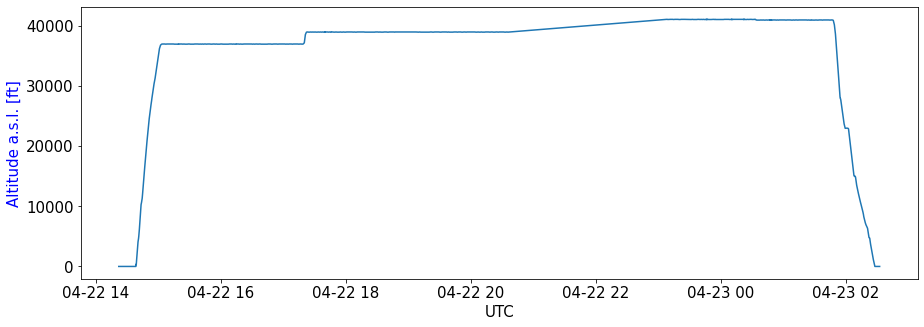

In [109]:
plt.figure(figsize=(15,5))

tele['time'] = pd.to_datetime(tele['UTC'], format='%Y-%m-%dT%H:%M:%SZ')
tele.set_index('time', inplace=True)
tele.sort_index(inplace=True)
plt.plot(tele['Altitude'])
plt.xlabel('UTC')
plt.ylabel('Altitude a.s.l. [ft]', color='blue')

In [8]:
#tele

# Combine AIRDOS and telemetry data

(0.0, 2.0)

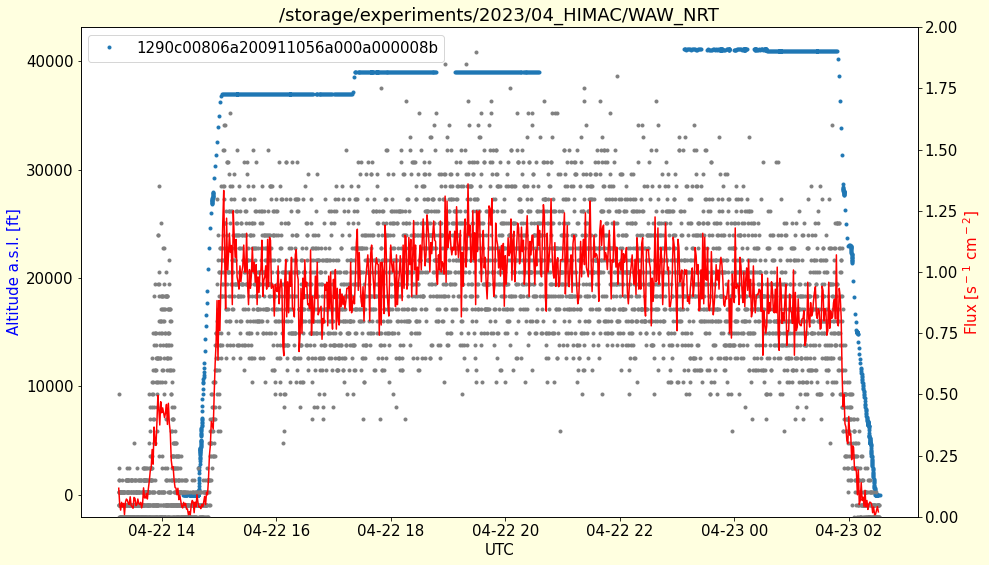

In [7]:
FIRST_CHANNEL = 9

plt.figure(figsize=(15,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})


plt.plot(tele['Altitude'], label=str(rc.loc[rc[0]=='$DOS'][[6]].iloc[0,0]), marker='.', linestyle='')
# Set limits of plot for magnification
#plt.xlim(pd.Timestamp('2019-09-03'),pd.Timestamp('2019-09-7'))
#plt.xlim(pd.Timestamp('2021-06-8'),pd.Timestamp('2021-06-12'))
#plt.xlim(pd.Timestamp('2021-10-8'),pd.Timestamp('2021-11-5')) # SWA last measurement
#plt.xlim(pd.Timestamp('2021-9-15'),pd.Timestamp('2021-9-28')) # SWB last measurement
plt.ylabel('Altitude a.s.l. [ft]', color='blue')
plt.xlabel('UTC')
plt.legend()
#rc = rc.iloc[3286:]

plt.twinx()

rc['sum'] = rc[range(FIRST_CHANNEL,500)].sum(axis=1)/10/2
#rc['sum'] = rc[range(FIRST_CHANNEL,500)].sum(axis=1)

rc['sum'].plot(marker='.', linestyle='', color='gray')
#(rc.iloc[:,FIRST_CHANNEL]/10/2).plot(color='sandybrown')
rcc = rc.resample('1T').mean()
rcc['sum'].plot(color='red')
plt.ylabel('Flux [s$^-$$^1$ cm$^-$$^2$]', color='red')
plt.title(fto)

plt.ylim([0,2]) 


In [120]:
rc

0          1         2      3  \
time                                                         
NaT                       $DOS  LABDOS01A       NaN    514   
2023-04-22 13:15:11.340  $HIST          0     11.34  21355   
2023-04-22 13:15:22.260  $HIST          1     22.26  21334   
NaT                       $DOS  LABDOS01A       NaN    514   
2023-04-22 13:15:11.330  $HIST          0     11.33  21443   
...                        ...        ...       ...    ...   
2023-04-23 02:29:55.610  $HIST       4376  47695.61  21299   
2023-04-23 02:30:06.430  $HIST       4377  47706.43  21402   
2023-04-23 02:30:17.240  $HIST       4378  47717.24  21371   
2023-04-23 02:30:28.600  $HIST       4379  47728.60  21342   
2023-04-23 02:30:38.900  $HIST       4380  47738.90  21364   

                                                                4        5  \
time                                                                         
NaT                      71cdf196883fa3ab648ae47327ef2137eb69420f  CIBuild   
2023-04-22 13:15:11.340                                         2      375   
2023-04-22 13:15:22.260                                         5      392   
NaT                      71cdf196883fa3ab648ae47327ef2137eb69420f  CIBuild   
2023-04-22 13:15:11.330                                         1      304   
...                                                           ...      ...   
2023-04-23 02:29:55.610                                         1      221   
2023-04-23 02:30:06.430                                         0      223   
2023-04-23 02:30:17.240                                         2      188   
2023-04-23 02:30:28.600                                         1      215   
2023-04-23 02:30:38.900                                         0      222   

                                                        6       7     8    9  \
time                                                                           
NaT                      1290c00806a200903c49a000a00000ef     NaN   NaN  NaN   
2023-04-22 13:15:11.340                             17877  6467.0   7.0  0.0   
2023-04-22 13:15:22.260                             17828  6510.0  14.0  2.0   
NaT                      1290c00806a200903c49a000a00000ef     NaN   NaN  NaN   
2023-04-22 13:15:11.330                             18255  6077.0   3.0  0.0   
...                                                   ...     ...   ...  ...   
2023-04-23 02:29:55.610                             17668  6888.0   6.0  0.0   
2023-04-23 02:30:06.430                             17778  6678.0   2.0  0.0   
2023-04-23 02:30:17.240                             17649  6866.0   7.0  2.0   
2023-04-23 02:30:28.600                             17764  6755.0   6.0  0.0   
2023-04-23 02:30:38.900                             17759  6736.0   2.0  0.0   

                         ...  500  501  502  503  504  runtime   seconds  \
time                     ...                                               
NaT                      ...  NaN  NaN  NaN  NaN  NaN      NaN      0.00   
2023-04-22 13:15:11.340  ...  0.0  0.0  0.0  0.0  0.0   -11.34     11.34   
2023-04-22 13:15:22.260  ...  0.0  0.0  0.0  0.0  0.0   -10.92     22.26   
NaT                      ...  NaN  NaN  NaN  NaN  NaN    22.26      0.00   
2023-04-22 13:15:11.330  ...  0.0  0.0  0.0  0.0  0.0   -11.33     11.33   
...                      ...  ...  ...  ...  ...  ...      ...       ...   
2023-04-23 02:29:55.610  ...  0.0  0.0  0.0  0.0  0.0   -10.82  47695.61   
2023-04-23 02:30:06.430  ...  0.0  0.0  0.0  0.0  0.0   -10.82  47706.43   
2023-04-23 02:30:17.240  ...  0.0  0.0  0.0  0.0  0.0   -10.81  47717.24   
2023-04-23 02:30:28.600  ...  0.0  0.0  0.0  0.0  0.0   -11.36  47728.60   
2023-04-23 02:30:38.900  ...  0.0  0.0  0.0  0.0  0.0   -10.30  47738.90   

                                      run                    time   sum  
time                                                                     
NaT                      2023

0.034 0.016


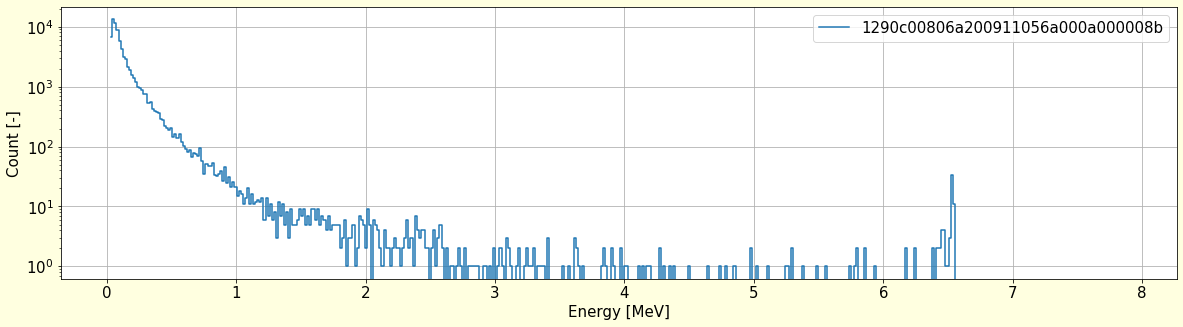

In [8]:
ener = rc.iloc[:,FIRST_CHANNEL:500].sum()

coef3 = np.array([0.,0.])
coef3[1] = 0.016
coef3[0] = 0.034
#coef3[1] = 0.03
#coef3[0] = 0.06

#(60 keV +-15 keV) + CH * 30 keV 
#0.034 MeV + ch * 0.016 MeV


print (coef3[0], coef3[1])

e3 = pd.DataFrame()
e3['1'] = ener
e3['i'] = ener.index
e3['x'] = (e3['i'].astype(float)-FIRST_CHANNEL) * coef3[1] + coef3[0]

plt.figure(figsize=(20,5), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})
plt.yscale('log')
#plt.xscale('log')

plt.plot(e3['x'], e3['1'] , label=str(rc.loc[rc[0]=='$DOS'][[6]].iloc[0,0]), drawstyle='steps-mid')

plt.xlabel('Energy [MeV]')
plt.ylabel('Count [-]')
plt.grid()
plt.legend()
#plt.xticks(np.arange(0, 10, 1))
#plt.xlim(0,2)
#plt.vlines(0.511,1,1e4, color='red')

None

/tmp/ipykernel_29347/2395577449.py:2: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.

/tmp/ipykernel_29347/2395577449.py:37: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



0.034 0.016
0.034 0.016


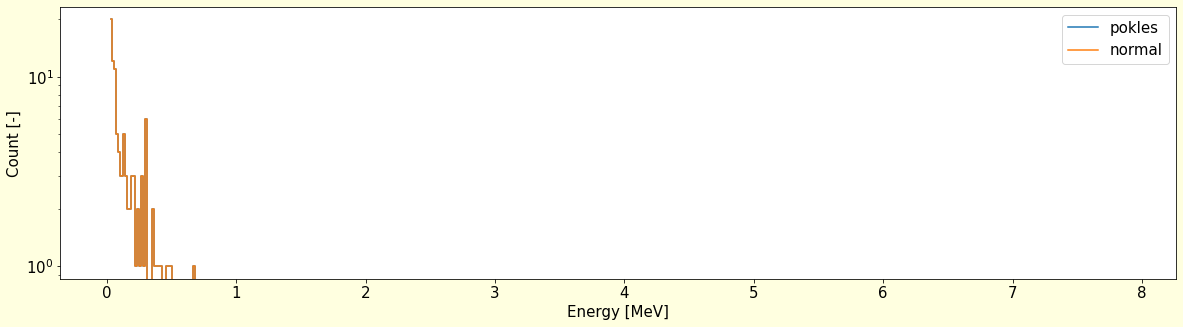

In [79]:
#ener = rc.loc['2023-04-25 14:25':'2023-04-25 14:35'].iloc[:,FIRST_CHANNEL:500].sum()
ener = rc.loc['2023-05-10 14:50':'2023-05-10 15:00'].iloc[:,FIRST_CHANNEL:500].sum()

coef3 = np.array([0.,0.])
coef3[1] = 0.016
coef3[0] = 0.034
#coef3[1] = 0.03
#coef3[0] = 0.06

#(60 keV +-15 keV) + CH * 30 keV 
#0.034 MeV + ch * 0.016 MeV


print (coef3[0], coef3[1])

e3 = pd.DataFrame()
e3['1'] = ener
e3['i'] = ener.index
e3['x'] = (e3['i'].astype(float)-FIRST_CHANNEL) * coef3[1] + coef3[0]

plt.figure(figsize=(20,5), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})
plt.yscale('log')
#plt.xscale('log')

plt.plot(e3['x'], e3['1'] , label='pokles', drawstyle='steps-mid')

plt.xlabel('Energy [MeV]')
plt.ylabel('Count [-]')
plt.grid()
plt.legend()
#plt.xticks(np.arange(0, 10, 1))
#plt.xlim(0,2)
#plt.vlines(0.511,1,1e4, color='red')

#ener = rc.loc['2023-04-25 14:50':'2023-04-25 15:00'].iloc[:,FIRST_CHANNEL:500].sum()
ener = rc.loc['2023-05-10 14:50':'2023-05-10 15:00'].iloc[:,FIRST_CHANNEL:500].sum()

coef3 = np.array([0.,0.])
coef3[1] = 0.016
coef3[0] = 0.034
#coef3[1] = 0.03
#coef3[0] = 0.06

#(60 keV +-15 keV) + CH * 30 keV 
#0.034 MeV + ch * 0.016 MeV


print (coef3[0], coef3[1])

e3 = pd.DataFrame()
e3['1'] = ener
e3['i'] = ener.index
e3['x'] = (e3['i'].astype(float)-FIRST_CHANNEL) * coef3[1] + coef3[0]

plt.plot(e3['x'], e3['1'] , label='normal', drawstyle='steps-mid')

plt.xlabel('Energy [MeV]')
plt.ylabel('Count [-]')
plt.grid()
plt.legend()
#plt.xticks(np.arange(0, 10, 1))
#plt.xlim(0,2)
#plt.vlines(0.511,1,1e4, color='red')

None
None

In [12]:
rc.iloc[:,8:500]
#e3.loc[8:499]
e3

1    i      x
8    1838.0    8  0.034
9    2198.0    9  0.050
10   2949.0   10  0.066
11   3155.0   11  0.082
12   2125.0   12  0.098
..      ...  ...    ...
495     0.0  495  7.826
496     0.0  496  7.842
497     0.0  497  7.858
498     0.0  498  7.874
499     0.0  499  7.890

[492 rows x 3 columns]

TypeError: cannot do slice indexing on Index with these indexers [8] of type int

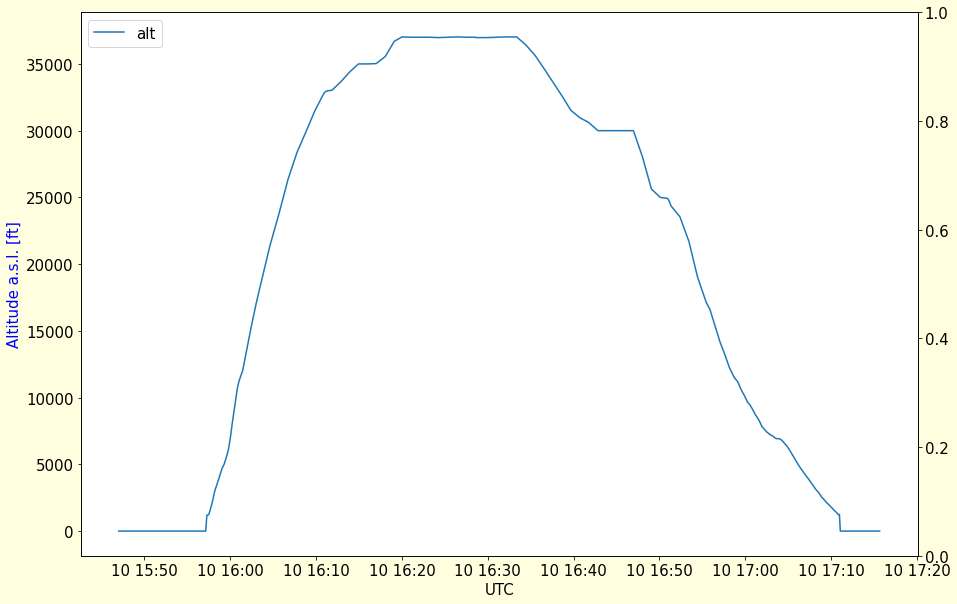

In [80]:
FIRST_CHANNEL = 9

plt.figure(figsize=(15,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

plt.plot(tele['Altitude'], label='alt')
# Set limits of plot for magnification
#plt.xlim(pd.Timestamp('2019-09-03'),pd.Timestamp('2019-09-7'))
#plt.xlim(pd.Timestamp('2021-06-8'),pd.Timestamp('2021-06-12'))
#plt.xlim(pd.Timestamp('2021-10-8'),pd.Timestamp('2021-11-5')) # SWA last measurement
#plt.xlim(pd.Timestamp('2021-9-15'),pd.Timestamp('2021-9-28')) # SWB last measurement
plt.ylabel('Altitude a.s.l. [ft]', color='blue')
plt.xlabel('UTC')

#rc = rc.iloc[3286:]
plt.legend(loc=2)

plt.twinx()

rc['sum'] = rc[range(FIRST_CHANNEL,500)].sum(axis=1)/6.88/2
#rc['sum'] = rc[range(FIRST_CHANNEL,500)].sum(axis=1)
rc['ener'] = (np.asarray(rc.iloc[:,8:500]) * np.asarray(e3.loc[8:499,'x'])).sum(axis=1)    
rc['dsi'] = ((1e6 * (1.602e-19 * rc['ener'] * 1e6)/0.1398e-3)/6.88) * 3600 #* 2.45 * 1.048#* 1.1 #1.094#2.71 # in uGy/h


rc['dsi'].plot(marker='.', linestyle='', color='gray')
rc['roll'] = rc['dsi'].rolling(150).mean()
rc['roll'].plot(color='black')
rcc = rc.resample('10T').mean()
rcc['dsi'].plot(color='red')
plt.ylabel('Doserate [µGy/h]', color='red')
plt.title(fto)
#plt.yscale('log')

plt.ylim([0,3]) 
plt.legend(loc=1)


/tmp/ipykernel_20083/1568872176.py:17: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  rcc = rc.loc['2023-04-22 14:25':'2023-04-23 2:30'] # WAW-NRT


Text(0, 0.5, 'Flux [s$^-$$^1$ cm$^-$$^2$]')

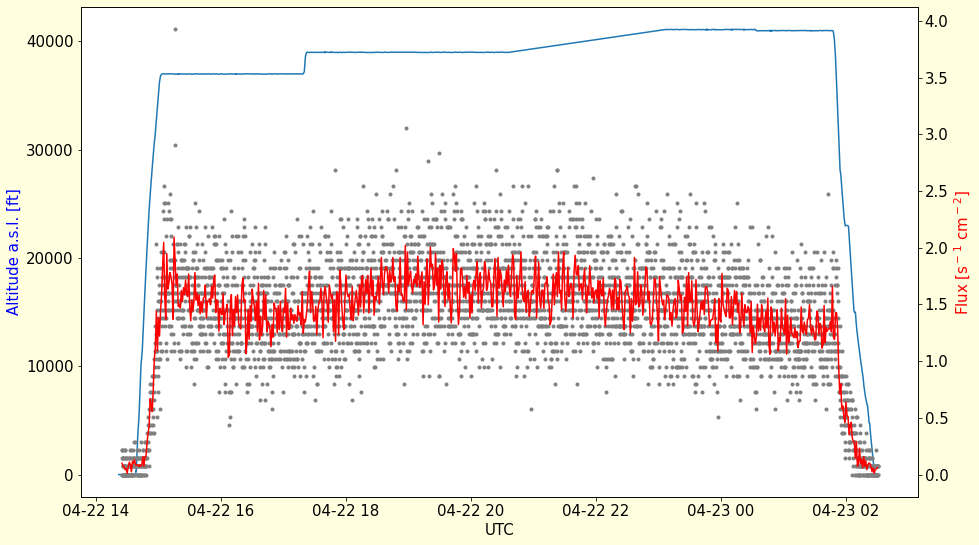

In [185]:
FIRST_CHANNEL = 8

plt.figure(figsize=(15,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})


plt.plot(tele['Altitude'])
# Set limits of plot for magnification
#plt.xlim(pd.Timestamp('2019-09-03'),pd.Timestamp('2019-09-7'))
#plt.xlim(pd.Timestamp('2021-06-8'),pd.Timestamp('2021-06-12'))
#plt.xlim(pd.Timestamp('2021-10-8'),pd.Timestamp('2021-11-5')) # SWA last measurement
#plt.xlim(pd.Timestamp('2021-9-15'),pd.Timestamp('2021-9-28')) # SWB last measurement
plt.ylabel('Altitude a.s.l. [ft]', color='blue')
plt.xlabel('UTC')

#rcc = rc.loc['2023-03-1 12:35':'2023-03-1 16:25'] # NRT-WAW
rcc = rc.loc['2023-04-22 14:25':'2023-04-23 2:30'] # WAW-NRT

plt.twinx()

rcc['sum'] = rcc[range(FIRST_CHANNEL,500)].sum(axis=1)/6.88/2
#rc['sum'] = rc[range(FIRST_CHANNEL,500)].sum(axis=1)

rcc['sum'].plot(marker='.', linestyle='', color='gray')
rccc = rcc.resample('1T').mean()
rccc['sum'].plot(color='red')
plt.ylabel('Flux [s$^-$$^1$ cm$^-$$^2$]', color='red')

#plt.ylim([0,30]) 


0.034 0.016


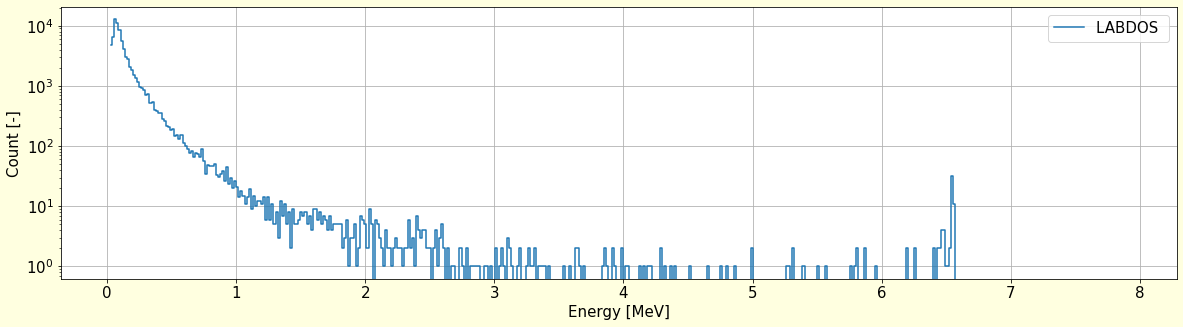

In [186]:
ener = rcc.iloc[:,FIRST_CHANNEL:500].sum()

coef3 = np.array([0.,0.])
coef3[1] = 0.016
coef3[0] = 0.034
#coef3[1] = 0.03
#coef3[0] = 0.06

#(60 keV +-15 keV) + CH * 30 keV 
#0.034 MeV + ch * 0.016 MeV


print (coef3[0], coef3[1])

e3 = pd.DataFrame()
e3['1'] = ener
e3['i'] = ener.index
e3['x'] = (e3['i'].astype(float)-FIRST_CHANNEL) * coef3[1] + coef3[0]

plt.figure(figsize=(20,5), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})
plt.yscale('log')
#plt.xscale('log')

plt.plot(e3['x'], e3['1'] , label='LABDOS ', drawstyle='steps-mid')

plt.xlabel('Energy [MeV]')
plt.ylabel('Count [-]')
plt.grid()
plt.legend()
#plt.xticks(np.arange(0, 10, 1))
#plt.xlim(0,2)
#plt.vlines(0.511,1,1e4, color='red')

None

0.034 0.016


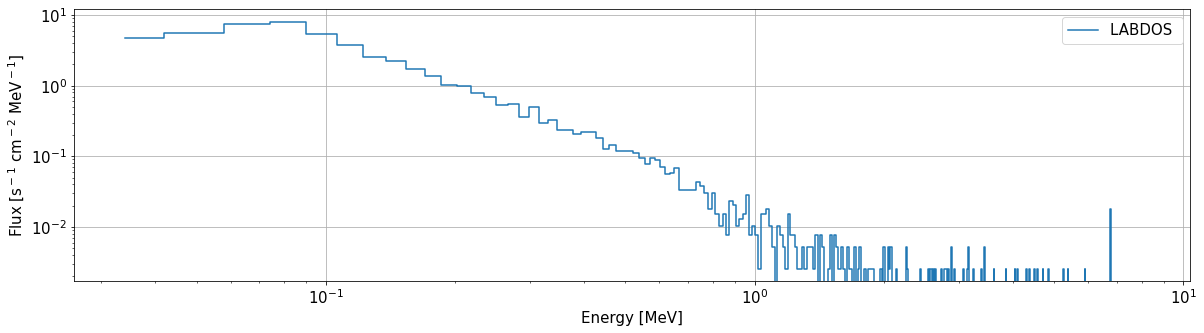

In [36]:
ener = rc.iloc[:,FIRST_CHANNEL:500].sum()

coef3 = np.array([0.,0.])
coef3[1] = 0.016
coef3[0] = 0.034
#coef3[1] = 0.03
#coef3[0] = 0.06

#(60 keV +-15 keV) + CH * 30 keV 
#0.034 MeV + ch * 0.016 MeV


print (coef3[0], coef3[1])

e3 = pd.DataFrame()
e3['1'] = ener
e3['i'] = ener.index
e3['x'] = (e3['i'].astype(float)-FIRST_CHANNEL) * coef3[1] + coef3[0] 
plt.figure(figsize=(20,5))
matplotlib.rcParams.update({'font.size': 15})
plt.yscale('log')
plt.xscale('log')

plt.plot(e3['x'], e3['1'] / 2 / measurement_duration / coef3[1], label='LABDOS ', drawstyle='steps-mid')

plt.xlabel('Energy [MeV]')
plt.ylabel('Flux [s$^-$$^1$ cm$^-$$^2$ MeV$^-$$^1$]')
plt.grid()
plt.legend()
#plt.xticks(np.arange(0, 10, 1))
#plt.xlim(0,2)
#plt.vlines(0.511,1,1e4, color='red')

None

In [203]:
print('The first measurement', rcc.iloc[0,1])
print('The last measurement', rcc.iloc[-1,1])
measurement_duration = (int(rcc.iloc[-1,1]) - int(rcc.iloc[0,1])) * 10 #6.88
flight_duration = rcc.iloc[-1,2] - rcc.iloc[0,2]
print('Begin', rcc.iloc[0,2], 's')
print('End', rcc.iloc[-1,2], 's')
print('Flight duration', round(flight_duration,2), 's')
print('Measurement duration', measurement_duration, 's')
deathtime_ratio = flight_duration / measurement_duration
print('Deathtime ratio', round(deathtime_ratio,2))

e3['total'] = e3['1']*e3['x']
depener = e3['total'].sum()*deathtime_ratio
print('Deposited Energy including deathtime', round(depener,2), 'MeV')
dose = (1e6*(1.602e-19 * depener*1e6)/0.1398e-3) 

# size of the chip (20 mm · 10 mm), 
# the thickness of the depletion layer (0.3 mm), 
# and the density of silicon (2.33 g cm^3)
# 0.1398e-3 kg
#dose = ((1e6 * (1.602e-19 * depener * 1e6)/0.1398e-3)/10.4) * 3600 * 2.71 # in uGy/h

print('Dose in silicon', round(dose,2), 'µGy')


The first measurement 913
The last measurement 4412
Begin 9905.2 s
End 47759.7 s
Flight duration 37854.5 s
Measurement duration 34990 s
Deathtime ratio 1.08
Deposited Energy including deathtime 21188.76 MeV
Dose in silicon 24.28 µGy


## Route map

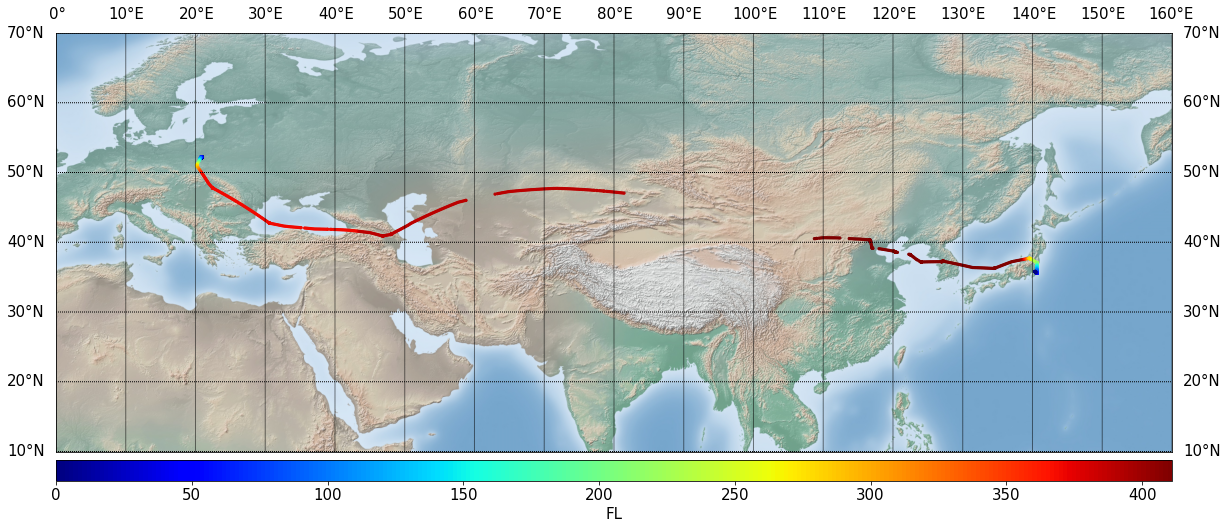

In [27]:
import time, calendar, datetime, numpy
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib
import urllib, os

tele['lat'] = tele['Position'].str.split(',').str[0]
tele['lon'] = tele['Position'].str.split(',').str[1]
tele.lon = pd.to_numeric(tele.lon)
tele.lat = pd.to_numeric(tele.lat)
tele.Altitude = pd.to_numeric(tele.Altitude)


plt.figure(figsize=(20,20))
plt.tight_layout()

matplotlib.rcParams.update({'font.size': 15})

# create Basemap instance.
#m = Basemap(projection='kav7',lon_0=0)
m = Basemap(projection='cyl',lon_0=0, llcrnrlon=0,llcrnrlat=10,urcrnrlon=160,urcrnrlat=70)
#m = Basemap(projection='robin',lon_0=0)
#m = Basemap(llcrnrlon=-180,llcrnrlat=-80,urcrnrlon=180,urcrnrlat=85,projection='mill')


x, y = m(tele.lon.tolist(),tele.lat.tolist())
#m.drawmapboundary(fill_color='#99ffff')
#m.fillcontinents(color='#cc9966',lake_color='#99ffff',zorder=0)
# draw parallels and meridians, but don't bother labelling them.
m.drawparallels(np.arange(-90.,+90.,10.),labels=[1,1,0,0])
m.drawmeridians(np.arange(-180.,180.,10.),labels=[0,0,1,0])
m.shadedrelief()

im1 = m.scatter(x,y,c=(tele.Altitude/100).tolist(),marker='.', s = 20, cmap='jet')
cb = m.colorbar(im1,"bottom", size="5%", pad="2%")
cb.set_label('FL')

#plt.clim(0, 12500)  # limit for color axis
plt.show()                


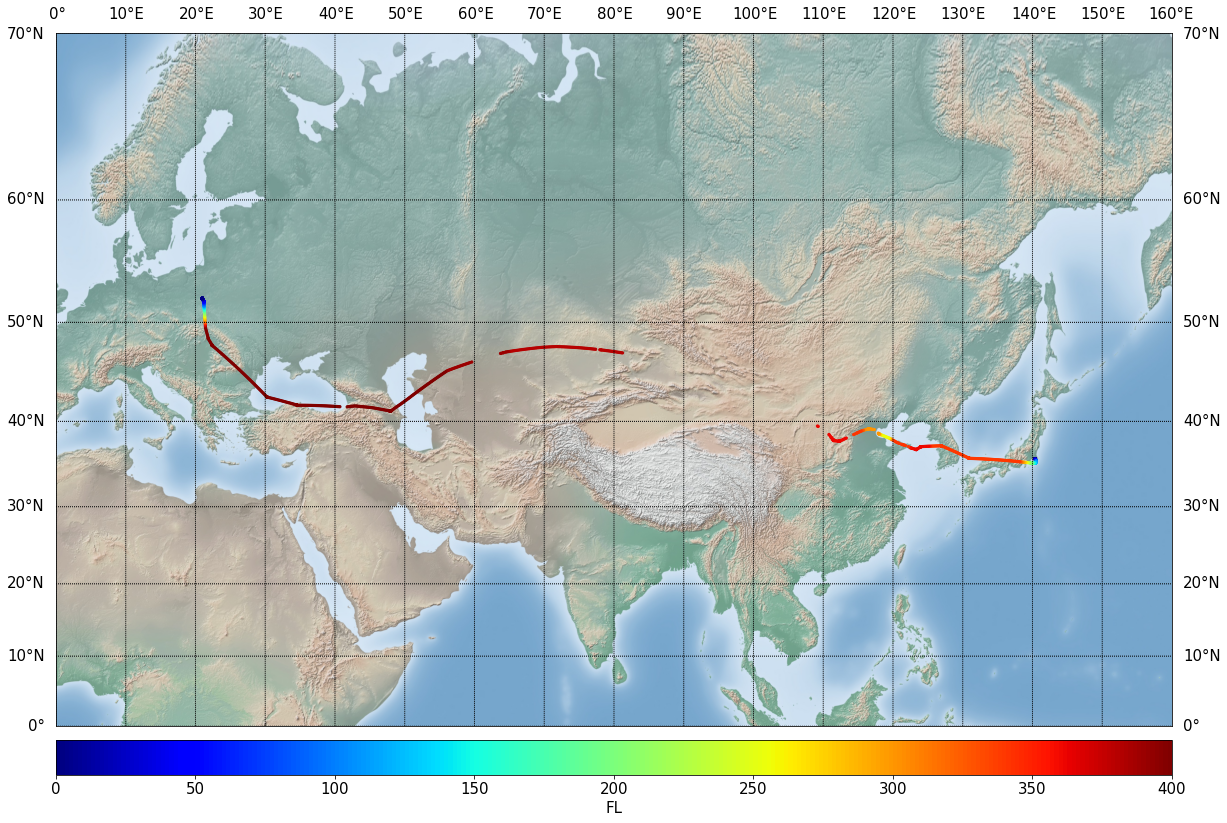

In [26]:
import time, calendar, datetime, numpy
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib
import urllib, os

tele['lat'] = tele['Position'].str.split(',').str[0]
tele['lon'] = tele['Position'].str.split(',').str[1]
tele.lon = pd.to_numeric(tele.lon)
tele.lat = pd.to_numeric(tele.lat)
tele.Altitude = pd.to_numeric(tele.Altitude)


plt.figure(figsize=(20,20))
plt.tight_layout()

matplotlib.rcParams.update({'font.size': 15})

# create Basemap instance.
#m = Basemap(projection='kav7',lon_0=0)
#m = Basemap(projection='tmerc',lon_0=0,lat_0=0, llcrnrlon=-180,llcrnrlat=-90,urcrnrlon=180,urcrnrlat=90)
m = Basemap(projection='merc',lon_0=0,lat_0=0, llcrnrlon=0,llcrnrlat=0,urcrnrlon=160,urcrnrlat=70)
#m = Basemap(projection='robin',lon_0=0)
#m = Basemap(llcrnrlon=-180,llcrnrlat=-80,urcrnrlon=180,urcrnrlat=85,projection='mill')


x, y = m(tele.lon.tolist(),tele.lat.tolist())
#m.drawmapboundary(fill_color='#99ffff')
#m.fillcontinents(color='#cc9966',lake_color='#99ffff',zorder=0)
# draw parallels and meridians, but don't bother labelling them.
m.drawparallels(np.arange(-90.,+90.,10.),labels=[1,1,0,0])
m.drawmeridians(np.arange(-180.,180.,10.),labels=[0,0,1,0])
m.shadedrelief()

im1 = m.scatter(x,y,c=(tele.Altitude/100).tolist(),marker='.', s = 20, cmap='jet')
cb = m.colorbar(im1,"bottom", size="5%", pad="2%")
cb.set_label('FL')

#plt.clim(0, 12500)  # limit for color axis
plt.show()                


In [38]:
cari_photons = pd.read_csv('/storage/experiments/2023/0301_SA/0301_W62987/CARI/W62987_2f5ddba8_D_photons.DAT', delim_whitespace=True, skipfooter=3, skiprows=1, header=None, comment='*', engine='python')
cari_photons.reset_index(drop=True, inplace=True)
cari_photons['time'] = pd.to_datetime(dict(year=cari_photons[6], month=cari_photons[7], day=cari_photons[8], hour=cari_photons[9], minute=cari_photons[10]))
cari_photons.set_index('time', drop=False, inplace=True)
print('Loaded')

Loaded


In [39]:
cari_electrons = pd.read_csv('/storage/experiments/2023/0301_SA/0301_W62987/CARI/W62987_2f5ddba8_D_electrons.DAT', delim_whitespace=True, skipfooter=3, skiprows=1, header=None, comment='*', engine='python')
cari_electrons.reset_index(drop=True, inplace=True)
cari_electrons['time'] = pd.to_datetime(dict(year=cari_electrons[6], month=cari_electrons[7], day=cari_electrons[8], hour=cari_electrons[9], minute=cari_electrons[10]))
cari_electrons.set_index('time', drop=False, inplace=True)
print('Loaded')

Loaded


In [46]:
cari_protons = pd.read_csv('/storage/experiments/2023/0301_SA/0301_W62987/CARI/W62987_2f5ddba8_D_protons.DAT', delim_whitespace=True, skipfooter=3, skiprows=1, header=None, comment='*', engine='python')
cari_protons.reset_index(drop=True, inplace=True)
cari_protons['time'] = pd.to_datetime(dict(year=cari_protons[6], month=cari_protons[7], day=cari_protons[8], hour=cari_protons[9], minute=cari_protons[10]))
cari_protons.set_index('time', drop=False, inplace=True)
print('Loaded')

Loaded


In [58]:
cari_alphas = pd.read_csv('/storage/experiments/2023/0301_SA/0301_W62987/CARI/W62987_2f5ddba8_D_alphas.DAT', delim_whitespace=True, skipfooter=3, skiprows=1, header=None, comment='*', engine='python')
cari_alphas.reset_index(drop=True, inplace=True)
cari_alphas['time'] = pd.to_datetime(dict(year=cari_alphas[6], month=cari_alphas[7], day=cari_alphas[8], hour=cari_alphas[9], minute=cari_alphas[10]))
cari_alphas.set_index('time', drop=False, inplace=True)
print('Loaded')

Loaded


In [54]:
cari_neg_muons = pd.read_csv('/storage/experiments/2023/0301_SA/0301_W62987/CARI/W62987_2f5ddba8_D_neg_muons.DAT', delim_whitespace=True, skipfooter=3, skiprows=1, header=None, comment='*', engine='python')
cari_neg_muons.reset_index(drop=True, inplace=True)
cari_neg_muons['time'] = pd.to_datetime(dict(year=cari_neg_muons[6], month=cari_neg_muons[7], day=cari_neg_muons[8], hour=cari_neg_muons[9], minute=cari_neg_muons[10]))
cari_neg_muons.set_index('time', drop=False, inplace=True)
print('Loaded')

Loaded


In [118]:
cari_positrons = pd.read_csv('/storage/experiments/2023/0301_SA/0301_W62987/CARI/W62987_2f5ddba8_D_positrons.DAT', delim_whitespace=True, skipfooter=3, skiprows=1, header=None, comment='*', engine='python')
cari_positrons.reset_index(drop=True, inplace=True)
cari_positrons['time'] = pd.to_datetime(dict(year=cari_positrons[6], month=cari_positrons[7], day=cari_positrons[8], hour=cari_positrons[9], minute=cari_positrons[10]))
cari_positrons.set_index('time', drop=False, inplace=True)
print('Loaded')

Loaded


In [49]:
cari_total = pd.read_csv('/storage/experiments/2023/0301_SA/0301_W62987/CARI/W62987_2f5ddba8_D_Total.DAT', delim_whitespace=True, skipfooter=3, skiprows=1, header=None, comment='*', engine='python')
cari_total.reset_index(drop=True, inplace=True)
cari_total['time'] = pd.to_datetime(dict(year=cari_total[6], month=cari_total[7], day=cari_total[8], hour=cari_total[9], minute=cari_total[10]))
cari_total.set_index('time', drop=False, inplace=True)
print('Loaded')

Loaded


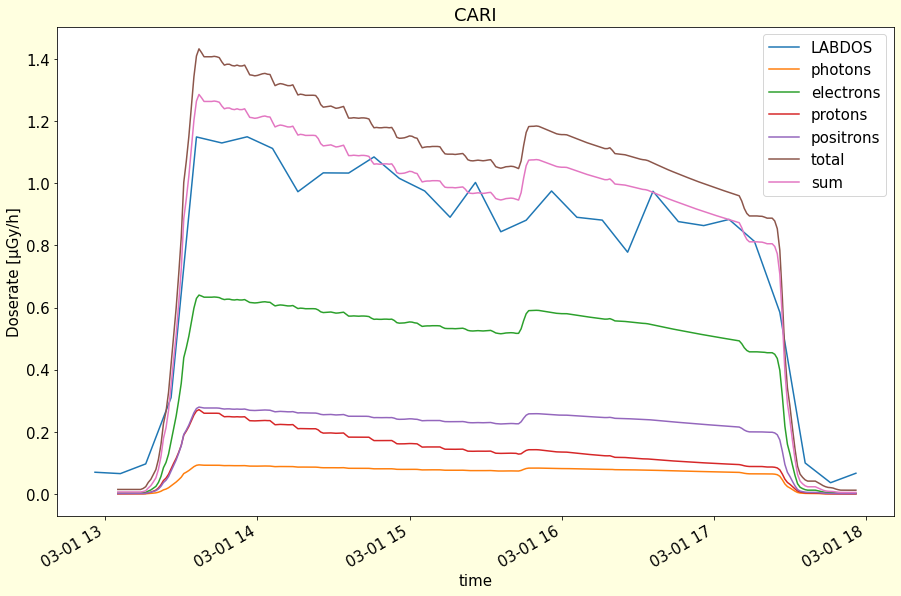

In [192]:
plt.figure(figsize=(15,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

plt.plot(rcc.index + timedelta(hours=1.1),rcc['dsi'], label='LABDOS')
#plt.plot(rc.index + timedelta(hours=1),rc['roll'], label='LABDOS')

cari_photons[4].plot(label='photons')
cari_electrons[4].plot(label='electrons')
cari_protons[4].plot(label='protons')
#cari_alphas[4].plot(label='alphas')
cari_positrons[4].plot(label='positrons')
#cari_neg_muons[4].plot(label='neg_muons')
cari_total[4].plot(label='total')
(cari_photons[4]+cari_electrons[4]+cari_protons[4]+cari_positrons[4]).plot(label='sum')
plt.ylabel('Doserate [µGy/h]')
plt.title('CARI')
plt.legend()

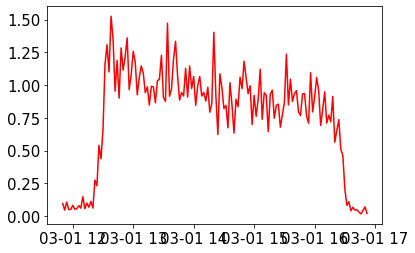

In [145]:
plt.plot(rcc.index,rcc['dsi'], color='red')


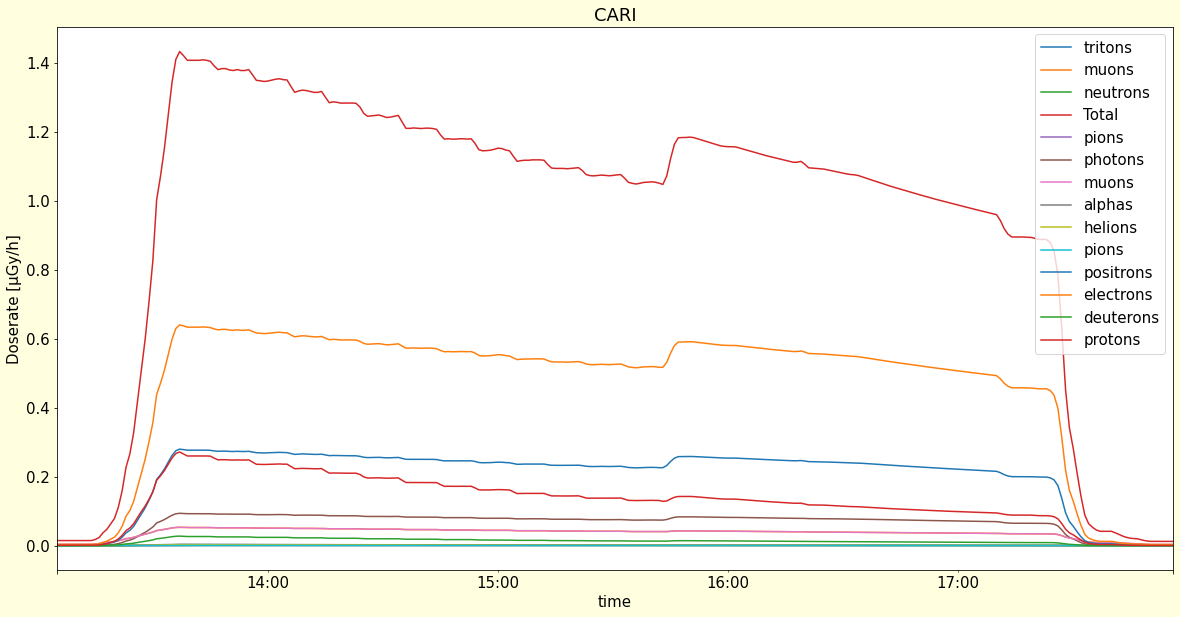

In [151]:
plt.figure(figsize=(20,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})


dto = '/storage/experiments/2023/0301_SA/0301_W62987/CARI/'


for fto in glob.iglob(dto + 'W62987_2f5ddba8_D*'): # generator, search immediate subdirectories 
    particles = fto.split('/')[-1].split('.')[-2].split('_')[-1]
    if (len(particles)>2):
        cari = pd.read_table(fto, delim_whitespace=True, skipfooter=3, skiprows=1, header=None, comment='*', engine='python')    
        #cari.reset_index(drop=True, inplace=True)
        cari['time'] = pd.to_datetime(dict(year=cari[6], month=cari[7], day=cari[8], hour=cari[9], minute=cari[10]))
        cari.set_index('time', drop=False, inplace=True)
        cari[4].plot(label=particles)
    

plt.ylabel('Doserate [µGy/h]')
plt.title('CARI')
plt.legend()

In [113]:
fto.split('/')[-1].split('.')[-2].split('_')[-1]

'tritons'

# Load and plot mutiple devices

/storage/experiments/2023/05_CERF/PRG_GVA/LABDOS/20/0.TXT


/tmp/ipykernel_29347/4282581349.py:42: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



/storage/experiments/2023/05_CERF/PRG_GVA/LABDOS/B8/0.TXT


/tmp/ipykernel_29347/4282581349.py:42: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



/storage/experiments/2023/05_CERF/PRG_GVA/LABDOS/4E/0.TXT


/tmp/ipykernel_29347/4282581349.py:42: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



/storage/experiments/2023/05_CERF/PRG_GVA/LABDOS/7E/0.TXT


/tmp/ipykernel_29347/4282581349.py:42: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



/storage/experiments/2023/05_CERF/PRG_GVA/LABDOS/EF/0.TXT


/tmp/ipykernel_29347/4282581349.py:42: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



/storage/experiments/2023/05_CERF/PRG_GVA/LABDOS/D9/0.TXT


/tmp/ipykernel_29347/4282581349.py:42: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



Text(0.5, 0, 'UTC')

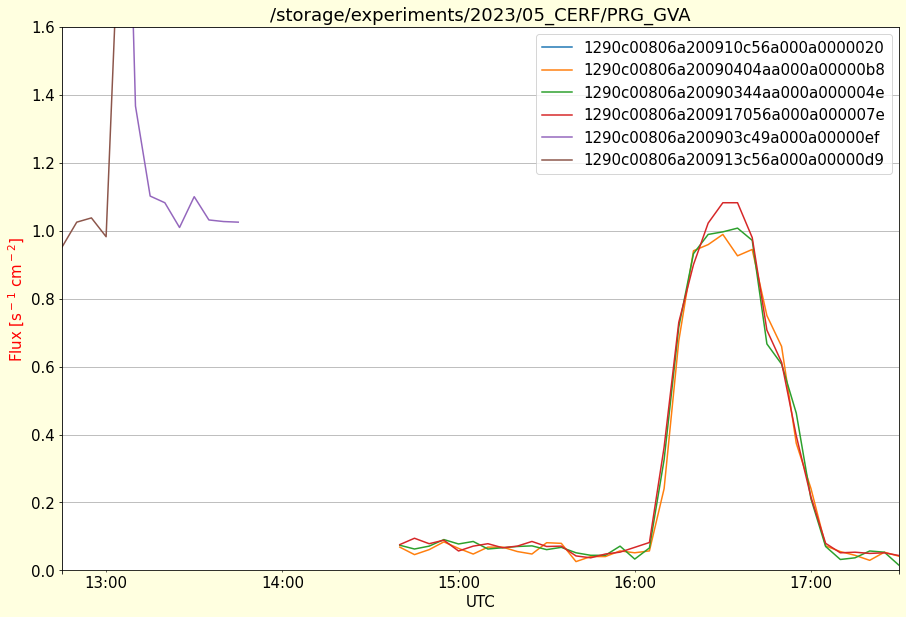

In [67]:
ftt = glob.iglob(fto+"/**/**/?.TXT") # generator, search immediate subdirectories 
#SWITCH_ON_TIMES = ['2023-04-22 13:15']

plt.figure(figsize=(15,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

for f in ftt:
    l=[]
    l.extend(range(0,505))

    df = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False)
    df = df.reset_index(drop=True)
    print(f)
    
    df[2] = df[2].apply(pd.to_numeric, errors='coerce')

    df['runtime'] = np.nan
    df.loc[df[0]=='$HIST','seconds'] = df.loc[df[0]=='$HIST',2]
    df.loc[df[0]=='$DOS','seconds'] = 0
    df['runtime'] = df['seconds'].diff() * -1
    
    #rc = df.copy()  
    rc = df.iloc[:df.loc[df[0]=='$DOS'][-1:].index[0]].copy()


    run = 0
    rc['run'] = np.nan

    try:
        for x in rc.loc[rc[0]=='$DOS'].index:
            rc.loc[x,'run'] = SWITCH_ON_TIMES[run]
            run += 1
    except:
        pass
    rc['run'].fillna(method="ffill", inplace=True)

    rc[2] = pd.to_numeric(rc[2])
    rc['time'] = pd.to_datetime(rc.run) + pd.to_timedelta(rc[2], unit='s')
    rc.set_index(rc['time'], drop=False, inplace=True)
    
    #rc = rc.sort_index().loc['2023-04-25 14:00':'2023-04-26 02:00']
    rc = rc.sort_index().loc['2023-05-10 10:00':'2023-05-10 20:00']
    
    FIRST_CHANNEL = 9

    rc['sum'] = rc[range(FIRST_CHANNEL,500)].sum(axis=1)/10/2

    #rc['sum'].plot(marker='.', linestyle='', color='gray')
    rcc = rc.resample('5T').mean()
    rcc['sum'].plot(label=str(df.loc[df[0]=='$DOS'][[6]].iloc[0,0]))


plt.ylim([0,1.6]) 
plt.ylabel('Flux [s$^-$$^1$ cm$^-$$^2$]', color='red')
plt.title(fto)
plt.legend()
plt.grid()
plt.xlabel('UTC')
  
#plt.twinx()

#tele['Altitude'].plot(label='Altitude')
#plt.ylabel('Altitude a.s.l. [ft]', color='blue')


/storage/experiments/2023/04_HIMAC/NRT_WAW_PRG/LABDOS_D9/0.TXT
0.034 0.016


/tmp/ipykernel_26111/3418987471.py:40: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  rc = rc.loc['2023-04-25 14:00':'2023-04-26 02:00']


/storage/experiments/2023/04_HIMAC/NRT_WAW_PRG/LABDOS_8B/0.TXT
0.034 0.016


/tmp/ipykernel_26111/3418987471.py:40: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  rc = rc.loc['2023-04-25 14:00':'2023-04-26 02:00']


/storage/experiments/2023/04_HIMAC/NRT_WAW_PRG/LABDOS_7E/0.TXT
0.034 0.016


/tmp/ipykernel_26111/3418987471.py:40: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  rc = rc.loc['2023-04-25 14:00':'2023-04-26 02:00']


/storage/experiments/2023/04_HIMAC/NRT_WAW_PRG/LABDOS_EF/0.TXT
0.034 0.016


/tmp/ipykernel_26111/3418987471.py:40: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  rc = rc.loc['2023-04-25 14:00':'2023-04-26 02:00']


/storage/experiments/2023/04_HIMAC/NRT_WAW_PRG/LABDOS_4E/0.TXT
0.034 0.016


/tmp/ipykernel_26111/3418987471.py:40: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  rc = rc.loc['2023-04-25 14:00':'2023-04-26 02:00']


/storage/experiments/2023/04_HIMAC/NRT_WAW_PRG/LABDOS_20/0.TXT
0.034 0.016


/tmp/ipykernel_26111/3418987471.py:40: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  rc = rc.loc['2023-04-25 14:00':'2023-04-26 02:00']


/storage/experiments/2023/04_HIMAC/NRT_WAW_PRG/LABDOS_B8/0.TXT
0.034 0.016


/tmp/ipykernel_26111/3418987471.py:40: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  rc = rc.loc['2023-04-25 14:00':'2023-04-26 02:00']


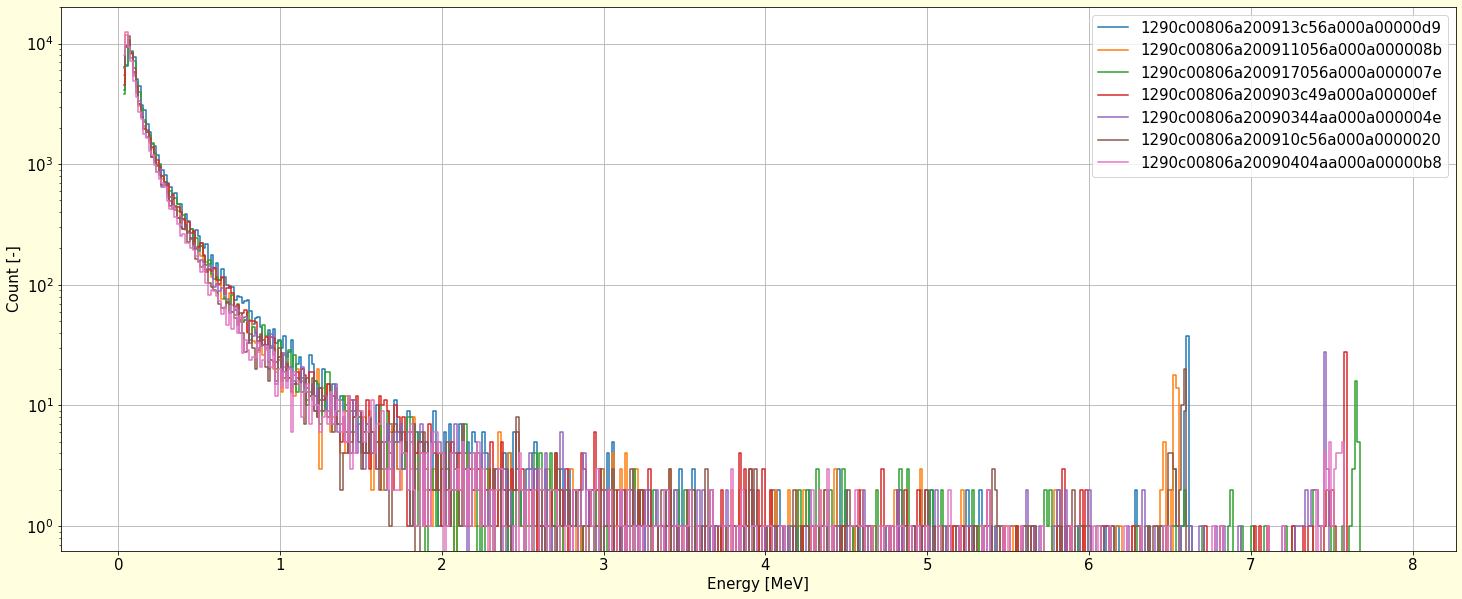

In [83]:
ftt = glob.iglob(fto+"/**/?.TXT") # generator, search immediate subdirectories 
#SWITCH_ON_TIMES = ['2023-04-22 13:15']

plt.figure(figsize=(25,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

for f in ftt:
    l=[]
    l.extend(range(0,505))

    df = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False)
    df = df.reset_index(drop=True)
    print(f)
    
    df[2] = df[2].apply(pd.to_numeric, errors='coerce')

    df['runtime'] = np.nan
    df.loc[df[0]=='$HIST','seconds'] = df.loc[df[0]=='$HIST',2]
    df.loc[df[0]=='$DOS','seconds'] = 0
    df['runtime'] = df['seconds'].diff() * -1
  
    #rc = df.copy()  
    rc = df.iloc[:df.loc[df[0]=='$DOS'][-1:].index[0]].copy()

    run = 0
    rc['run'] = np.nan

    try:
        for x in rc.loc[rc[0]=='$DOS'].index:
            rc.loc[x,'run'] = SWITCH_ON_TIMES[run]
            run += 1
    except:
        pass
    rc['run'].fillna(method="ffill", inplace=True)

    rc[2] = pd.to_numeric(rc[2])
    rc['time'] = pd.to_datetime(rc.run) + pd.to_timedelta(rc[2], unit='s')
    rc.set_index(rc['time'], drop=False, inplace=True)

    rc = rc.loc['2023-04-25 14:00':'2023-04-26 02:00']

    FIRST_CHANNEL = 9

    ener = rc.iloc[:,FIRST_CHANNEL:500].sum()

    coef3 = np.array([0.,0.])
    coef3[1] = 0.016
    coef3[0] = 0.034
    #0.034 MeV + ch * 0.016 MeV

    print (coef3[0], coef3[1])

    e3 = pd.DataFrame()
    e3['1'] = ener
    e3['i'] = ener.index
    e3['x'] = (e3['i'].astype(float)-FIRST_CHANNEL) * coef3[1] + coef3[0]

    plt.yscale('log')
    #plt.xscale('log')

    plt.plot(e3['x'], e3['1'] , label=str(df.loc[df[0]=='$DOS'][[6]].iloc[0,0]), drawstyle='steps-mid')

plt.xlabel('Energy [MeV]')
plt.ylabel('Count [-]')
plt.grid()
plt.legend()


#plt.xticks(np.arange(0, 10, 1))
#plt.xlim(0,2)
#plt.vlines(0.511,1,1e4, color='red')

None

/storage/experiments/2023/04_HIMAC/NRT_WAW_PRG/LABDOS_D9/0.TXT
0.034 0.016


/tmp/ipykernel_26111/16978818.py:40: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  rc = rc.loc['2023-04-25 14:00':'2023-04-26 02:00']


/storage/experiments/2023/04_HIMAC/NRT_WAW_PRG/LABDOS_8B/0.TXT
0.034 0.016


/tmp/ipykernel_26111/16978818.py:40: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  rc = rc.loc['2023-04-25 14:00':'2023-04-26 02:00']


/storage/experiments/2023/04_HIMAC/NRT_WAW_PRG/LABDOS_7E/0.TXT
0.034 0.016


/tmp/ipykernel_26111/16978818.py:40: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  rc = rc.loc['2023-04-25 14:00':'2023-04-26 02:00']


/storage/experiments/2023/04_HIMAC/NRT_WAW_PRG/LABDOS_EF/0.TXT
0.034 0.016


/tmp/ipykernel_26111/16978818.py:40: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  rc = rc.loc['2023-04-25 14:00':'2023-04-26 02:00']


/storage/experiments/2023/04_HIMAC/NRT_WAW_PRG/LABDOS_4E/0.TXT
0.034 0.016


/tmp/ipykernel_26111/16978818.py:40: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  rc = rc.loc['2023-04-25 14:00':'2023-04-26 02:00']


/storage/experiments/2023/04_HIMAC/NRT_WAW_PRG/LABDOS_20/0.TXT
0.034 0.016


/tmp/ipykernel_26111/16978818.py:40: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  rc = rc.loc['2023-04-25 14:00':'2023-04-26 02:00']


/storage/experiments/2023/04_HIMAC/NRT_WAW_PRG/LABDOS_B8/0.TXT
0.034 0.016


/tmp/ipykernel_26111/16978818.py:40: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  rc = rc.loc['2023-04-25 14:00':'2023-04-26 02:00']


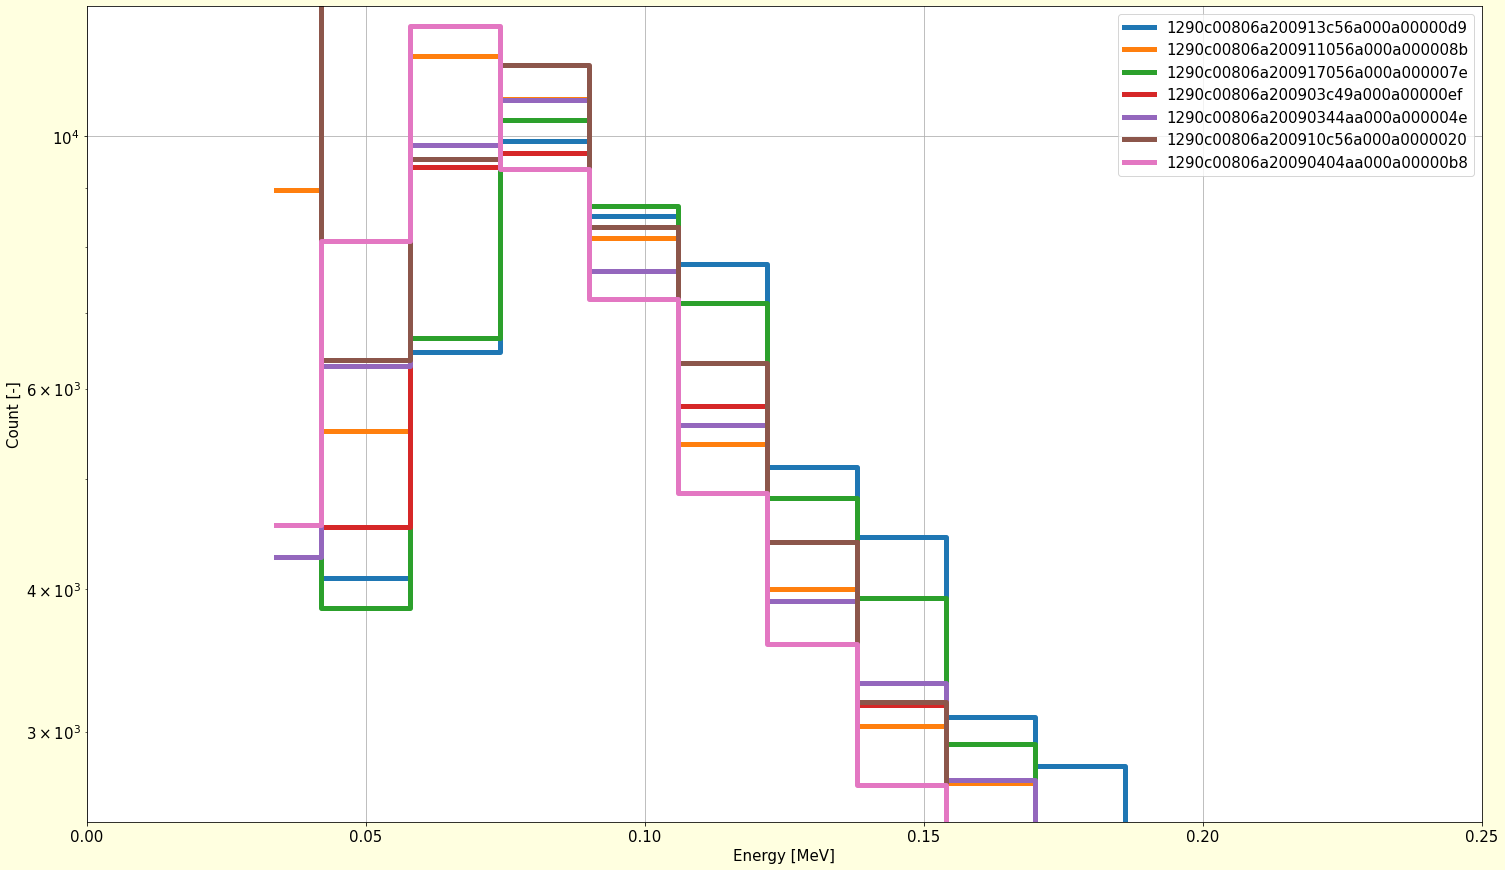

In [111]:
ftt = glob.iglob(fto+"/**/?.TXT") # generator, search immediate subdirectories 
#SWITCH_ON_TIMES = ['2023-04-22 13:15']

plt.figure(figsize=(25,15), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

for f in ftt:
    l=[]
    l.extend(range(0,505))

    df = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False)
    df = df.reset_index(drop=True)
    print(f)
    
    df[2] = df[2].apply(pd.to_numeric, errors='coerce')

    df['runtime'] = np.nan
    df.loc[df[0]=='$HIST','seconds'] = df.loc[df[0]=='$HIST',2]
    df.loc[df[0]=='$DOS','seconds'] = 0
    df['runtime'] = df['seconds'].diff() * -1
  
    #rc = df.copy()  
    rc = df.iloc[:df.loc[df[0]=='$DOS'][-1:].index[0]].copy()

    run = 0
    rc['run'] = np.nan

    try:
        for x in rc.loc[rc[0]=='$DOS'].index:
            rc.loc[x,'run'] = SWITCH_ON_TIMES[run]
            run += 1
    except:
        pass
    rc['run'].fillna(method="ffill", inplace=True)

    rc[2] = pd.to_numeric(rc[2])
    rc['time'] = pd.to_datetime(rc.run) + pd.to_timedelta(rc[2], unit='s')
    rc.set_index(rc['time'], drop=False, inplace=True)

    rc = rc.loc['2023-04-25 14:00':'2023-04-26 02:00']

    FIRST_CHANNEL = 8

    ener = rc.iloc[:,FIRST_CHANNEL:500].sum()

    coef3 = np.array([0.,0.])
    coef3[1] = 0.016
    coef3[0] = 0.034
    #0.034 MeV + ch * 0.016 MeV

    print (coef3[0], coef3[1])

    e3 = pd.DataFrame()
    e3['1'] = ener
    e3['i'] = ener.index
    e3['x'] = (e3['i'].astype(float)-FIRST_CHANNEL) * coef3[1] + coef3[0]

    plt.yscale('log')
    #plt.xscale('log')

    plt.plot(e3['x'], e3['1'] , label=str(df.loc[df[0]=='$DOS'][[6]].iloc[0,0]), drawstyle='steps-mid', linewidth=5)

plt.xlabel('Energy [MeV]')
plt.ylabel('Count [-]')
plt.grid()
plt.legend()


#plt.xticks(np.arange(0, 10, 1))
plt.xlim(0,0.25)
plt.ylim(2.5e3,1.3e4)
#plt.vlines(0.511,1,1e4, color='red')

None

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(0.0, 20.0)

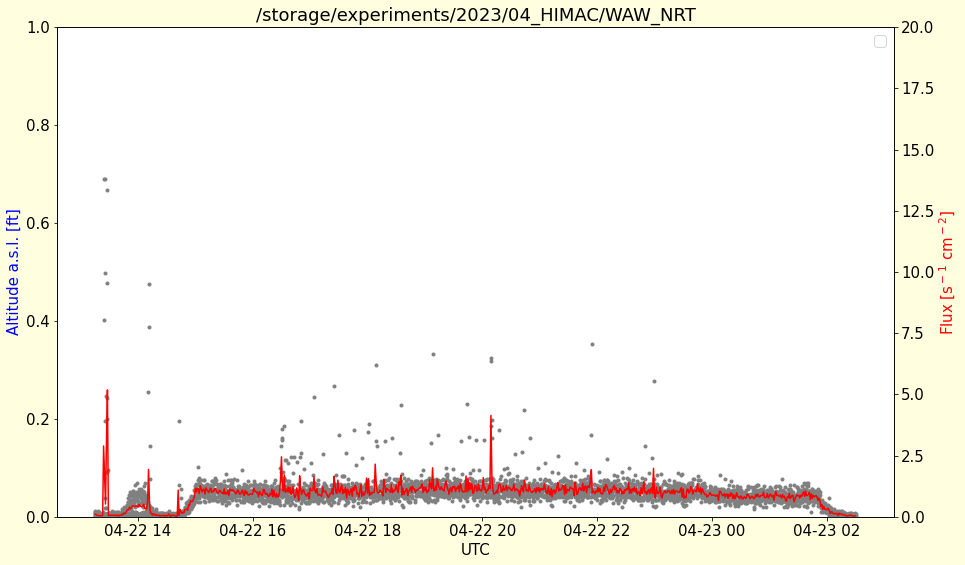

In [135]:
FIRST_CHANNEL = 9

plt.figure(figsize=(15,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})


#plt.plot(tele['Altitude'], label=str(rc.loc[rc[0]=='$DOS'][[6]].iloc[0,0]))
# Set limits of plot for magnification
#plt.xlim(pd.Timestamp('2019-09-03'),pd.Timestamp('2019-09-7'))
#plt.xlim(pd.Timestamp('2021-06-8'),pd.Timestamp('2021-06-12'))
#plt.xlim(pd.Timestamp('2021-10-8'),pd.Timestamp('2021-11-5')) # SWA last measurement
#plt.xlim(pd.Timestamp('2021-9-15'),pd.Timestamp('2021-9-28')) # SWB last measurement
plt.ylabel('Altitude a.s.l. [ft]', color='blue')
plt.xlabel('UTC')
plt.legend()
#rc = rc.iloc[3286:]

plt.twinx()

rc['sum'] = rc[range(FIRST_CHANNEL,500)].sum(axis=1)/10/2
#rc['sum'] = rc[range(FIRST_CHANNEL,500)].sum(axis=1)

rc['sum'].plot(marker='.', linestyle='', color='gray')
rcc = rc.resample('1T').mean()
rcc['sum'].plot(color='red')
plt.ylabel('Flux [s$^-$$^1$ cm$^-$$^2$]', color='red')
plt.title(fto)

plt.ylim([0,20]) 


In [32]:
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_rows', 400)

rc.loc['2023-04-22 20:40':'2023-04-22 20:50'].iloc[:,8:40]
None

/tmp/ipykernel_26111/3704047499.py:4: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  rc.loc['2023-04-22 20:40':'2023-04-22 20:50'].iloc[:,8:40]


# Liulin

In [345]:
filename = '/storage/experiments/2023/04_HIMAC/WAW_NRT/Liulin/2304220352_00.y16'
#filename = '/storage/experiments/2023/04_HIMAC/WAW_NRT/Liulin/2304220941_00.y15'
#filename = '/storage/experiments/2023/04_HIMAC/WAW_NRT/Liulin/2304220356_00.y10'
filename = '/storage/experiments/2023/04_HIMAC/WAW_NRT/Liulin/2304220945_00.y14'
filename = '/storage/experiments/2023/05_CERF/15052023/LIULIN/2305150921_01.y10'


# extract time
path = filename.split('/')
time = path[-1].split('_')
print (time)
date_object = datetime.datetime.strptime(time[0], '%y%m%d%H%M')
print (date_object)

# read data
liulin = pd.read_csv(filename, header = None, sep = ' ', skiprows = 1) # read Liulin data Y
liulin = liulin.drop(256, axis=1) # delete last empty column
infile = open(filename, 'r')
header = infile.readline()
print (header) # print data header
exposition = header.split(' ')[4].split('[')[0] # extract exposition time  
exposition_val = float(exposition)
exposition += 'S'
print (exposition)

# compute time series
#dates = pd.date_range(date_object, freq='5T', periods=len(liulin)).tolist()


['2305150921', '01.y10']
2023-05-15 09:21:00
MDU-10  EXPOSITION = 10[sec]

10S


In [346]:
time_offset = 0
liulin['time'] = date_object + pd.to_timedelta(liulin.index * exposition_val, unit='s') + pd.to_timedelta(time_offset, unit='min')
#rc['time'] = pd.to_datetime(rc.run) + pd.to_timedelta(rc[2], unit='s')
liulin_data = liulin
liulin.set_index('time', drop=False, inplace=True)

Text(0.5, 0, 'Time')

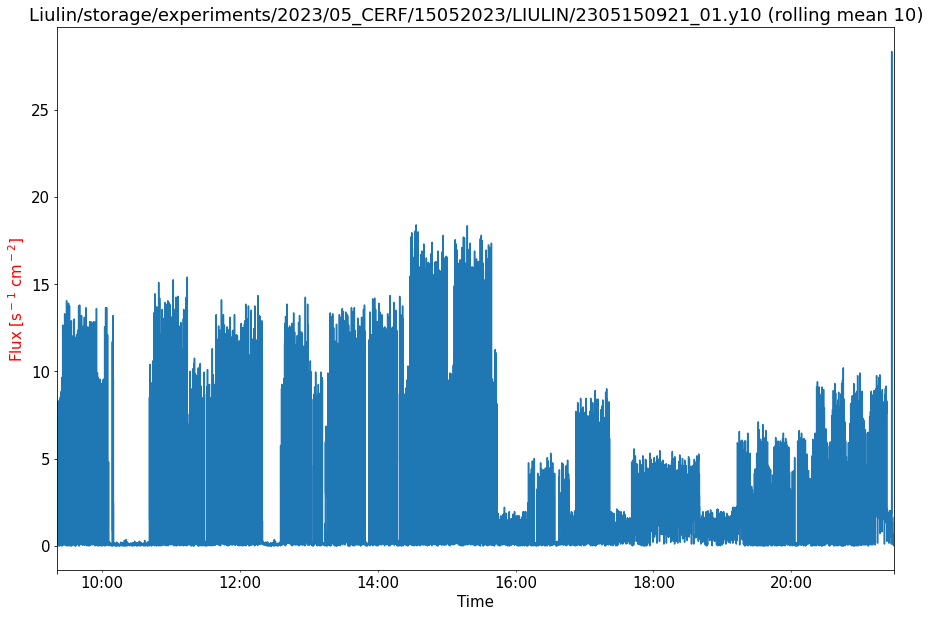

In [347]:
# index liulin data (compute time)
#liulin_data = pd.DataFrame(index = pd.date_range(date_object, freq=exposition, periods=len(liulin)).tolist(), data = liulin.as_matrix())
#liulin_data = pd.DataFrame(index = pd.date_range(date_object, freq=exposition, periods=len(liulin)).tolist(), data = liulin)
#liulin_data['flux'] = liulin_data[range(0,256)].sum(axis=1)
#liulin_data = liulin_data.loc['2018-08-02 17:00:00':'2018-08-03 13:00:00']
#ABSjets liulin_data = liulin_data.loc['2017-11-29 12:00:00':'2017-11-29 15:30:00']
#liulin_data = liulin_data#.loc['2023-04-22 13:15':'2023-04-23 13:15']

liulin_data['flux'] = liulin_data.iloc[:,0:255].sum(axis=1)/exposition_val/2

WINDOW = 10
#liulin_data['flux'] = liulin_data['flux'].rolling(WINDOW).mean()

#liulin_data
plt.figure(figsize=(15, 10))
matplotlib.rcParams.update({'font.size': 15})
liulin_data['flux'].plot(drawstyle='steps')
plt.title('Liulin' + filename + ' (rolling mean ' + str(WINDOW) + ')')
plt.ylabel('Flux [s$^-$$^1$ cm$^-$$^2$]', color='red')
plt.xlabel('Time')
#plt.ylim(0, 20)


0.1 0.05


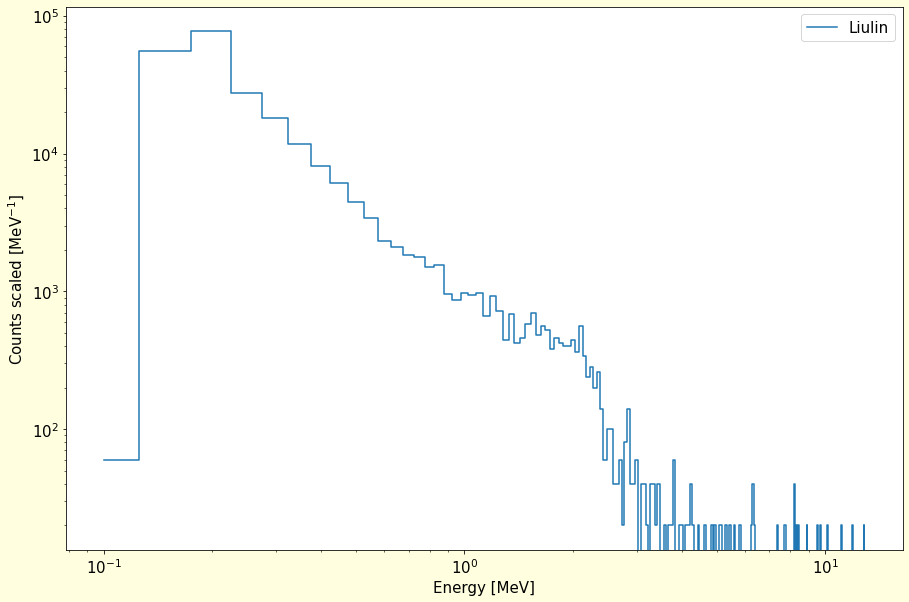

In [348]:
plt.figure(figsize=(15,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

liulin_data2 = liulin_data.loc['2023-05-15 21:00:00':'2023-05-15 22:00']

ener = liulin_data2.iloc[:,0:256].sum()

coef3 = np.array([0.,0.])
coef3[1] = 0.05
coef3[0] = 0.1
#coef3[0] = 0.600

print (coef3[0], coef3[1])

e3 = pd.DataFrame()
e3['1'] = ener
e3['i'] = ener.index
e3['x'] = (e3['i'].astype(float)) * coef3[1] + coef3[0]

plt.yscale('log')
plt.xscale('log')

plt.plot(e3['x'], e3['1'] / coef3[1], label='Liulin', drawstyle='steps-mid')
#plt.plot(e3['x'], e3['1'], label='Liulin', drawstyle='steps-mid')

plt.xlabel('Energy [MeV]')
plt.ylabel(r'Counts scaled [MeV$^{-1}$]')
#plt.grid()
plt.legend()


None

# Liulin + LABDOS 

NameError: name 'fto' is not defined

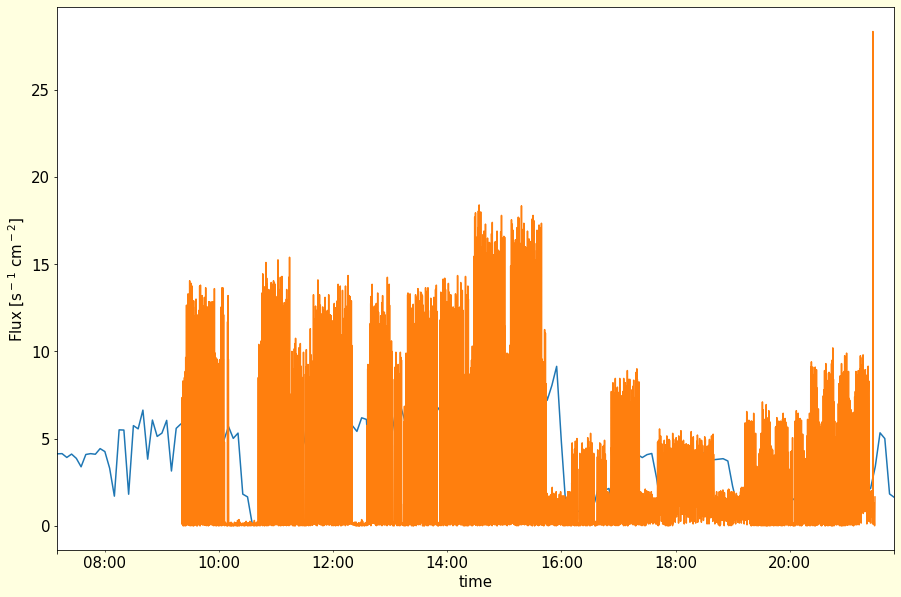

In [349]:
FIRST_CHANNEL = 9

plt.figure(figsize=(15,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})


rc['sum'] = rc[range(FIRST_CHANNEL,500)].sum(axis=1)/10/2
#rc['sum'] = rc[range(FIRST_CHANNEL,500)].sum(axis=1)

#rc['sum'].plot(marker='.', linestyle='', color='gray')
#(rc.iloc[:,FIRST_CHANNEL]/10/2).plot(color='sandybrown')
rcc = rc.resample('5T').mean()
(rcc['sum']*1.1).plot(label='LABDOS')

liulin_data['flux'].plot(label='Liulin')


plt.ylabel('Flux [s$^-$$^1$ cm$^-$$^2$]')
plt.title(fto)

plt.ylim([0,2])
plt.xlim('2023-04-22 14:25','2023-04-23 2:30')

plt.legend()





/tmp/ipykernel_20083/1514653053.py:4: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  rcc = rc.loc['2023-04-22 16:00':'2023-04-23 2:30'] # WAW-NRT


0.1 0.0164
0.1 0.05


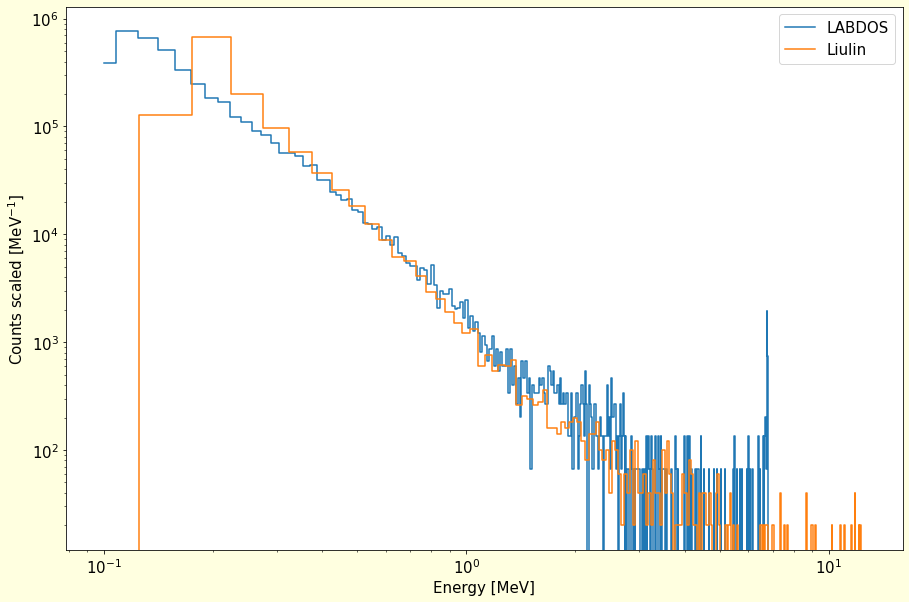

In [224]:
plt.figure(figsize=(15,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

rcc = rc.loc['2023-04-22 16:00':'2023-04-23 2:30'] # WAW-NRT

ener = rcc.iloc[:,FIRST_CHANNEL:500].sum()

coef3 = np.array([0.,0.])
coef3[1] = 0.0164
coef3[0] = 0.0547
coef3[0] = 0.1

print (coef3[0], coef3[1])

e3 = pd.DataFrame()
e3['1'] = ener
e3['i'] = ener.index
e3['x'] = (e3['i'].astype(float)-FIRST_CHANNEL) * coef3[1] + coef3[0]

plt.yscale('log')
#plt.xscale('log')

plt.plot(e3['x'], e3['1'] * 1.1 / coef3[1], label='LABDOS', drawstyle='steps-mid')


liulin_data2 = liulin_data.loc['2023-04-22 16:00':'2023-04-23 2:30'] # WAW-NRT

ener = liulin_data2.iloc[:,0:250].sum()

coef3 = np.array([0.,0.])
coef3[1] = 0.05
coef3[0] = 0.1
#coef3[0] = 0.600

print (coef3[0], coef3[1])

e3 = pd.DataFrame()
e3['1'] = ener
e3['i'] = ener.index
e3['x'] = (e3['i'].astype(float)) * coef3[1] + coef3[0]

plt.yscale('log')
plt.xscale('log')

plt.plot(e3['x'], e3['1'] / coef3[1], label='Liulin', drawstyle='steps-mid')

plt.xlabel('Energy [MeV]')
plt.ylabel(r'Counts scaled [MeV$^{-1}$]')
#plt.grid()
plt.legend()


None

In [ ]:
plt.figure(figsize=(20,5), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

ener = liulin_data.iloc[:,0:250].sum()

coef3 = np.array([0.,0.])
coef3[1] = 0.069
coef3[0] = 0.18
#coef3[1] = 0.03
#coef3[0] = 0.06

#(60 keV +-15 keV) + CH * 30 keV 
#0.034 MeV + ch * 0.016 MeV


print (coef3[0], coef3[1])

e3 = pd.DataFrame()
e3['1'] = ener
e3['i'] = ener.index
e3['x'] = (e3['i'].astype(float)-FIRST_CHANNEL) * coef3[1] + coef3[0]

plt.yscale('log')
#plt.xscale('log')

plt.plot(e3['x'], e3['1'] / coef3[1], label='Liulin', drawstyle='steps-mid')

plt.xlabel('Energy [MeV]')
plt.ylabel(r'Counts scaled [MeV$^{-1}$]')
plt.grid()
plt.legend()
#plt.xticks(np.arange(0, 10, 1))
#plt.xlim(0,2)
#plt.vlines(0.511,1,1e4, color='red')

None

# HIMAC preview

In [63]:
fto = '/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run1-3'
#fto = '/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run10'
#fto = '/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run17'
#fto = '/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run20'
#fto = '/storage/experiments/2023/04_labdos_BaCs/2nd'

#fto = '/storage/experiments/2023/05_CERF/PRG_GVA/LABDOS'


/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run1-3/B8/0.TXT
/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run1-3/20/0.TXT
/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run1-3/7E/0.TXT
/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run1-3/EF/0.TXT


Text(0.5, 0, 'UTC')

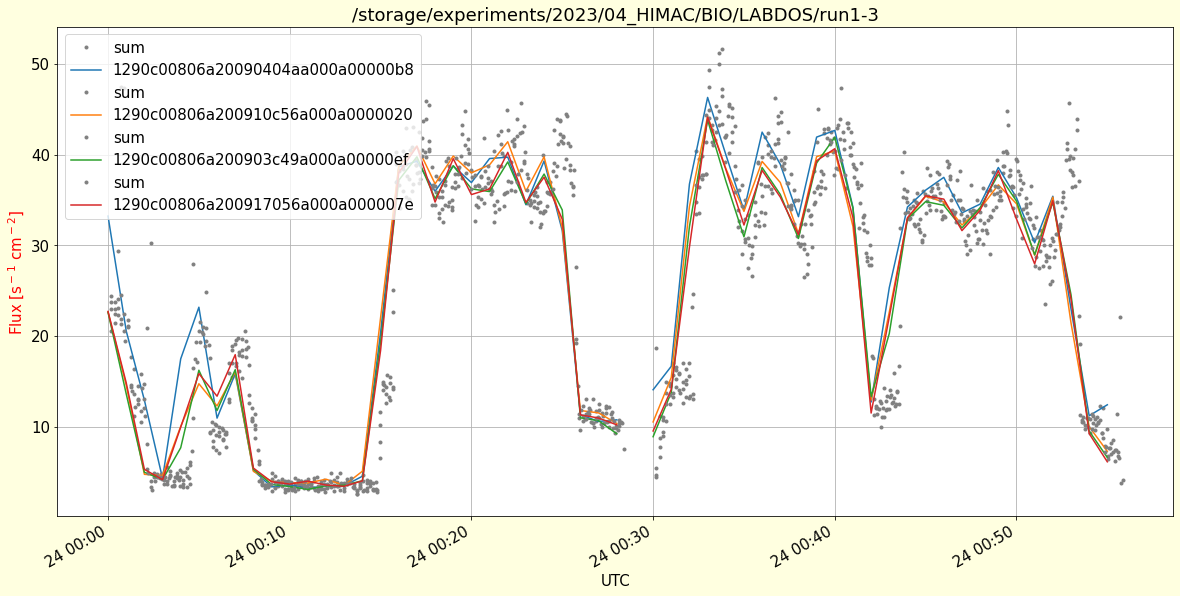

In [64]:
%matplotlib inline
ftt = glob.iglob(fto+"/**/*.TXT") # generator, search immediate subdirectories 
#ftt = glob.iglob(fto+"/*.TXT") # generator, search immediate subdirectories 
SWITCH_ON_TIMES = ['2023-04-24 0:0','2023-04-24 00:30','2023-04-25 0:0']
#SWITCH_ON_TIMES = ['2023-04-24 0:0','2023-04-24 00:0','2023-04-24 0:0']

plt.figure(figsize=(20,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

for f in ftt:
    l=[]
    l.extend(range(0,505))

    df = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False)
    df = df.reset_index(drop=True)
    print(f)
    
    df[2] = df[2].apply(pd.to_numeric, errors='coerce')

    df['runtime'] = np.nan
    df.loc[df[0]=='$HIST','seconds'] = df.loc[df[0]=='$HIST',2]
    df.loc[df[0]=='$DOS','seconds'] = 0
    df['runtime'] = df['seconds'].diff() * -1
    
    rc = df.iloc[ df.loc[df[0]=='$DOS'].index[1]:].copy()

    run = 0
    rc['run'] = np.nan

    try:
        for x in rc.loc[rc[0]=='$DOS'].index:
            rc.loc[x,'run'] = SWITCH_ON_TIMES[run]
            run += 1
    except:
        pass
    rc['run'].fillna(method="ffill", inplace=True)

    rc[2] = pd.to_numeric(rc[2])
    rc['time'] = pd.to_datetime(rc.run) + pd.to_timedelta(rc[2], unit='s')
    rc.set_index(rc['time'], drop=False, inplace=True)
    
    FIRST_CHANNEL = 9

    rc['sum'] = rc[range(FIRST_CHANNEL,500)].sum(axis=1)/10/2

    rc['sum'].plot(marker='.', linestyle='', color='gray')
    rcc = rc.resample('1T').mean()
    rcc['sum'].plot(label=str(rc.loc[rc[0]=='$DOS'][[6]].iloc[0,0]))

    #plt.ylim([0,1.6]) 

plt.ylabel('Flux [s$^-$$^1$ cm$^-$$^2$]', color='red')
plt.title(fto)
plt.legend()
plt.grid()
plt.xlabel('UTC')
  
#plt.twinx()

#tele['Altitude'].plot(label='Altitude')
#plt.ylabel('Altitude a.s.l. [ft]', color='blue')


/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run1-3/B8/0.TXT
/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run1-3/20/0.TXT
/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run1-3/7E/0.TXT


/tmp/ipykernel_359/2354378267.py:39: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  rc = rc.loc['2023-04-24 02:15:00':'2023-04-24 03:00:00']
/tmp/ipykernel_359/2354378267.py:39: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  rc = rc.loc['2023-04-24 02:15:00':'2023-04-24 03:00:00']
/tmp/ipykernel_359/2354378267.py:39: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  rc = rc.loc['2023-04-24 02:15:00':'2023-04-24 03:00:00']


/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run1-3/EF/0.TXT


/tmp/ipykernel_359/2354378267.py:39: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  rc = rc.loc['2023-04-24 02:15:00':'2023-04-24 03:00:00']


Text(0.5, 0, 'UTC')

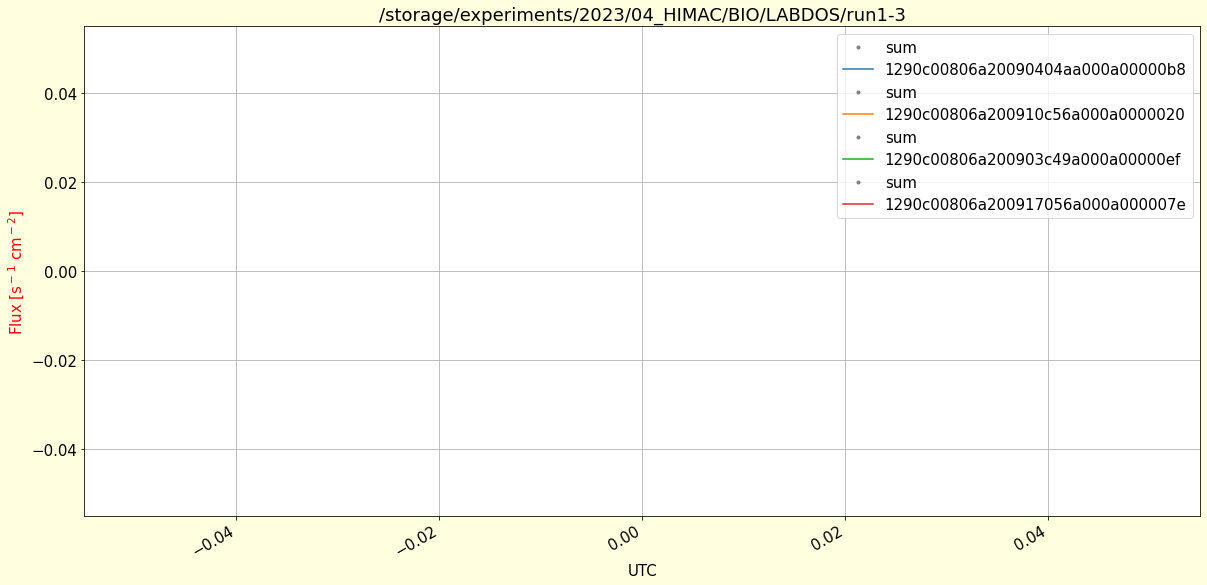

In [65]:
ftt = glob.iglob(fto+"/**/*.TXT") # generator, search immediate subdirectories 
#ftt = glob.iglob(fto+"/*.TXT") # generator, search immediate subdirectories 
SWITCH_ON_TIMES = ['2023-04-24 0:0']

plt.figure(figsize=(20,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

for f in ftt:
    l=[]
    l.extend(range(0,505))

    df = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False)
    df = df.reset_index(drop=True)
    print(f)
    
    df[2] = df[2].apply(pd.to_numeric, errors='coerce')

    df['runtime'] = np.nan
    df.loc[df[0]=='$HIST','seconds'] = df.loc[df[0]=='$HIST',2]
    df.loc[df[0]=='$DOS','seconds'] = 0
    df['runtime'] = df['seconds'].diff() * -1
    
    rc = df.iloc[ df.loc[df[0]=='$DOS'].index[1]:].copy()

    run = 0
    rc['run'] = np.nan

    try:
        for x in rc.loc[rc[0]=='$DOS'].index:
            rc.loc[x,'run'] = SWITCH_ON_TIMES[run]
            run += 1
    except:
        pass
    rc['run'].fillna(method="ffill", inplace=True)

    rc[2] = pd.to_numeric(rc[2])
    rc['time'] = pd.to_datetime(rc.run) + pd.to_timedelta(rc[2], unit='s')
    rc.set_index(rc['time'], drop=False, inplace=True)
    rc = rc.loc['2023-04-24 02:15:00':'2023-04-24 03:00:00']
    
    FIRST_CHANNEL = 9

    rc['sum'] = rc[range(FIRST_CHANNEL,500)].sum(axis=1)/10/2

    rc['sum'].plot(marker='.', linestyle='', color='gray')
    rcc = rc.resample('1T').mean()
    rcc['sum'].plot(label=str(df.loc[df[0]=='$DOS'][[6]].iloc[0,0]))

    #plt.ylim([0,1.6]) 

plt.ylabel('Flux [s$^-$$^1$ cm$^-$$^2$]', color='red')
plt.title(fto)
plt.legend()
plt.grid()
plt.xlabel('UTC')
  
#plt.twinx()

#tele['Altitude'].plot(label='Altitude')
#plt.ylabel('Altitude a.s.l. [ft]', color='blue')


/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run13/LABDOS_20230424_191332.log


Text(0.5, 0, 'UTC')

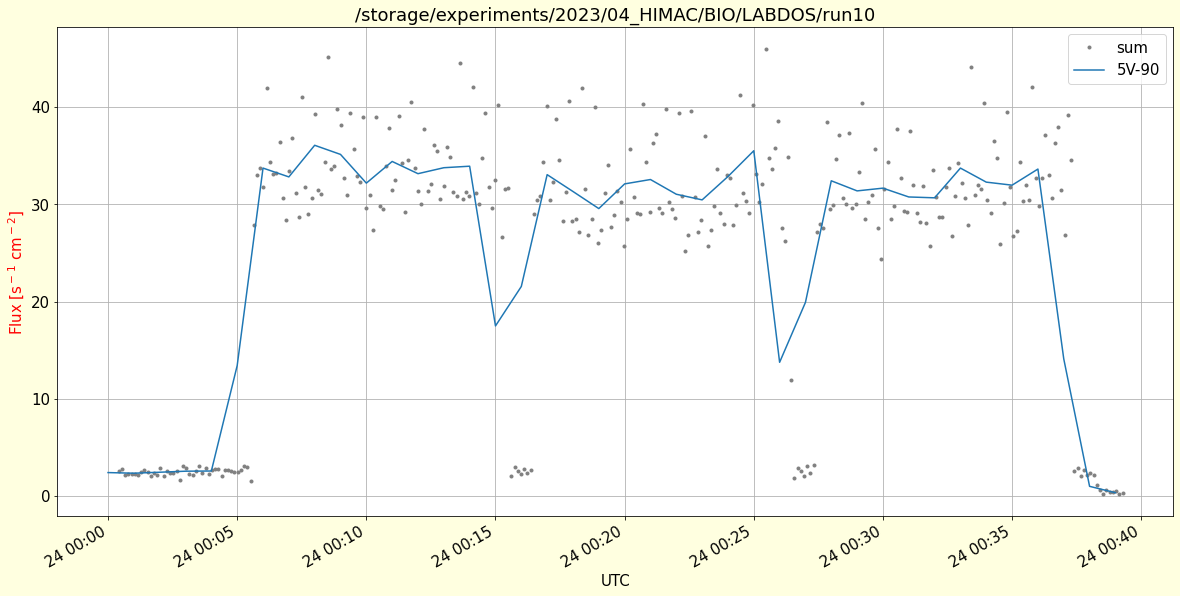

In [245]:
f = '/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run13/LABDOS_20230422_191414.log'
f = '/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run13/LABDOS_20230422_195219.log'
f = '/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run13/LABDOS_20230422_195702.log'
f = '/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run13/LABDOS_20230424_191332.log'

SWITCH_ON_TIMES = ['2023-04-24 0:0']

plt.figure(figsize=(20,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

l=[]
l.extend(range(0,506))

df = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False)
df = df.reset_index(drop=True)
df = df.shift(-1,axis=1)
df = df.shift(-1)
print(f)

df[2] = df[2].apply(pd.to_numeric, errors='coerce')

df['runtime'] = np.nan
df.loc[df[0]=='$HIST','seconds'] = df.loc[df[0]=='$HIST',2]
df.loc[df[0]=='$DOS','seconds'] = 0
df['runtime'] = df['seconds'].diff() * -1

rc = df.copy()

run = 0
#rc['run'] = np.nan

rc['run'] = SWITCH_ON_TIMES[0]
#rc['run'].fillna(method="ffill", inplace=True)

rc[2] = pd.to_numeric(rc[2])
rc['time'] = pd.to_datetime(rc.run) + pd.to_timedelta(rc[2], unit='s')
rc.set_index(rc['time'], drop=False, inplace=True)
#rc = rc.loc['2023-04-24 00:05:00':'2023-04-24 00:35:00']

FIRST_CHANNEL = 9

rc['sum'] = rc[range(FIRST_CHANNEL,500)].sum(axis=1)/10/2

rc['sum'].plot(marker='.', linestyle='', color='gray')
rcc = rc.resample('1T').mean()
rcc['sum'].plot(label='5V-90')

#plt.ylim([0,1.6]) 

plt.ylabel('Flux [s$^-$$^1$ cm$^-$$^2$]', color='red')
plt.title(fto)
plt.legend()
plt.grid()
plt.xlabel('UTC')


In [12]:
%matplotlib widget
f = '/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run13/LABDOS_20230424_191332.log'
SWITCH_ON_TIMES = ['2023-04-24 00:00']

plt.figure(figsize=(25,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

l=[]
l.extend(range(0,506))

df = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False)
df = df.reset_index(drop=True)
df = df.shift(-1,axis=1)
df = df.shift(-1)
print(f)

df[2] = df[2].apply(pd.to_numeric, errors='coerce')

df['runtime'] = np.nan
df.loc[df[0]=='$HIST','seconds'] = df.loc[df[0]=='$HIST',2]
df.loc[df[0]=='$DOS','seconds'] = 0
df['runtime'] = df['seconds'].diff() * -1
rc = df.copy()

run = 0
rc['run'] = np.nan

try:
    for x in rc.loc[rc[0]=='$DOS'].index:
        rc.loc[x,'run'] = SWITCH_ON_TIMES[run]
        run += 1
except:
    pass
rc['run'].fillna(method="ffill", inplace=True)

rc[2] = pd.to_numeric(rc[2])
rc['time'] = pd.to_datetime(rc.run) + pd.to_timedelta(rc[2], unit='s')
rc.set_index(rc['time'], drop=False, inplace=True)


FIRST_CHANNEL = 9

ener = rc.iloc[:,FIRST_CHANNEL:505].sum()
#ener = rc.loc['2023-04-24 00:10:00':'2023-04-24 00:25:00'].iloc[:,FIRST_CHANNEL:500].sum()
#ener = rc.loc['2023-04-24 00:29:00':'2023-04-24 00:43:00'].iloc[:,FIRST_CHANNEL:500].sum()
#ener = rc.loc['2023-04-24 01:00:00':'2023-04-24 01:25:00'].iloc[:,FIRST_CHANNEL:500].sum()

#ener = rc.loc['2023-04-24 00:50:00':'2023-04-24 01:10:00'].iloc[:,FIRST_CHANNEL:500].sum()
#ener = rc.loc['2023-04-24 00:25:00':'2023-04-24 00:40:00'].iloc[:,FIRST_CHANNEL:500].sum()

coef3 = np.array([0.,0.])
coef3[1] = 0.016
coef3[0] = 0.034
#0.034 MeV + ch * 0.016 MeV

print (coef3[0], coef3[1])

e3 = pd.DataFrame()
e3['1'] = ener
e3['i'] = ener.index
e3['x'] = (e3['i'].astype(float)-FIRST_CHANNEL) * coef3[1] + coef3[0]

plt.yscale('log')
#plt.xscale('log')

plt.plot(e3['x'], e3['1'] , label='5V-90', drawstyle='steps-mid', lw=3)

plt.xlabel('Energy [MeV]')
plt.ylabel('Count [-]')
plt.grid()
plt.legend()


#plt.xticks(np.arange(0, 10, 1))
#plt.xlim(0,2)
#plt.vlines(0.511,1,1e4, color='red')

None

<IPython.core.display.Javascript object>

/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run13/LABDOS_20230424_191332.log
0.034 0.016


/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run1-3/B8/0.TXT
0.034 0.016
/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run1-3/20/0.TXT
0.034 0.016
/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run1-3/7E/0.TXT
0.034 0.016
/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run1-3/EF/0.TXT
0.034 0.016
/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run10/4E/0.TXT
0.034 0.016
/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run10/8B/0.TXT
0.034 0.016


/tmp/ipykernel_359/3386662275.py:98: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  rc = rc.loc['2023-04-24 02:15:00':'2023-04-24 02:47:00']
/tmp/ipykernel_359/3386662275.py:98: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  rc = rc.loc['2023-04-24 02:15:00':'2023-04-24 02:47:00']
/tmp/ipykernel_359/3386662275.py:98: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  rc = rc.loc['2023-04-24 02:15:00':'2023-04-24 02:47:00']


/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run10/D9/0.TXT
0.034 0.016
/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run13/LABDOS_20230424_191332.log
0.034 0.016
/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run17/LABDOS_7E/0.TXT
0.034 0.016
/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run17/LABDOS_EF/0.TXT
0.034 0.016


/tmp/ipykernel_359/3386662275.py:146: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  rc = rc.loc['2023-04-24 00:05:00':'2023-04-24 00:35:00']


/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run17/LABDOS_B8/0.TXT
0.034 0.016
/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run17/LABDOS_20/0.TXT
0.034 0.016
/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run20/LABDOS_20/0.TXT
0.034 0.016
/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run20/LABDOS_B8/0.TXT
0.034 0.016
/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run20/LABDOS_EF/0.TXT
0.034 0.016
/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run20/LABDOS_7E/0.TXT
0.034 0.016


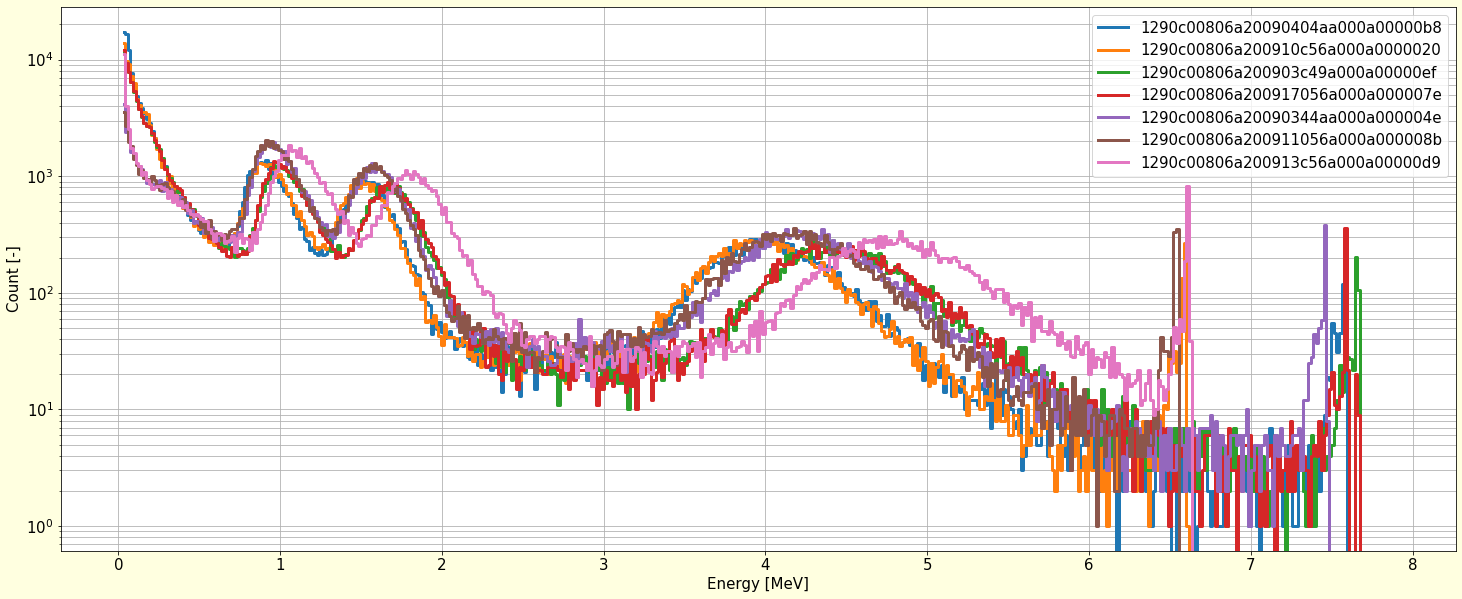

In [74]:
# 4
fto = '/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run1-3'
ftt = glob.iglob(fto+"/**/*.TXT") # generator, search immediate subdirectories 
SWITCH_ON_TIMES = ['2023-04-24 0:0','2023-04-24 00:30','2023-04-25 0:0']

plt.figure(figsize=(25,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

for f in ftt:
    l=[]
    l.extend(range(0,505))

    df = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False)
    df = df.reset_index(drop=True)
    print(f)
    
    df[2] = df[2].apply(pd.to_numeric, errors='coerce')

    df['runtime'] = np.nan
    df.loc[df[0]=='$HIST','seconds'] = df.loc[df[0]=='$HIST',2]
    df.loc[df[0]=='$DOS','seconds'] = 0
    df['runtime'] = df['seconds'].diff() * -1
    rc = df

    run = 0
    rc['run'] = np.nan

    try:
        for x in rc.loc[rc[0]=='$DOS'].index:
            rc.loc[x,'run'] = SWITCH_ON_TIMES[run]
            run += 1
    except:
        pass
    rc['run'].fillna(method="ffill", inplace=True)

    rc[2] = pd.to_numeric(rc[2])
    rc['time'] = pd.to_datetime(rc.run) + pd.to_timedelta(rc[2], unit='s')
    rc.set_index(rc['time'], drop=False, inplace=True)
    #rc = rc.loc['2023-04-24 00:15:00':'2023-04-24 02:00:00']
    
    FIRST_CHANNEL = 9

    ener = rc.iloc[:,FIRST_CHANNEL:500].sum()

    coef3 = np.array([0.,0.])
    coef3[1] = 0.016
    coef3[0] = 0.034
    #0.034 MeV + ch * 0.016 MeV

    print (coef3[0], coef3[1])

    e3 = pd.DataFrame()
    e3['1'] = ener
    e3['i'] = ener.index
    e3['x'] = (e3['i'].astype(float)-FIRST_CHANNEL) * coef3[1] + coef3[0]

    plt.plot(e3['x'], e3['1'] , label=str(df.loc[df[0]=='$DOS'][[6]].iloc[0,0]), drawstyle='steps-mid', lw=3)


#----------------------------------------------------------------------------------------------------------------------
# 3
fto = '/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run10'

ftt = glob.iglob(fto+"/**/*.TXT") # generator, search immediate subdirectories 
SWITCH_ON_TIMES = ['2023-04-24 0:0','2023-04-24 00:0','2023-04-24 0:0']


for f in ftt:
    l=[]
    l.extend(range(0,505))

    df = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False)
    df = df.reset_index(drop=True)
    print(f)
    
    df[2] = df[2].apply(pd.to_numeric, errors='coerce')

    df['runtime'] = np.nan
    df.loc[df[0]=='$HIST','seconds'] = df.loc[df[0]=='$HIST',2]
    df.loc[df[0]=='$DOS','seconds'] = 0
    df['runtime'] = df['seconds'].diff() * -1
    rc = df

    run = 0
    rc['run'] = np.nan

    try:
        for x in rc.loc[rc[0]=='$DOS'].index:
            rc.loc[x,'run'] = SWITCH_ON_TIMES[run]
            run += 1
    except:
        pass
    rc['run'].fillna(method="ffill", inplace=True)

    rc[2] = pd.to_numeric(rc[2])
    rc['time'] = pd.to_datetime(rc.run) + pd.to_timedelta(rc[2], unit='s')
    rc.set_index(rc['time'], drop=False, inplace=True)
    rc = rc.loc['2023-04-24 02:15:00':'2023-04-24 02:47:00']
    
    FIRST_CHANNEL = 9

    ener = rc.iloc[:,FIRST_CHANNEL:500].sum()

    coef3 = np.array([0.,0.])
    coef3[1] = 0.016
    coef3[0] = 0.034
    #0.034 MeV + ch * 0.016 MeV

    print (coef3[0], coef3[1])

    e3 = pd.DataFrame()
    e3['1'] = ener
    e3['i'] = ener.index
    e3['x'] = (e3['i'].astype(float)-FIRST_CHANNEL) * coef3[1] + coef3[0]


    plt.plot(e3['x'], e3['1'] , label=str(df.loc[df[0]=='$DOS'][[6]].iloc[0,0]), drawstyle='steps-mid', lw=3)

#------------------------------------------------------------------------------
# 5V s krabickou
f = '/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run13/LABDOS_20230424_191332.log'
SWITCH_ON_TIMES = ['2023-04-24 00:00']

l=[]
l.extend(range(0,506))

df = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False)
df = df.reset_index(drop=True)
df = df.shift(-1,axis=1)
df = df.shift(-1)
print(f)

df[2] = df[2].apply(pd.to_numeric, errors='coerce')

df['runtime'] = np.nan
df.loc[df[0]=='$HIST','seconds'] = df.loc[df[0]=='$HIST',2]
df.loc[df[0]=='$DOS','seconds'] = 0
df['runtime'] = df['seconds'].diff() * -1
rc = df

rc['run'] = SWITCH_ON_TIMES[0]

rc[2] = pd.to_numeric(rc[2])
rc['time'] = pd.to_datetime(rc.run) + pd.to_timedelta(rc[2], unit='s')
rc.set_index(rc['time'], drop=False, inplace=True)
rc = rc.loc['2023-04-24 00:05:00':'2023-04-24 00:35:00']

FIRST_CHANNEL = 9

ener = rc.iloc[:,FIRST_CHANNEL:505].sum()

coef3 = np.array([0.,0.])
coef3[1] = 0.016
coef3[0] = 0.034
#0.034 MeV + ch * 0.016 MeV

print (coef3[0], coef3[1])

e3 = pd.DataFrame()
e3['1'] = ener
e3['i'] = ener.index
e3['x'] = (e3['i'].astype(float)-FIRST_CHANNEL) * coef3[1] + coef3[0]

####plt.plot(e3['x'], e3['1'] , label='5V-90', drawstyle='steps-mid', lw=3)


#----------------------------------------------------------------------------------------------------------------------
fto = '/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run17' # 4 s vicky

ftt = glob.iglob(fto+"/**/*.TXT") # generator, search immediate subdirectories 
SWITCH_ON_TIMES = ['2023-04-24 0:0','2023-04-24 00:0','2023-04-24 0:0']


for f in ftt:
    l=[]
    l.extend(range(0,505))

    df = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False)
    df = df.reset_index(drop=True)
    print(f)
    
    df[2] = df[2].apply(pd.to_numeric, errors='coerce')

    df['runtime'] = np.nan
    df.loc[df[0]=='$HIST','seconds'] = df.loc[df[0]=='$HIST',2]
    df.loc[df[0]=='$DOS','seconds'] = 0
    df['runtime'] = df['seconds'].diff() * -1
    rc = df

    run = 0
    rc['run'] = np.nan

    try:
        for x in rc.loc[rc[0]=='$DOS'].index:
            rc.loc[x,'run'] = SWITCH_ON_TIMES[run]
            run += 1
    except:
        pass
    rc['run'].fillna(method="ffill", inplace=True)

    rc[2] = pd.to_numeric(rc[2])
    rc['time'] = pd.to_datetime(rc.run) + pd.to_timedelta(rc[2], unit='s')
    rc.set_index(rc['time'], drop=False, inplace=True)
    #rc = rc.loc['2023-04-24 02:15:00':'2023-04-24 02:47:00']
    
    FIRST_CHANNEL = 9

    ener = rc.iloc[:,FIRST_CHANNEL:500].sum()

    coef3 = np.array([0.,0.])
    coef3[1] = 0.016
    coef3[0] = 0.034
    #0.034 MeV + ch * 0.016 MeV

    print (coef3[0], coef3[1])

    e3 = pd.DataFrame()
    e3['1'] = ener
    e3['i'] = ener.index
    e3['x'] = (e3['i'].astype(float)-FIRST_CHANNEL) * coef3[1] + coef3[0]


    ####plt.plot(e3['x'], e3['1'] , label=str(df.loc[df[0]=='$DOS'][[6]].iloc[0,0])+' vicka', drawstyle='steps-mid', lw=3)

#----------------------------------------------------------------------------------------------------------------------
fto = '/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run20' # 4 opacne

ftt = glob.iglob(fto+"/**/*.TXT") # generator, search immediate subdirectories 
SWITCH_ON_TIMES = ['2023-04-24 0:0','2023-04-24 00:0','2023-04-24 0:0']


for f in ftt:
    l=[]
    l.extend(range(0,505))

    df = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False)
    df = df.reset_index(drop=True)
    print(f)
    
    df[2] = df[2].apply(pd.to_numeric, errors='coerce')

    df['runtime'] = np.nan
    df.loc[df[0]=='$HIST','seconds'] = df.loc[df[0]=='$HIST',2]
    df.loc[df[0]=='$DOS','seconds'] = 0
    df['runtime'] = df['seconds'].diff() * -1
    rc = df

    run = 0
    rc['run'] = np.nan

    try:
        for x in rc.loc[rc[0]=='$DOS'].index:
            rc.loc[x,'run'] = SWITCH_ON_TIMES[run]
            run += 1
    except:
        pass
    rc['run'].fillna(method="ffill", inplace=True)

    rc[2] = pd.to_numeric(rc[2])
    rc['time'] = pd.to_datetime(rc.run) + pd.to_timedelta(rc[2], unit='s')
    rc.set_index(rc['time'], drop=False, inplace=True)
    #rc = rc.loc['2023-04-24 02:15:00':'2023-04-24 02:47:00']
    
    FIRST_CHANNEL = 9

    ener = rc.iloc[:,FIRST_CHANNEL:500].sum()

    coef3 = np.array([0.,0.])
    coef3[1] = 0.016
    coef3[0] = 0.034
    #0.034 MeV + ch * 0.016 MeV

    print (coef3[0], coef3[1])

    e3 = pd.DataFrame()
    e3['1'] = ener
    e3['i'] = ener.index
    e3['x'] = (e3['i'].astype(float)-FIRST_CHANNEL) * coef3[1] + coef3[0]


    ###plt.plot(e3['x'], e3['1'] , label=str(df.loc[df[0]=='$DOS'][[6]].iloc[0,0])+' opacne', drawstyle='steps-mid', lw=3)






plt.grid(which='minor')
plt.yscale('log')
#plt.xscale('log')
#plt.xlim(0,3)
plt.grid(which='minor')
plt.xlabel('Energy [MeV]')
plt.ylabel('Count [-]')
plt.legend()
plt.grid(which='both')


/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run1-3/B8/0.TXT
0.034 0.016
/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run1-3/20/0.TXT
0.034 0.016
/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run1-3/7E/0.TXT
0.034 0.016
/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run1-3/EF/0.TXT
0.034 0.016
/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run10/4E/0.TXT
0.034 0.016
/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run10/8B/0.TXT
0.034 0.016


/tmp/ipykernel_26111/3986874092.py:98: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  rc = rc.loc['2023-04-24 02:15:00':'2023-04-24 02:47:00']
/tmp/ipykernel_26111/3986874092.py:98: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  rc = rc.loc['2023-04-24 02:15:00':'2023-04-24 02:47:00']
/tmp/ipykernel_26111/3986874092.py:98: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  rc = rc.loc['2023-04-24 02:15:00':'2023-04-24 02:47:00']


/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run10/D9/0.TXT
0.034 0.016
/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run13/LABDOS_20230424_191332.log
0.034 0.016
/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run17/LABDOS_7E/0.TXT
0.034 0.016
/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run17/LABDOS_EF/0.TXT
0.034 0.016
/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run17/LABDOS_B8/0.TXT


/tmp/ipykernel_26111/3986874092.py:146: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  rc = rc.loc['2023-04-24 00:05:00':'2023-04-24 00:35:00']


0.034 0.016
/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run17/LABDOS_20/0.TXT
0.034 0.016
/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run20/LABDOS_20/0.TXT
0.034 0.016
/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run20/LABDOS_B8/0.TXT
0.034 0.016
/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run20/LABDOS_EF/0.TXT
0.034 0.016
/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run20/LABDOS_7E/0.TXT
0.034 0.016


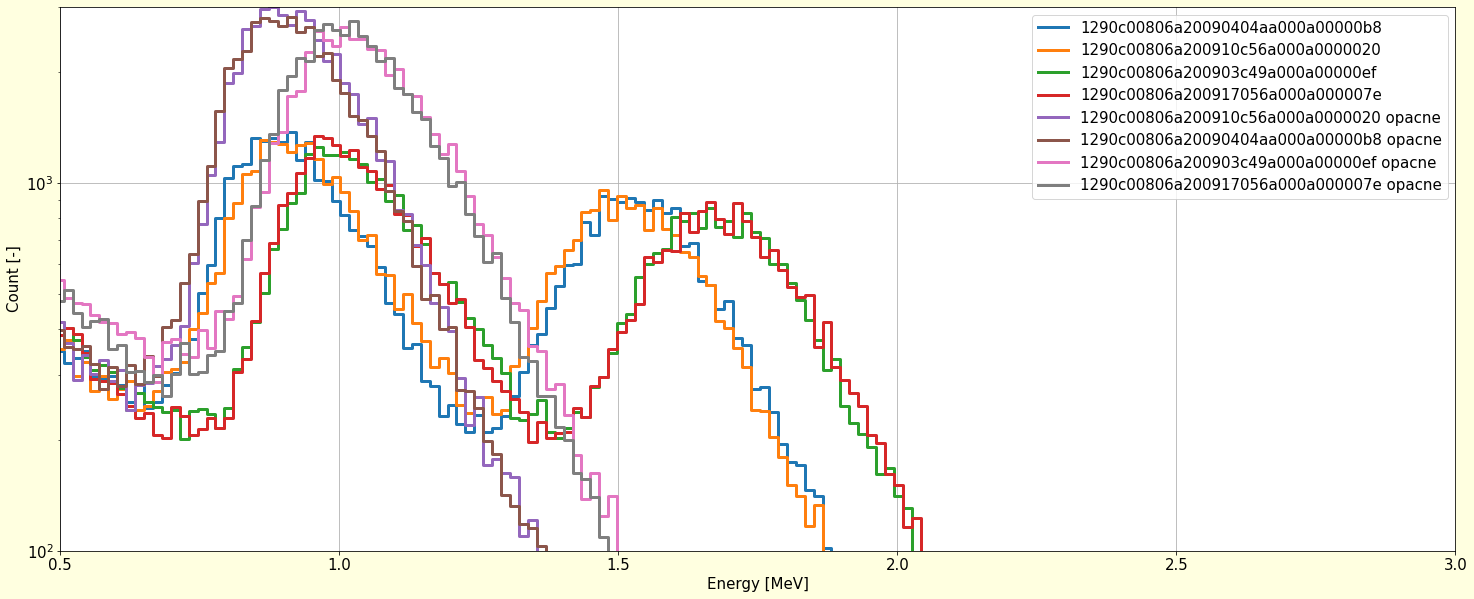

In [279]:
# 4
fto = '/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run1-3'
ftt = glob.iglob(fto+"/**/*.TXT") # generator, search immediate subdirectories 
SWITCH_ON_TIMES = ['2023-04-24 0:0','2023-04-24 00:30','2023-04-25 0:0']

plt.figure(figsize=(25,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

for f in ftt:
    l=[]
    l.extend(range(0,505))

    df = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False)
    df = df.reset_index(drop=True)
    print(f)
    
    df[2] = df[2].apply(pd.to_numeric, errors='coerce')

    df['runtime'] = np.nan
    df.loc[df[0]=='$HIST','seconds'] = df.loc[df[0]=='$HIST',2]
    df.loc[df[0]=='$DOS','seconds'] = 0
    df['runtime'] = df['seconds'].diff() * -1
    rc = df

    run = 0
    rc['run'] = np.nan

    try:
        for x in rc.loc[rc[0]=='$DOS'].index:
            rc.loc[x,'run'] = SWITCH_ON_TIMES[run]
            run += 1
    except:
        pass
    rc['run'].fillna(method="ffill", inplace=True)

    rc[2] = pd.to_numeric(rc[2])
    rc['time'] = pd.to_datetime(rc.run) + pd.to_timedelta(rc[2], unit='s')
    rc.set_index(rc['time'], drop=False, inplace=True)
    #rc = rc.loc['2023-04-24 00:15:00':'2023-04-24 02:00:00']
    
    FIRST_CHANNEL = 9

    ener = rc.iloc[:,FIRST_CHANNEL:500].sum()

    coef3 = np.array([0.,0.])
    coef3[1] = 0.016
    coef3[0] = 0.034
    #0.034 MeV + ch * 0.016 MeV

    print (coef3[0], coef3[1])

    e3 = pd.DataFrame()
    e3['1'] = ener
    e3['i'] = ener.index
    e3['x'] = (e3['i'].astype(float)-FIRST_CHANNEL) * coef3[1] + coef3[0]

    plt.plot(e3['x'], e3['1'] , label=str(df.loc[df[0]=='$DOS'][[6]].iloc[0,0]), drawstyle='steps-mid', lw=3)


#----------------------------------------------------------------------------------------------------------------------
# 3
fto = '/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run10'

ftt = glob.iglob(fto+"/**/*.TXT") # generator, search immediate subdirectories 
SWITCH_ON_TIMES = ['2023-04-24 0:0','2023-04-24 00:0','2023-04-24 0:0']


for f in ftt:
    l=[]
    l.extend(range(0,505))

    df = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False)
    df = df.reset_index(drop=True)
    print(f)
    
    df[2] = df[2].apply(pd.to_numeric, errors='coerce')

    df['runtime'] = np.nan
    df.loc[df[0]=='$HIST','seconds'] = df.loc[df[0]=='$HIST',2]
    df.loc[df[0]=='$DOS','seconds'] = 0
    df['runtime'] = df['seconds'].diff() * -1
    rc = df

    run = 0
    rc['run'] = np.nan

    try:
        for x in rc.loc[rc[0]=='$DOS'].index:
            rc.loc[x,'run'] = SWITCH_ON_TIMES[run]
            run += 1
    except:
        pass
    rc['run'].fillna(method="ffill", inplace=True)

    rc[2] = pd.to_numeric(rc[2])
    rc['time'] = pd.to_datetime(rc.run) + pd.to_timedelta(rc[2], unit='s')
    rc.set_index(rc['time'], drop=False, inplace=True)
    rc = rc.loc['2023-04-24 02:15:00':'2023-04-24 02:47:00']
    
    FIRST_CHANNEL = 9

    ener = rc.iloc[:,FIRST_CHANNEL:500].sum()

    coef3 = np.array([0.,0.])
    coef3[1] = 0.016
    coef3[0] = 0.034
    #0.034 MeV + ch * 0.016 MeV

    print (coef3[0], coef3[1])

    e3 = pd.DataFrame()
    e3['1'] = ener
    e3['i'] = ener.index
    e3['x'] = (e3['i'].astype(float)-FIRST_CHANNEL) * coef3[1] + coef3[0]


    ###plt.plot(e3['x'], e3['1'] , label=str(df.loc[df[0]=='$DOS'][[6]].iloc[0,0]), drawstyle='steps-mid', lw=3)

#------------------------------------------------------------------------------
# 5V s krabickou
f = '/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run13/LABDOS_20230424_191332.log'
SWITCH_ON_TIMES = ['2023-04-24 00:00']

l=[]
l.extend(range(0,506))

df = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False)
df = df.reset_index(drop=True)
df = df.shift(-1,axis=1)
df = df.shift(-1)
print(f)

df[2] = df[2].apply(pd.to_numeric, errors='coerce')

df['runtime'] = np.nan
df.loc[df[0]=='$HIST','seconds'] = df.loc[df[0]=='$HIST',2]
df.loc[df[0]=='$DOS','seconds'] = 0
df['runtime'] = df['seconds'].diff() * -1
rc = df

rc['run'] = SWITCH_ON_TIMES[0]

rc[2] = pd.to_numeric(rc[2])
rc['time'] = pd.to_datetime(rc.run) + pd.to_timedelta(rc[2], unit='s')
rc.set_index(rc['time'], drop=False, inplace=True)
rc = rc.loc['2023-04-24 00:05:00':'2023-04-24 00:35:00']

FIRST_CHANNEL = 9

ener = rc.iloc[:,FIRST_CHANNEL:505].sum()

coef3 = np.array([0.,0.])
coef3[1] = 0.016
coef3[0] = 0.034
#0.034 MeV + ch * 0.016 MeV

print (coef3[0], coef3[1])

e3 = pd.DataFrame()
e3['1'] = ener
e3['i'] = ener.index
e3['x'] = (e3['i'].astype(float)-FIRST_CHANNEL) * coef3[1] + coef3[0]

#####plt.plot(e3['x'], e3['1'] , label='5V-90', drawstyle='steps-mid', lw=3)


#----------------------------------------------------------------------------------------------------------------------
fto = '/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run17' # 4 s vicky

ftt = glob.iglob(fto+"/**/*.TXT") # generator, search immediate subdirectories 
SWITCH_ON_TIMES = ['2023-04-24 0:0','2023-04-24 00:0','2023-04-24 0:0']


for f in ftt:
    l=[]
    l.extend(range(0,505))

    df = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False)
    df = df.reset_index(drop=True)
    print(f)
    
    df[2] = df[2].apply(pd.to_numeric, errors='coerce')

    df['runtime'] = np.nan
    df.loc[df[0]=='$HIST','seconds'] = df.loc[df[0]=='$HIST',2]
    df.loc[df[0]=='$DOS','seconds'] = 0
    df['runtime'] = df['seconds'].diff() * -1
    rc = df

    run = 0
    rc['run'] = np.nan

    try:
        for x in rc.loc[rc[0]=='$DOS'].index:
            rc.loc[x,'run'] = SWITCH_ON_TIMES[run]
            run += 1
    except:
        pass
    rc['run'].fillna(method="ffill", inplace=True)

    rc[2] = pd.to_numeric(rc[2])
    rc['time'] = pd.to_datetime(rc.run) + pd.to_timedelta(rc[2], unit='s')
    rc.set_index(rc['time'], drop=False, inplace=True)
    #rc = rc.loc['2023-04-24 02:15:00':'2023-04-24 02:47:00']
    
    FIRST_CHANNEL = 9

    ener = rc.iloc[:,FIRST_CHANNEL:500].sum()

    coef3 = np.array([0.,0.])
    coef3[1] = 0.016
    coef3[0] = 0.034
    #0.034 MeV + ch * 0.016 MeV

    print (coef3[0], coef3[1])

    e3 = pd.DataFrame()
    e3['1'] = ener
    e3['i'] = ener.index
    e3['x'] = (e3['i'].astype(float)-FIRST_CHANNEL) * coef3[1] + coef3[0]


    #plt.plot(e3['x'], e3['1'] , label=str(df.loc[df[0]=='$DOS'][[6]].iloc[0,0])+' vicka', drawstyle='steps-mid', lw=3)

#----------------------------------------------------------------------------------------------------------------------
fto = '/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run20' # 4 opacne

ftt = glob.iglob(fto+"/**/*.TXT") # generator, search immediate subdirectories 
SWITCH_ON_TIMES = ['2023-04-24 0:0','2023-04-24 00:0','2023-04-24 0:0']


for f in ftt:
    l=[]
    l.extend(range(0,505))

    df = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False)
    df = df.reset_index(drop=True)
    print(f)
    
    df[2] = df[2].apply(pd.to_numeric, errors='coerce')

    df['runtime'] = np.nan
    df.loc[df[0]=='$HIST','seconds'] = df.loc[df[0]=='$HIST',2]
    df.loc[df[0]=='$DOS','seconds'] = 0
    df['runtime'] = df['seconds'].diff() * -1
    rc = df

    run = 0
    rc['run'] = np.nan

    try:
        for x in rc.loc[rc[0]=='$DOS'].index:
            rc.loc[x,'run'] = SWITCH_ON_TIMES[run]
            run += 1
    except:
        pass
    rc['run'].fillna(method="ffill", inplace=True)

    rc[2] = pd.to_numeric(rc[2])
    rc['time'] = pd.to_datetime(rc.run) + pd.to_timedelta(rc[2], unit='s')
    rc.set_index(rc['time'], drop=False, inplace=True)
    #rc = rc.loc['2023-04-24 02:15:00':'2023-04-24 02:47:00']
    
    FIRST_CHANNEL = 9

    ener = rc.iloc[:,FIRST_CHANNEL:500].sum()

    coef3 = np.array([0.,0.])
    coef3[1] = 0.016
    coef3[0] = 0.034
    #0.034 MeV + ch * 0.016 MeV

    print (coef3[0], coef3[1])

    e3 = pd.DataFrame()
    e3['1'] = ener
    e3['i'] = ener.index
    e3['x'] = (e3['i'].astype(float)-FIRST_CHANNEL) * coef3[1] + coef3[0]


    plt.plot(e3['x'], e3['1'] , label=str(df.loc[df[0]=='$DOS'][[6]].iloc[0,0])+' opacne', drawstyle='steps-mid', lw=3)





    
plt.yscale('log')
#plt.xscale('log')
plt.xlim(0.5,3)
plt.ylim(100,3000)
plt.grid()
plt.xlabel('Energy [MeV]')
plt.ylabel('Count [-]')
plt.legend()


/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run1-3/B8/0.TXT
0.0547 0.0164
/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run1-3/20/0.TXT
0.0347 0.0172
/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run1-3/7E/0.TXT
0.0377 0.0157
/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run1-3/EF/0.TXT
0.0377 0.0157
/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run10/4E/0.TXT
0.0547 0.0164
/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run10/8B/0.TXT


/tmp/ipykernel_29347/779062064.py:121: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.

/tmp/ipykernel_29347/779062064.py:121: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



0.0547 0.0164
/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run10/D9/0.TXT
0.0513 0.0143
/storage/experiments/2023/04_HIMAC/BIO/LABDOS/AmPu/AmPu.TXT
0.0547 0.0164


/tmp/ipykernel_29347/779062064.py:121: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.

/tmp/ipykernel_29347/779062064.py:190: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



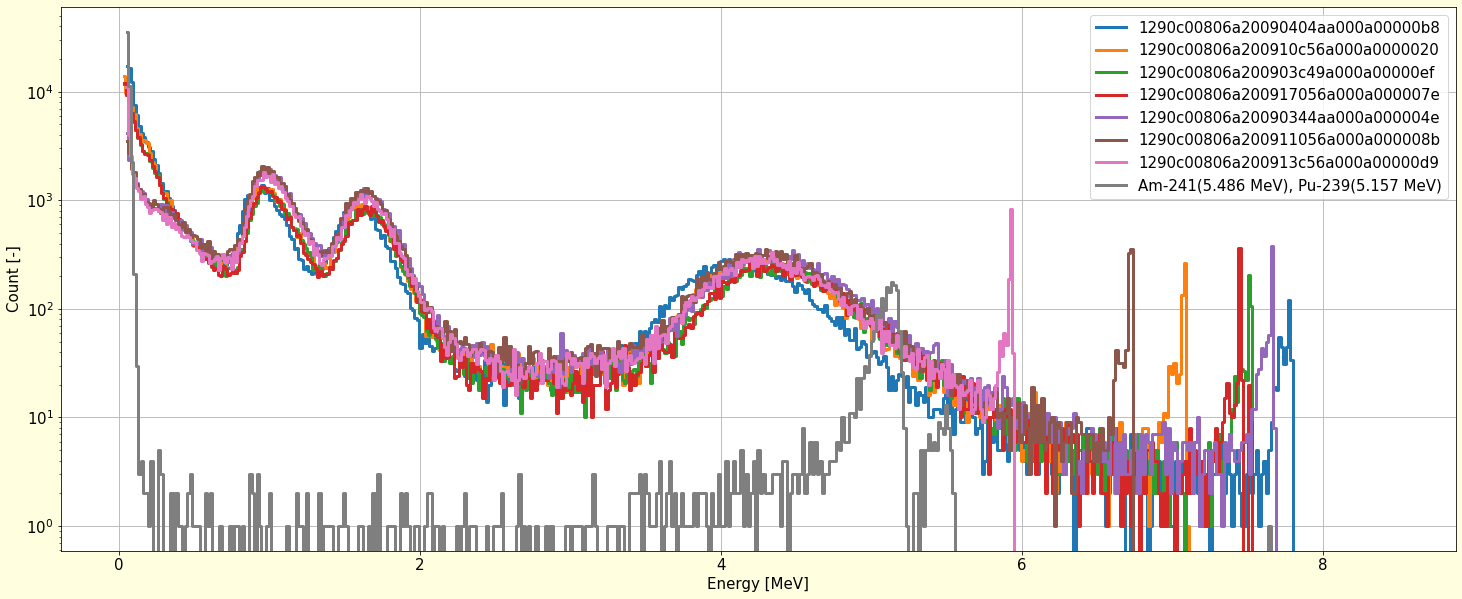

In [20]:
# 4
fto = '/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run1-3'
ftt = glob.iglob(fto+"/**/*.TXT") # generator, search immediate subdirectories 
SWITCH_ON_TIMES = ['2023-04-24 0:0','2023-04-24 00:30','2023-04-25 0:0']

plt.figure(figsize=(25,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

for f in ftt:
    l=[]
    l.extend(range(0,505))

    df = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False)
    df = df.reset_index(drop=True)
    print(f)
    
    df[2] = df[2].apply(pd.to_numeric, errors='coerce')

    df['runtime'] = np.nan
    df.loc[df[0]=='$HIST','seconds'] = df.loc[df[0]=='$HIST',2]
    df.loc[df[0]=='$DOS','seconds'] = 0
    df['runtime'] = df['seconds'].diff() * -1
    rc = df

    run = 0
    rc['run'] = np.nan

    try:
        for x in rc.loc[rc[0]=='$DOS'].index:
            rc.loc[x,'run'] = SWITCH_ON_TIMES[run]
            run += 1
    except:
        pass
    rc['run'].fillna(method="ffill", inplace=True)

    rc[2] = pd.to_numeric(rc[2])
    rc['time'] = pd.to_datetime(rc.run) + pd.to_timedelta(rc[2], unit='s')
    rc.set_index(rc['time'], drop=False, inplace=True)
    #rc = rc.loc['2023-04-24 00:15:00':'2023-04-24 02:00:00']
    
    FIRST_CHANNEL = 9

    ener = rc.iloc[:,FIRST_CHANNEL:500].sum()

    coef3 = np.array([0.,0.])
    sn = str(df.loc[df[0]=='$DOS'][[6]].iloc[0,0])[-2:]
    if sn=='8b': # 0.0164*x + 0.0547
        coef3[1] = 0.0164
        coef3[0] = 0.0547
    if sn=='d9': # 0.0143*x + 0.0513
        coef3[1] = 0.0143
        coef3[0] = 0.0513
    if sn=='7e': # 0.0157*x + 0.0377
        coef3[1] = 0.0157
        coef3[0] = 0.0377
    if sn=='20': # 0.0172*x + 0.0347
        coef3[1] = 0.0172
        coef3[0] = 0.0347
    if sn=='ef': # 0.0157*x + 0.0377
        coef3[1] = 0.0157
        coef3[0] = 0.0377
    if sn=='b8': # 0.0164*x + 0.0547
        coef3[1] = 0.0164
        coef3[0] = 0.0547
    if sn=='4e': # 0.0164*x + 0.0547
        coef3[1] = 0.0164
        coef3[0] = 0.0547
 
    #coef3[1] = coef3[1]*1.7
    #coef3[0] = 0.034
    #0.034 MeV + ch * 0.016 MeV

    print (coef3[0], coef3[1])

    e3 = pd.DataFrame()
    e3['1'] = ener
    e3['i'] = ener.index
    e3['x'] = (e3['i'].astype(float)-FIRST_CHANNEL) * coef3[1] + coef3[0]

    plt.plot(e3['x'], e3['1'] , label=str(df.loc[df[0]=='$DOS'][[6]].iloc[0,0]), drawstyle='steps-mid', lw=3)


#----------------------------------------------------------------------------------------------------------------------
# 3
fto = '/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run10'

ftt = glob.iglob(fto+"/**/*.TXT") # generator, search immediate subdirectories 
SWITCH_ON_TIMES = ['2023-04-24 0:0','2023-04-24 00:0','2023-04-24 0:0']


for f in ftt:
    l=[]
    l.extend(range(0,505))

    df = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False)
    df = df.reset_index(drop=True)
    print(f)
    
    df[2] = df[2].apply(pd.to_numeric, errors='coerce')

    df['runtime'] = np.nan
    df.loc[df[0]=='$HIST','seconds'] = df.loc[df[0]=='$HIST',2]
    df.loc[df[0]=='$DOS','seconds'] = 0
    df['runtime'] = df['seconds'].diff() * -1
    rc = df

    run = 0
    rc['run'] = np.nan

    try:
        for x in rc.loc[rc[0]=='$DOS'].index:
            rc.loc[x,'run'] = SWITCH_ON_TIMES[run]
            run += 1
    except:
        pass
    rc['run'].fillna(method="ffill", inplace=True)

    rc[2] = pd.to_numeric(rc[2])
    rc['time'] = pd.to_datetime(rc.run) + pd.to_timedelta(rc[2], unit='s')
    rc.set_index(rc['time'], drop=False, inplace=True)
    rc = rc.loc['2023-04-24 02:15:00':'2023-04-24 02:47:00']
    
    FIRST_CHANNEL = 9

    ener = rc.iloc[:,FIRST_CHANNEL:500].sum()

    coef3 = np.array([0.,0.])
    sn = str(df.loc[df[0]=='$DOS'][[6]].iloc[0,0])[-2:]
    if sn=='8b': # 0.0164*x + 0.0547
        coef3[1] = 0.0164
        coef3[0] = 0.0547
    if sn=='d9': # 0.0143*x + 0.0513
        coef3[1] = 0.0143
        coef3[0] = 0.0513
    if sn=='7e': # 0.0157*x + 0.0377
        coef3[1] = 0.0157
        coef3[0] = 0.0377
    if sn=='20': # 0.0172*x + 0.0347
        coef3[1] = 0.0172
        coef3[0] = 0.0347
    if sn=='ef': # 0.0157*x + 0.0377
        coef3[1] = 0.0157
        coef3[0] = 0.0377
    if sn=='b8': # 0.0164*x + 0.0547
        coef3[1] = 0.0164
        coef3[0] = 0.0547
    if sn=='4e': # 0.0164*x + 0.0547
        coef3[1] = 0.0164
        coef3[0] = 0.0547
    
    #coef3[1] = coef3[1]*1.7
    #coef3[0] = 0.034
    #0.034 MeV + ch * 0.016 MeV

    print (coef3[0], coef3[1])

    e3 = pd.DataFrame()
    e3['1'] = ener
    e3['i'] = ener.index
    e3['x'] = (e3['i'].astype(float)-FIRST_CHANNEL) * coef3[1] + coef3[0]


    plt.plot(e3['x'], e3['1'] , label=str(df.loc[df[0]=='$DOS'][[6]].iloc[0,0]), drawstyle='steps-mid', lw=3)
    
#------------------------------------------------------------------------------
# kalibrace AmPu 0x4E
f = '/storage/experiments/2023/04_HIMAC/BIO/LABDOS/AmPu/AmPu.TXT'
SWITCH_ON_TIMES = ['2023-04-24 00:00']

l=[]
l.extend(range(0,506))

df = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False)
df = df.reset_index(drop=True)
print(f)

df[2] = df[2].apply(pd.to_numeric, errors='coerce')

df['runtime'] = np.nan
df.loc[df[0]=='$HIST','seconds'] = df.loc[df[0]=='$HIST',2]
df.loc[df[0]=='$DOS','seconds'] = 0
df['runtime'] = df['seconds'].diff() * -1
rc = df

rc['run'] = SWITCH_ON_TIMES[0]

rc[2] = pd.to_numeric(rc[2])
rc['time'] = pd.to_datetime(rc.run) + pd.to_timedelta(rc[2], unit='s')
rc.set_index(rc['time'], drop=False, inplace=True)
rc = rc.loc['2023-04-24 00:05:00':'2023-04-24 00:35:00']

FIRST_CHANNEL = 9

ener = rc.iloc[:,FIRST_CHANNEL:505].sum()

coef3 = np.array([0.,0.])
coef3[1] = 0.0164
coef3[0] = 0.0547

#0.034 MeV + ch * 0.016 MeV

print (coef3[0], coef3[1])

e3 = pd.DataFrame()
e3['1'] = ener
e3['i'] = ener.index
e3['x'] = (e3['i'].astype(float)-FIRST_CHANNEL) * coef3[1] + coef3[0]

plt.plot(e3['x'], e3['1'] , label='Am-241(5.486 MeV), Pu-239(5.157 MeV)', drawstyle='steps-mid', lw=3)
    


plt.yscale('log')
#plt.xscale('log')
#plt.xlim(0.5,3)
#plt.ylim(100,3000)
plt.grid()
plt.xlabel('Energy [MeV]')
plt.ylabel('Count [-]')
plt.legend()


/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run1-3/B8/0.TXT


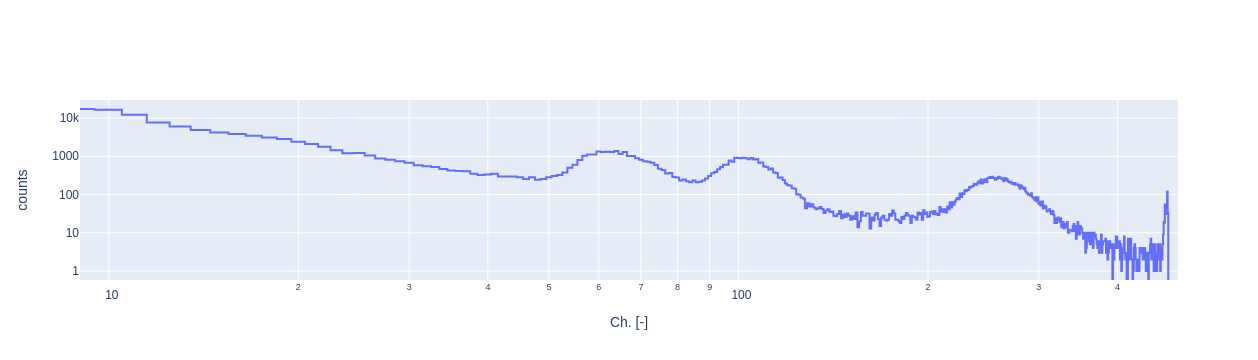

/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run1-3/20/0.TXT


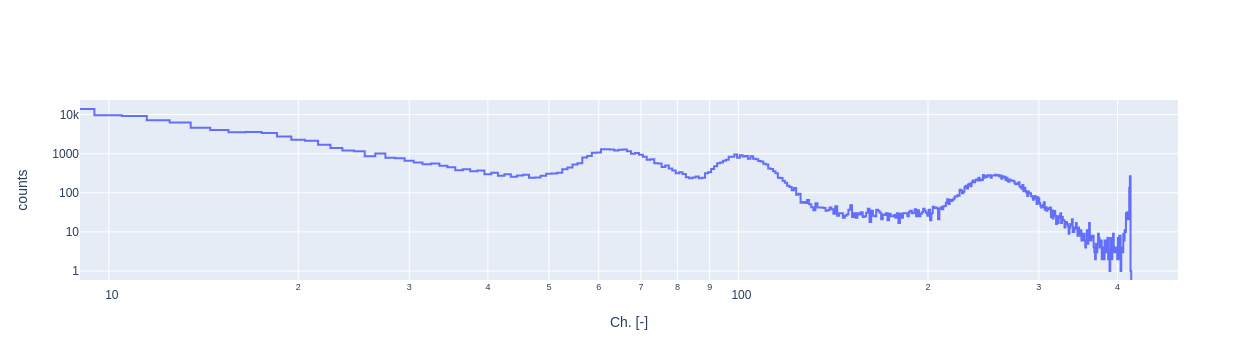

/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run1-3/7E/0.TXT


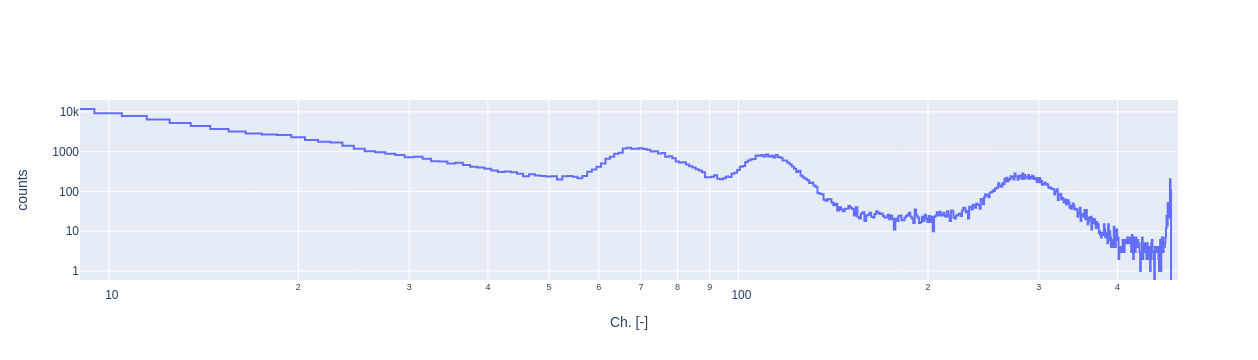

/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run1-3/EF/0.TXT


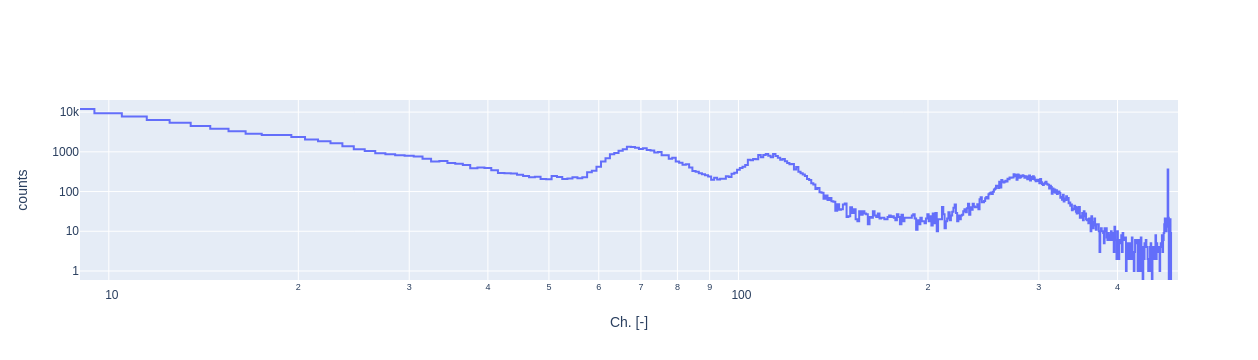

/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run10/4E/0.TXT


/tmp/ipykernel_5835/1259090173.py:114: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



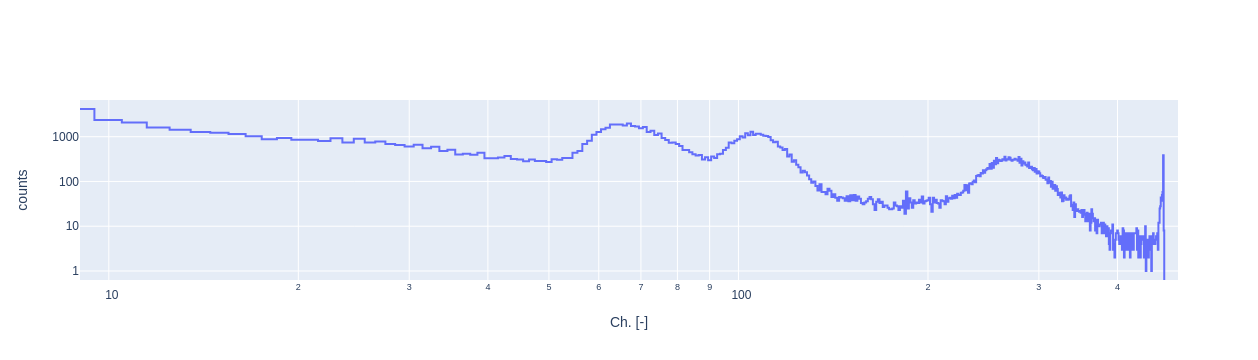

/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run10/8B/0.TXT


/tmp/ipykernel_5835/1259090173.py:114: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



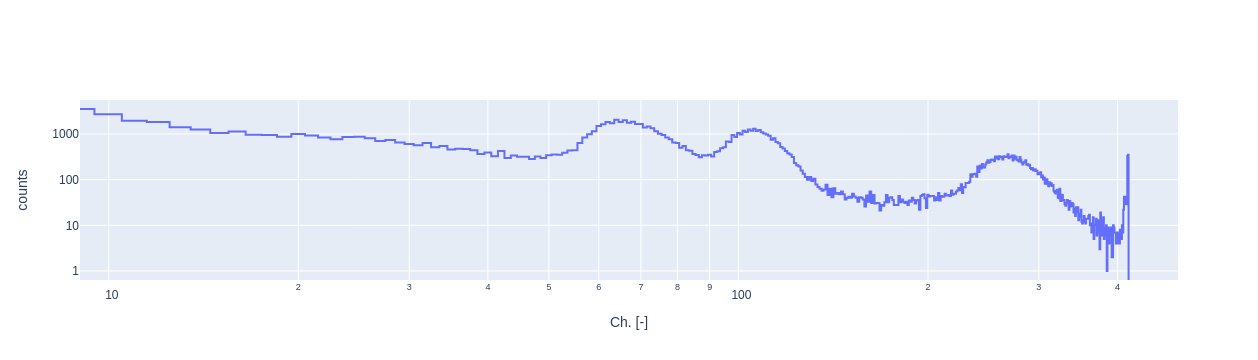

/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run10/D9/0.TXT


/tmp/ipykernel_5835/1259090173.py:114: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



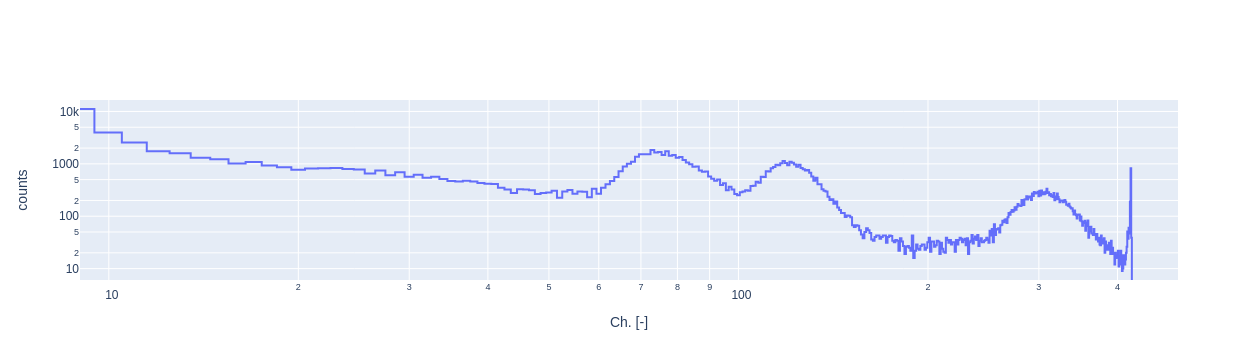

/storage/experiments/2023/04_HIMAC/BIO/LABDOS/AmPu/AmPu.TXT


/tmp/ipykernel_5835/1259090173.py:147: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



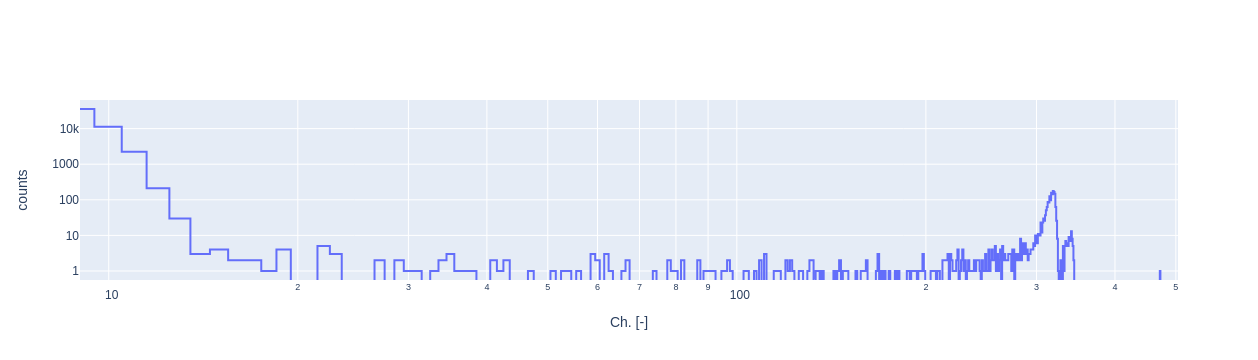

In [21]:
import plotly.graph_objs as go

def plot_ly(label):
    data = [
        go.Scatter(
            x=ener.index,
            y=ener,
            name=label,
            yaxis='y',
            line=dict(
            shape='hvh'
            )
        )    
        ]

    layout = go.Layout(
        #title='LABDOS',
        yaxis=dict(
            title='counts',
            type='log',
            #range = [0,40000]
        ),
        xaxis=dict(
            type='log',
            title='Ch. [-]',
        )
    )

    fig = go.Figure(data=data, layout=layout)
    fig.show()
    
# 4
fto = '/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run1-3'
ftt = glob.iglob(fto+"/**/*.TXT") # generator, search immediate subdirectories 
SWITCH_ON_TIMES = ['2023-04-24 0:0','2023-04-24 00:30','2023-04-25 0:0']

for f in ftt:
    l=[]
    l.extend(range(0,505))

    df = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False)
    df = df.reset_index(drop=True)
    print(f)
    
    df[2] = df[2].apply(pd.to_numeric, errors='coerce')

    df['runtime'] = np.nan
    df.loc[df[0]=='$HIST','seconds'] = df.loc[df[0]=='$HIST',2]
    df.loc[df[0]=='$DOS','seconds'] = 0
    df['runtime'] = df['seconds'].diff() * -1
    rc = df

    run = 0
    rc['run'] = np.nan

    try:
        for x in rc.loc[rc[0]=='$DOS'].index:
            rc.loc[x,'run'] = SWITCH_ON_TIMES[run]
            run += 1
    except:
        pass
    rc['run'].fillna(method="ffill", inplace=True)

    rc[2] = pd.to_numeric(rc[2])
    rc['time'] = pd.to_datetime(rc.run) + pd.to_timedelta(rc[2], unit='s')
    rc.set_index(rc['time'], drop=False, inplace=True)
    #rc = rc.loc['2023-04-24 00:15:00':'2023-04-24 02:00:00']
    
    FIRST_CHANNEL = 9

    ener = rc.iloc[:,FIRST_CHANNEL:500].sum()

    plot_ly(str(df.loc[df[0]=='$DOS'][[6]].iloc[0,0]))


#----------------------------------------------------------------------------------------------------------------------
# 3
fto = '/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run10'

ftt = glob.iglob(fto+"/**/*.TXT") # generator, search immediate subdirectories 
SWITCH_ON_TIMES = ['2023-04-24 0:0','2023-04-24 00:0','2023-04-24 0:0']


for f in ftt:
    l=[]
    l.extend(range(0,505))

    df = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False)
    df = df.reset_index(drop=True)
    print(f)
    
    df[2] = df[2].apply(pd.to_numeric, errors='coerce')

    df['runtime'] = np.nan
    df.loc[df[0]=='$HIST','seconds'] = df.loc[df[0]=='$HIST',2]
    df.loc[df[0]=='$DOS','seconds'] = 0
    df['runtime'] = df['seconds'].diff() * -1
    rc = df

    run = 0
    rc['run'] = np.nan

    try:
        for x in rc.loc[rc[0]=='$DOS'].index:
            rc.loc[x,'run'] = SWITCH_ON_TIMES[run]
            run += 1
    except:
        pass
    rc['run'].fillna(method="ffill", inplace=True)

    rc[2] = pd.to_numeric(rc[2])
    rc['time'] = pd.to_datetime(rc.run) + pd.to_timedelta(rc[2], unit='s')
    rc.set_index(rc['time'], drop=False, inplace=True)
    rc = rc.loc['2023-04-24 02:15:00':'2023-04-24 02:47:00']
    
    FIRST_CHANNEL = 9

    ener = rc.iloc[:,FIRST_CHANNEL:500].sum()

    plot_ly(str(df.loc[df[0]=='$DOS'][[6]].iloc[0,0]))
    
#------------------------------------------------------------------------------
# kalibrace AmPu
f = '/storage/experiments/2023/04_HIMAC/BIO/LABDOS/AmPu/AmPu.TXT'
SWITCH_ON_TIMES = ['2023-04-24 00:00']

l=[]
l.extend(range(0,506))

df = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False)
df = df.reset_index(drop=True)
print(f)

df[2] = df[2].apply(pd.to_numeric, errors='coerce')

df['runtime'] = np.nan
df.loc[df[0]=='$HIST','seconds'] = df.loc[df[0]=='$HIST',2]
df.loc[df[0]=='$DOS','seconds'] = 0
df['runtime'] = df['seconds'].diff() * -1
rc = df

rc['run'] = SWITCH_ON_TIMES[0]

rc[2] = pd.to_numeric(rc[2])
rc['time'] = pd.to_datetime(rc.run) + pd.to_timedelta(rc[2], unit='s')
rc.set_index(rc['time'], drop=False, inplace=True)
rc = rc.loc['2023-04-24 00:05:00':'2023-04-24 00:35:00']

FIRST_CHANNEL = 9

ener = rc.iloc[:,FIRST_CHANNEL:505].sum()

plot_ly('AmPu')


/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run1-3/B8/0.TXT


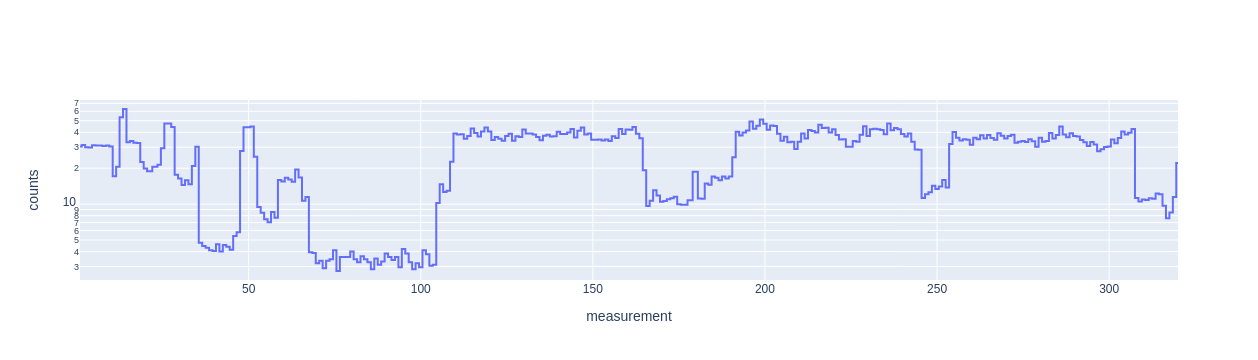

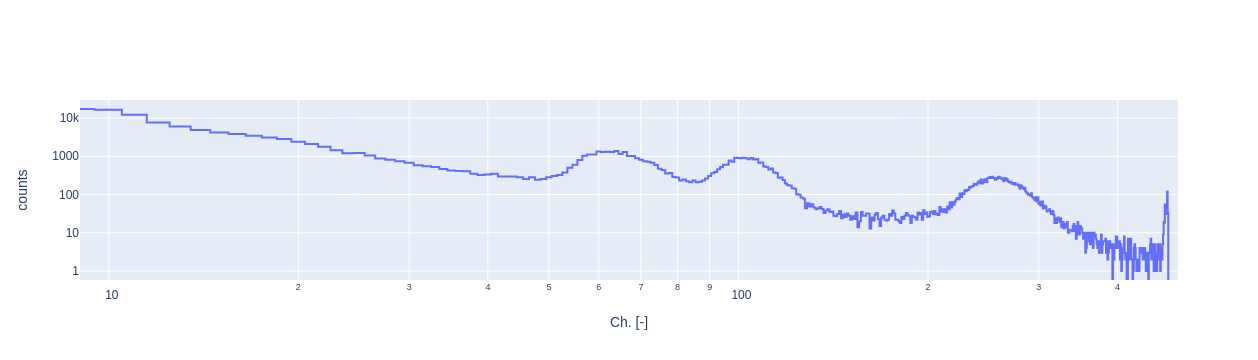

/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run1-3/20/0.TXT


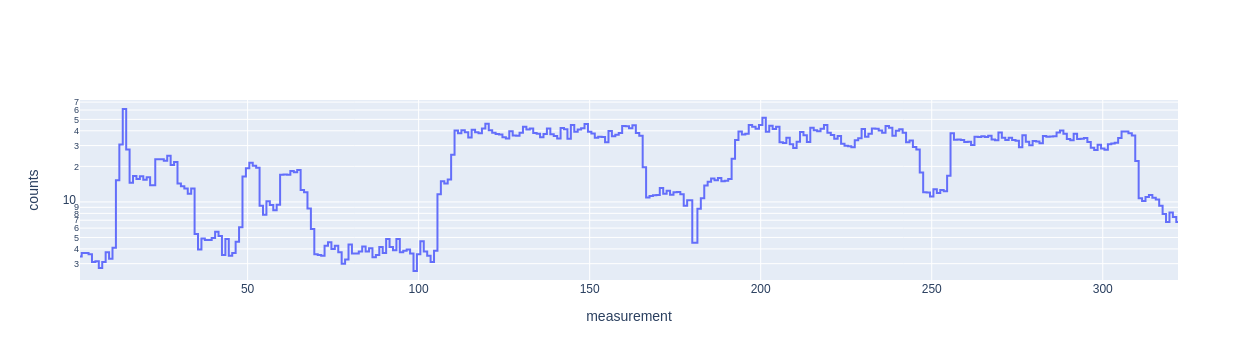

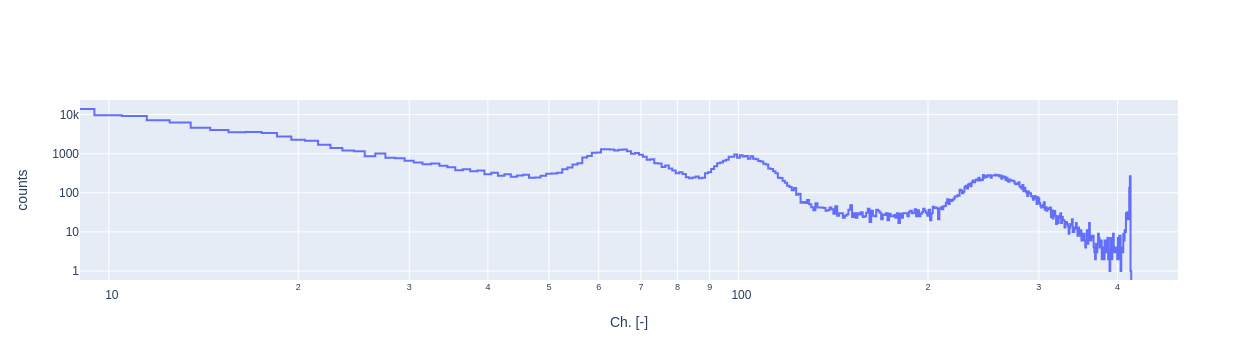

/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run1-3/7E/0.TXT


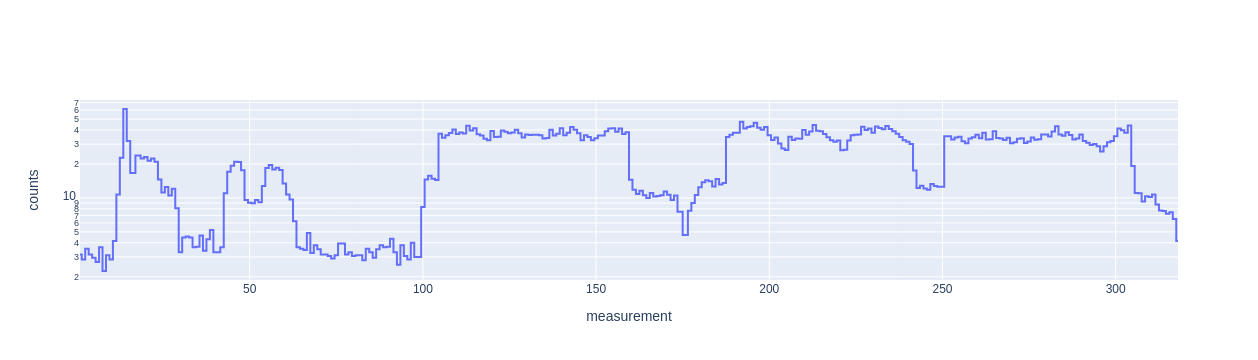

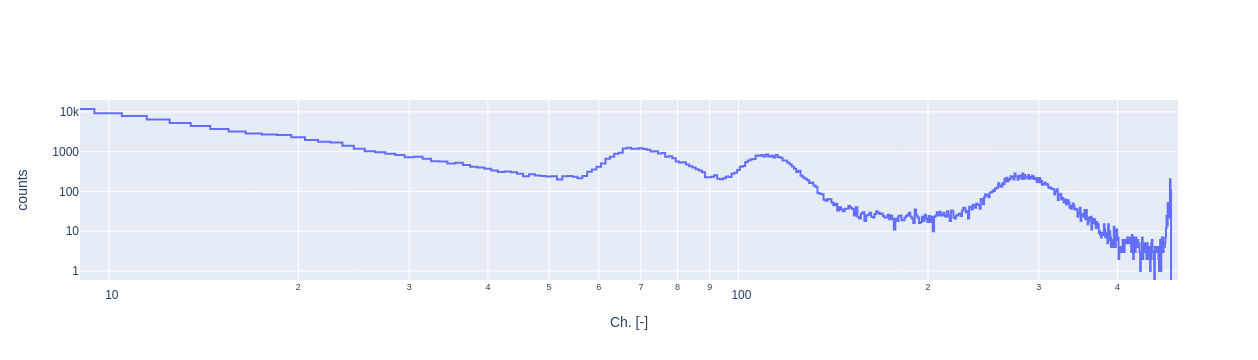

/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run1-3/EF/0.TXT


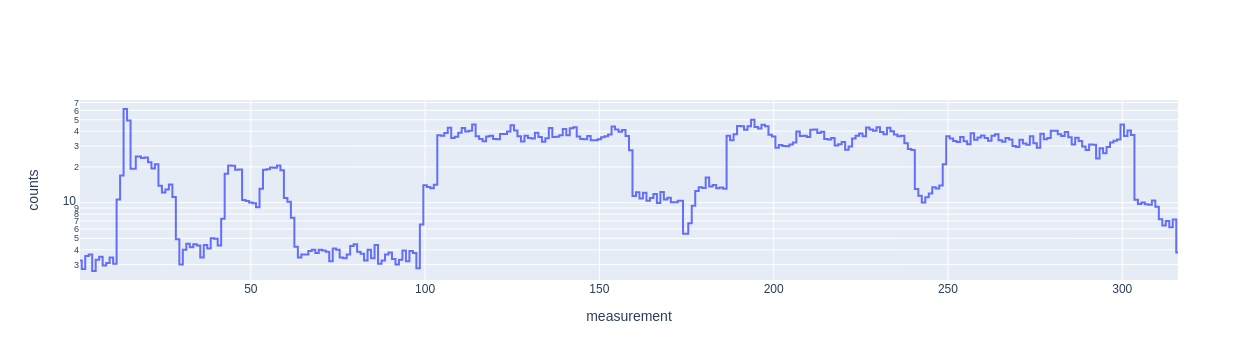

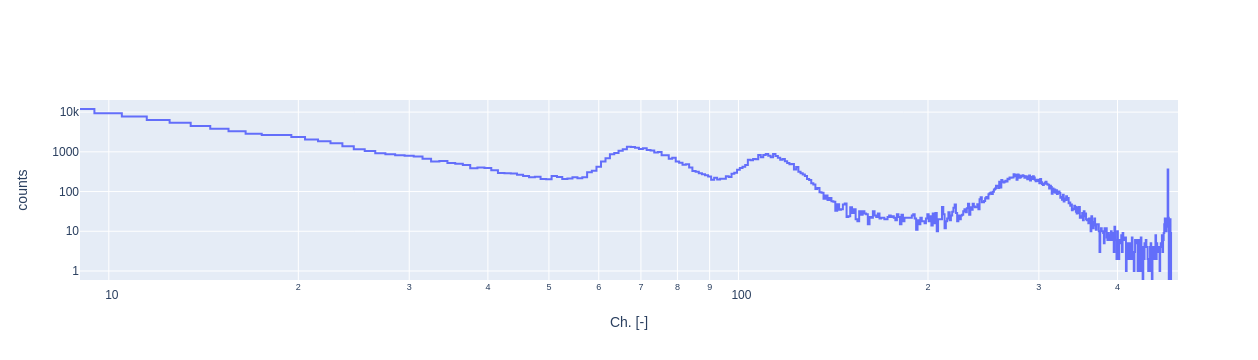

In [19]:
import plotly.graph_objs as go

def plot_lyly(label):
    data = [
        go.Scatter(
            x=rc.index,
            y=rc['sum'],
            name=label,
            yaxis='y',
            line=dict(
            shape='hvh'
            )
        )    
        ]

    layout = go.Layout(
        #title='LABDOS',
        yaxis=dict(
            title='counts',
            type='log',
            #range = [0,40000]
        ),
        xaxis=dict(
            #type='log',
            title='measurement',
        )
    )

    fig = go.Figure(data=data, layout=layout)
    fig.show()


def plot_ly(label):
    data = [
        go.Scatter(
            x=ener.index,
            y=ener,
            name=label,
            yaxis='y',
            line=dict(
            shape='hvh'
            )
        )    
        ]

    layout = go.Layout(
        #title='LABDOS',
        yaxis=dict(
            title='counts',
            type='log',
            #range = [0,40000]
        ),
        xaxis=dict(
            type='log',
            title='Ch. [-]',
        )
    )

    fig = go.Figure(data=data, layout=layout)
    fig.show()
    
# 4
fto = '/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run1-3'
ftt = glob.iglob(fto+"/**/*.TXT") # generator, search immediate subdirectories 
SWITCH_ON_TIMES = ['2023-04-24 0:0','2023-04-24 00:30','2023-04-25 0:0']

for f in ftt:
    l=[]
    l.extend(range(0,505))

    df = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False)
    df = df.reset_index(drop=True)
    print(f)
    
    df[2] = df[2].apply(pd.to_numeric, errors='coerce')

    df['runtime'] = np.nan
    rc = df.loc[df[0]=='$HIST'].copy()
        
    FIRST_CHANNEL = 9

    rc['sum'] = rc[range(FIRST_CHANNEL,500)].sum(axis=1)/10/2
    
    #rc=rc.iloc[256:305]

    ener = rc.iloc[:,FIRST_CHANNEL:500].sum()

    plot_lyly(f)
    plot_ly(f)



In [7]:
rc

0          1        2      3  \
time                                                        
NaT                       $DOS  LABDOS01A      NaN    513   
2023-04-24 00:00:10.950  $HIST          0    10.95  20978   
2023-04-24 00:00:21.760  $HIST          1    21.76  21064   
2023-04-24 00:00:32.570  $HIST          2    32.57  21145   
2023-04-24 00:00:43.380  $HIST          3    43.38  21169   
...                        ...        ...      ...    ...   
2023-04-25 00:25:02.680  $HIST        137  1502.68  21408   
2023-04-25 00:25:13.500  $HIST        138  1513.50  21494   
2023-04-25 00:25:24.310  $HIST        139  1524.31  21414   
2023-04-25 00:25:35.420  $HIST        140  1535.42  21399   
2023-04-25 00:25:46.530  $HIST        141  1546.53  21430   

                                                                4        5  \
time                                                                         
NaT                      71cdf196883fa3ab648ae47327ef2137eb69420f  CIBuild   
2023-04-24 00:00:10.950                                        65      103   
2023-04-24 00:00:21.760                                        55      146   
2023-04-24 00:00:32.570                                        71      153   
2023-04-24 00:00:43.380                                        73      193   
...                                                           ...      ...   
2023-04-25 00:25:02.680                                       128      269   
2023-04-25 00:25:13.500                                       140      222   
2023-04-25 00:25:24.310                                       124      262   
2023-04-25 00:25:35.420                                       144      232   
2023-04-25 00:25:46.530                                        76      223   

                                                        6       7     8     9  \
time                                                                            
NaT                      1290c00806a200917056a000a000007e     NaN   NaN   NaN   
2023-04-24 00:00:10.950                             16141  8777.0  19.0  14.0   
2023-04-24 00:00:21.760                             16316  8479.0  23.0  11.0   
2023-04-24 00:00:32.570                             16481  8211.0  22.0  11.0   
2023-04-24 00:00:43.380                             16832  7793.0  23.0  15.0   
...                                                   ...     ...   ...   ...   
2023-04-25 00:25:02.680                             17904  6350.0  24.0  13.0   
2023-04-25 00:25:13.500                             18040  6161.0  26.0  25.0   
2023-04-25 00:25:24.310                             17965  6301.0  17.0  15.0   
2023-04-25 00:25:35.420                             17880  6400.0  28.0  15.0   
2023-04-25 00:25:46.530                             17929  6398.0  27.0  12.0   

                         ...  499  500  501  502  503  504  runtime  seconds  \
time                     ...                                                   
NaT                      ...  NaN  NaN  NaN  NaN  NaN  NaN      NaN     0.00   
2023-04-24 00:00:10.950  ...  0.0  0.0  0.0  0.0  0.0  0.0   -10.95    10.95   
2023-04-24 00:00:21.760  ...  0.0  0.0  0.0  0.0  0.0  0.0   -10.81    21.76   
2023-04-24 00:00:32.570  ...  0.0  0.0  0.0  0.0  0.0  0.0   -10.81    32.57   
2023-04-24 00:00:43.380  ...  0.0  0.0  0.0  0.0  0.0  0.0   -10.81    43.38   
...                      ...  ...  ...  ...  ...  ...  ...      ...      ...   
2023-04-25 00:25:02.680  ...  0.0  0.0  0.0  0.0  0.0  0.0   -10.81  1502.68   
2023-04-25 00:25:13.500  ...  0.0  0.0  0.0  0.0  0.0  0.0   -10.82  1513.50   
2023-04-25 00:25:24.310  ...  0.0  0.0  0.0  0.0  0.0  0.0   -10.81  1524.31   
2023-04-25 00:25:35.420  ...  0.0  0.0  0.0  0.0  0.0  0.0   -11.11  1535.42   
2023-04-25 00:25:46.530  ...  0.0  0.0  0.0  0.0  0.0  0.0   -11.11  1546.53   

                                    run                    time  
time                                                       

/storage/experiments/2023/04_HIMAC/BIO/LABDOS/AmPu/AmPu.TXT
0.0547 0.0164


/tmp/ipykernel_29347/364950012.py:26: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



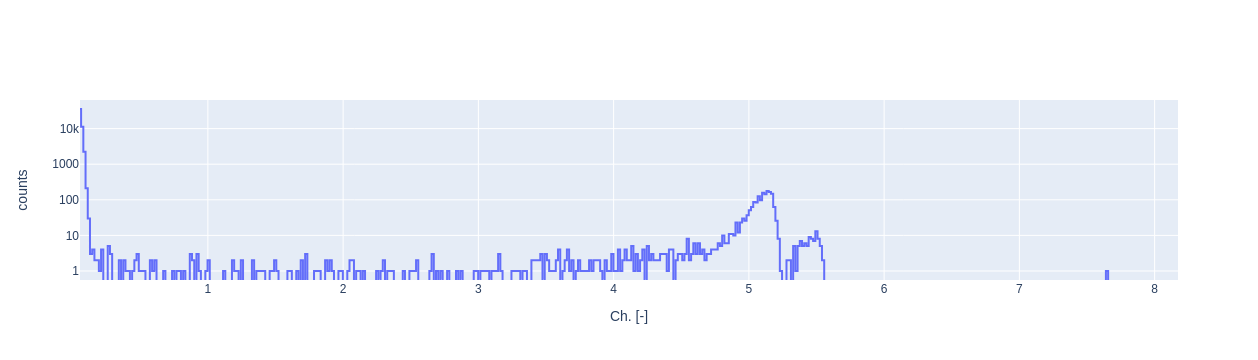

In [23]:
    
#------------------------------------------------------------------------------
# kalibrace AmPu 0x4E
f = '/storage/experiments/2023/04_HIMAC/BIO/LABDOS/AmPu/AmPu.TXT'
SWITCH_ON_TIMES = ['2023-04-24 00:00']

l=[]
l.extend(range(0,506))

df = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False)
df = df.reset_index(drop=True)
print(f)

df[2] = df[2].apply(pd.to_numeric, errors='coerce')

df['runtime'] = np.nan
df.loc[df[0]=='$HIST','seconds'] = df.loc[df[0]=='$HIST',2]
df.loc[df[0]=='$DOS','seconds'] = 0
df['runtime'] = df['seconds'].diff() * -1
rc = df

rc['run'] = SWITCH_ON_TIMES[0]

rc[2] = pd.to_numeric(rc[2])
rc['time'] = pd.to_datetime(rc.run) + pd.to_timedelta(rc[2], unit='s')
rc.set_index(rc['time'], drop=False, inplace=True)
rc = rc.loc['2023-04-24 00:05:00':'2023-04-24 00:35:00']

FIRST_CHANNEL = 9

ener = rc.iloc[:,FIRST_CHANNEL:505].sum()

coef3 = np.array([0.,0.])
coef3[1] = 0.0164
coef3[0] = 0.0547

#0.034 MeV + ch * 0.016 MeV

print (coef3[0], coef3[1])

e3 = pd.DataFrame()
e3['1'] = ener
e3['i'] = ener.index
e3['x'] = (e3['i'].astype(float)-FIRST_CHANNEL) * coef3[1] + coef3[0]

    
data = [
    go.Scatter(
        x=e3['x'],
        y=e3['1'],
        name='AmPu',
        yaxis='y',
        line=dict(
        shape='hvh'
        )
    )    
    ]

layout = go.Layout(
    #title='LABDOS',
    yaxis=dict(
        title='counts',
        type='log',
        #range = [0,40000]
    ),
    xaxis=dict(
        title='Ch. [-]',
    )
)

fig = go.Figure(data=data, layout=layout)
fig.show()




In [9]:
rc.iloc[:,1:505]


1       2      3     4    5     6       7       8    \
time                                                                          
2023-04-24 00:05:07.120  28  307.12  19296  6828  112  2054  9531.0  8261.0   
2023-04-24 00:05:17.630  29  317.63  19267  6796   95  2060  9617.0  8248.0   
2023-04-24 00:05:28.140  30  328.14  19179  7673   90  1790  8934.0  8414.0   
2023-04-24 00:05:38.660  31  338.66  19232  7427   84  1688  8983.0  8667.0   
2023-04-24 00:05:49.170  32  349.17  19272  7705   67  1684  8809.0  8544.0   
2023-04-24 00:05:59.680  33  359.68  19319  7472   70  1682  8976.0  8562.0   
2023-04-24 00:06:10.190  34  370.19  19176  7380   90  1784  9005.0  8647.0   

                            9       10   ...  495  496  497  498  499  500  \
time                                     ...                                 
2023-04-24 00:05:07.120  4845.0  1435.0  ...  0.0  0.0  0.0  0.0  0.0  0.0   
2023-04-24 00:05:17.630  4835.0  1429.0  ...  0.0  0.0  0.0  0.0  0.0  0.0   
2023-04-24 00:05:28.140  5164.0  1762.0  ...  0.0  0.0  0.0  0.0  0.0  0.0   
2023-04-24 00:05:38.660  5143.0  1614.0  ...  0.0  0.0  0.0  0.0  0.0  0.0   
2023-04-24 00:05:49.170  5246.0  1709.0  ...  0.0  0.0  0.0  0.0  0.0  0.0   
2023-04-24 00:05:59.680  5186.0  1622.0  ...  0.0  0.0  0.0  0.0  0.0  0.0   
2023-04-24 00:06:10.190  5107.0  1658.0  ...  0.0  0.0  0.0  0.0  0.0  0.0   

                         501  502  503  504  
time                                         
2023-04-24 00:05:07.120  0.0  0.0  0.0  0.0  
2023-04-24 00:05:17.630  0.0  0.0  0.0  0.0  
2023-04-24 00:05:28.140  0.0  0.0  0.0  0.0  
2023-04-24 00:05:38.660  0.0  0.0  0.0  0.0  
2023-04-24 00:05:49.170  0.0  0.0  0.0  0.0  
2023-04-24 00:05:59.680  0.0  0.0  0.0  0.0  
2023-04-24 00:06:10.190  0.0  0.0  0.0  0.0  

[7 rows x 504 columns]

# spectra

In [28]:
fto = '/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run1-3' # 4
#fto = '/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run10' # 3
#fto = '/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run17' # 4 s vicky
#fto = '/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run20' # 4 opacne
#fto = '/storage/experiments/2023/04_labdos_BaCs/2nd'
fto = '/storage/experiments/2023/05_CERF/PRG_GVA/LABDOS'
fto = '/storage/experiments/2023/05_CERF/16052023/LABDOS'
fto = '/storage/experiments/2023/05_CERF/15052023/LABDOS'


/storage/experiments/2023/05_CERF/15052023/LABDOS/4E/0.TXT
/storage/experiments/2023/05_CERF/15052023/LABDOS/20/1.TXT
/storage/experiments/2023/05_CERF/15052023/LABDOS/20/0.TXT
/storage/experiments/2023/05_CERF/15052023/LABDOS/B8/0.TXT
/storage/experiments/2023/05_CERF/15052023/LABDOS/D9/0.TXT
/storage/experiments/2023/05_CERF/15052023/LABDOS/D9/1.TXT
/storage/experiments/2023/05_CERF/15052023/LABDOS/7E/0.TXT
/storage/experiments/2023/05_CERF/15052023/LABDOS/EF/0.TXT


Text(0.5, 0, 'Measurement No.')

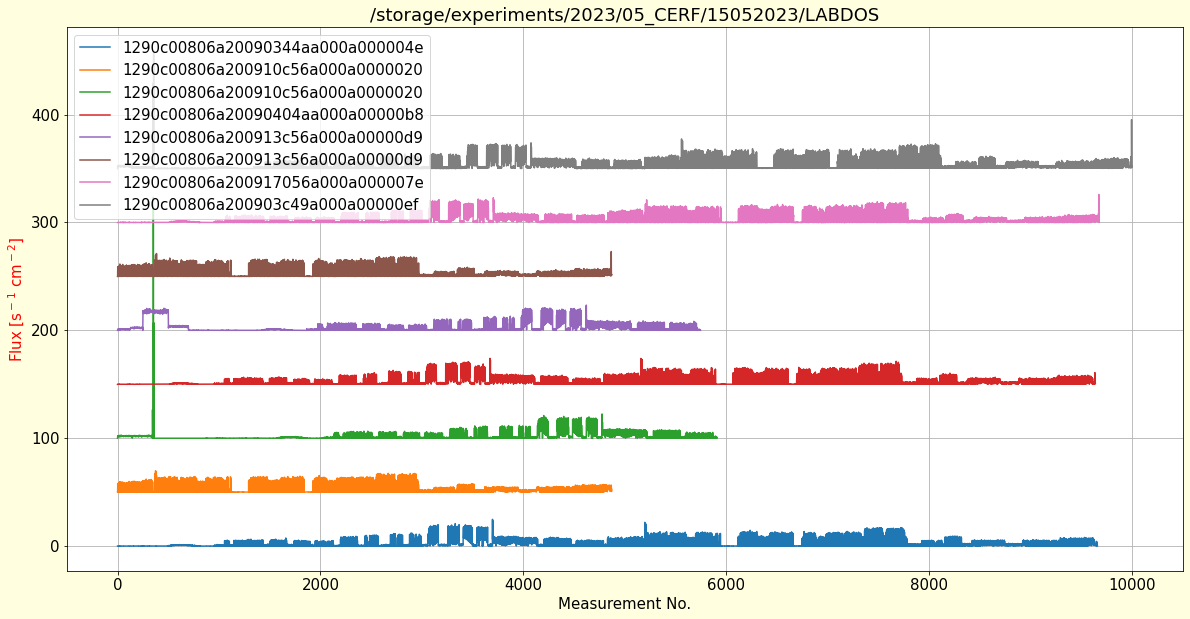

In [29]:
ftt = glob.iglob(fto+"/**/*.TXT") # generator, search immediate subdirectories 
#ftt = glob.iglob(fto+"/*.TXT") # generator, search immediate subdirectories 

plt.figure(figsize=(20,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

offset = 0

for f in ftt:
    l=[]
    l.extend(range(0,505))

    df = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False)
    #df = df.reset_index(drop=True)
    print(f)
    
    df[2] = df[2].apply(pd.to_numeric, errors='coerce')

    rc = df.loc[:].copy()
    #rc = df.iloc[ df.loc[df[0]=='$DOS'].index[1]:].copy()

    rc[2] = pd.to_numeric(rc[2])
    
    FIRST_CHANNEL = 10

    rc['sum'] = rc[range(FIRST_CHANNEL,500)].sum(axis=1)/10/2

    ###rc['sum'].plot(marker='.', linestyle='', color='gray')
    #rcc = rc.resample('1T').mean()
    (rc['sum']+offset).plot(label=str(rc.loc[rc[0]=='$DOS'][[6]].iloc[0,0]))
    offset += 50

    #plt.ylim([0,20])
    #break

plt.ylabel('Flux [s$^-$$^1$ cm$^-$$^2$]', color='red')
plt.title(fto)
plt.legend()
plt.grid()
plt.xlabel('Measurement No.')
#plt.xlim(3000,3400)

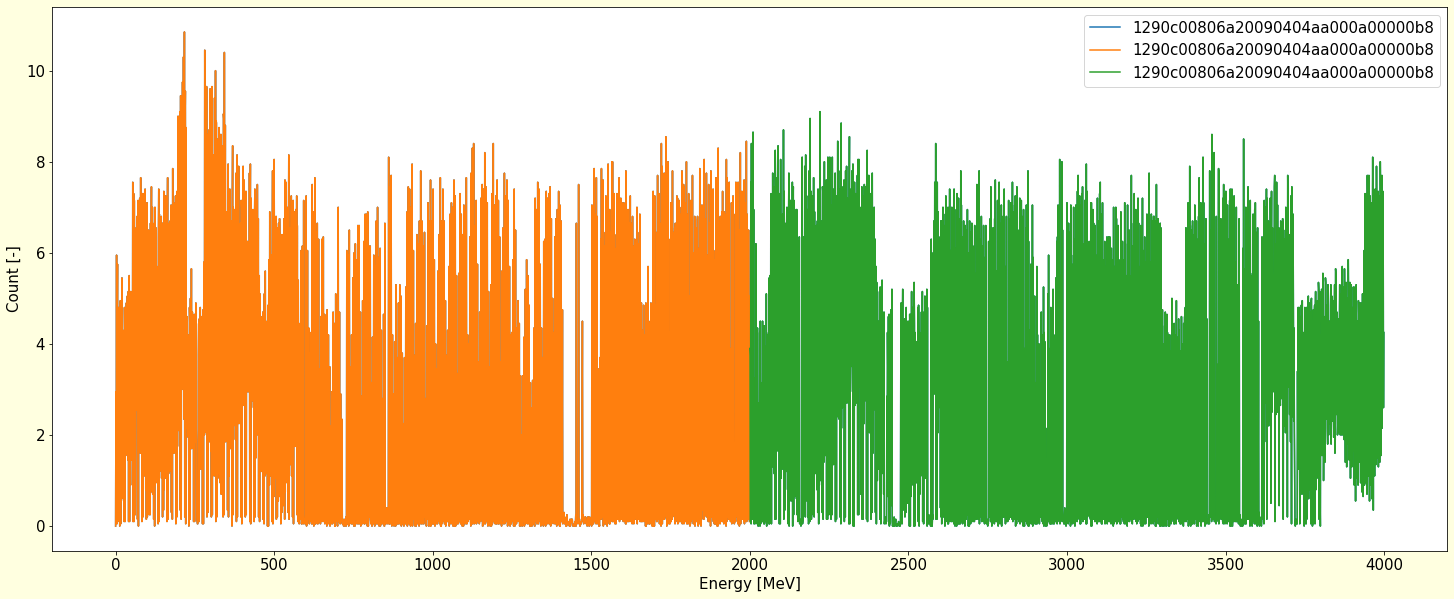

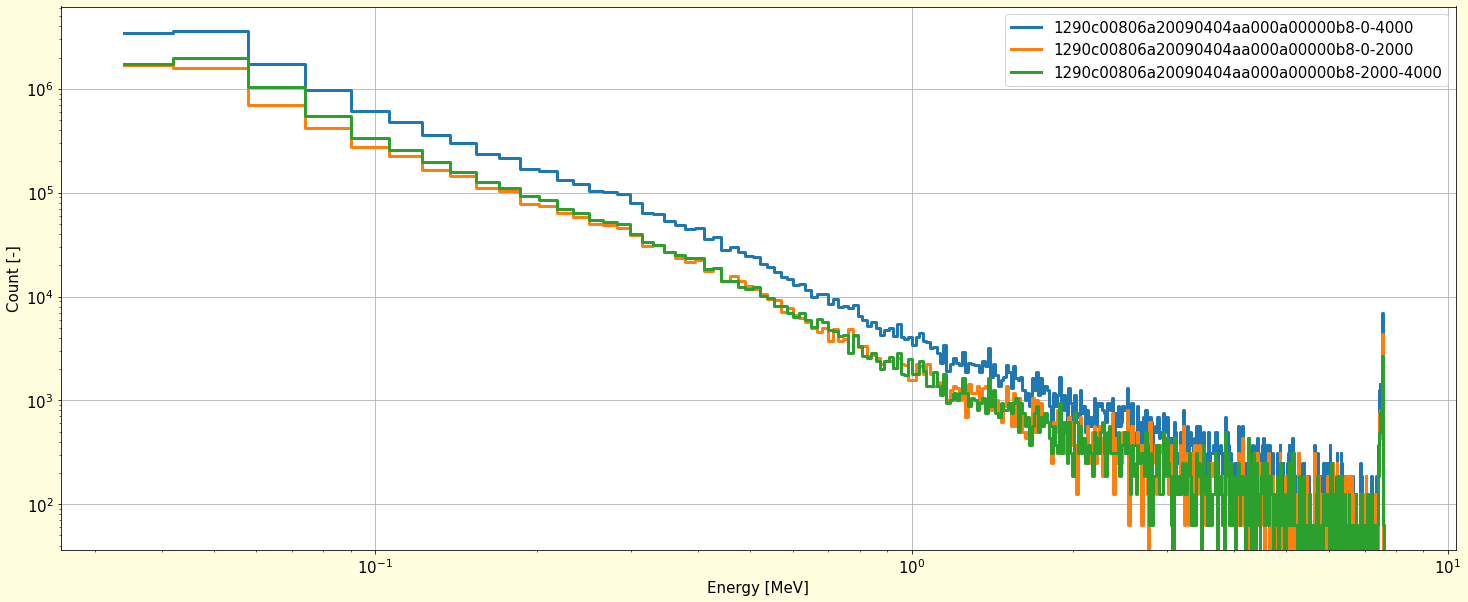

In [22]:
SN = 'B8'

def flux(file, start, end):
    l=[]
    l.extend(range(0,505))
    df = pd.read_csv(file, sep=',', header=None, names=l, comment='*', low_memory=False)

    df[2] = df[2].apply(pd.to_numeric, errors='coerce')

    rc = df.iloc[start:end].copy()
    #rc = df.iloc[ df.loc[df[0]=='$DOS'].index[1]:].copy()

    rc[2] = pd.to_numeric(rc[2])
    
    FIRST_CHANNEL = 9

    rc['sum'] = rc[range(FIRST_CHANNEL,500)].sum(axis=1)/10/2    
    #rc = rc.loc[rc['sum']<2]

    ###rc['sum'].plot(marker='.', linestyle='', color='gray')
    #rcc = rc.resample('1T').mean()
    (rc['sum']).plot(label=str(df.loc[df[0]=='$DOS'][[6]].iloc[0,0]))

    #plt.ylim([0,30])
    
def spectrum(file, start, end):
    #end = start+100
    #end = start+20
    l=[]
    l.extend(range(0,505))
    df = pd.read_csv(file, sep=',', header=None, names=l, comment='*', low_memory=False)

    FIRST_CHANNEL = 9
    
    rc = df.iloc[start:end].copy()

    rc['sum'] = rc[range(FIRST_CHANNEL,500)].sum(axis=1)/10/2    
    #rc = rc.loc[rc['sum']<1]

    ener = rc.iloc[:,FIRST_CHANNEL:500].sum()

    coef3 = np.array([0.,0.])
    coef3[1] = 0.016
    coef3[0] = 0.034
    #0.034 MeV + ch * 0.016 MeV

    e3 = pd.DataFrame()
    e3['1'] = ener
    e3['i'] = ener.index
    e3['x'] = (e3['i'].astype(float)-FIRST_CHANNEL) * coef3[1] + coef3[0]

    plt.plot(e3['x'], e3['1']/coef3[1] , label=str(df.loc[df[0]=='$DOS'][[6]].iloc[0,0])+'-'+str(start)+'-'+str(end), drawstyle='steps-mid', lw=3)
    #plt.ylim(0.0001,100)

plt.figure(figsize=(25,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})
#plt.yscale('log')
plt.xlabel('Energy [MeV]')
plt.ylabel('Count [-]')
plt.grid()

#spectrum('/storage/experiments/2023/04_labdos_BaCs/2nd/LABDOS_8B.TXT',420) # 420, 590
#spectrum('/storage/experiments/2023/04_labdos_BaCs/2nd/LABDOS_D9.TXT',300) # 300, 510
#spectrum('/storage/experiments/2023/04_labdos_BaCs/2nd/LABDOS_B8.TXT',510) # 300, 510
#spectrum('/storage/experiments/2023/04_labdos_BaCs/2nd/LABDOS_4E.TXT',570) # 410, 570

#spectrum('/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run1-3/B8/0.TXT', 120) # 120, 200, 260
#spectrum('/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run1-3/20/0.TXT', 120)
#spectrum('/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run1-3/EF/0.TXT', 120)
#spectrum('/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run1-3/7E/0.TXT', 120)

#spectrum('/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run10/4E/0.TXT', 790) # 790, 850, 910
#spectrum('/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run10/8B/0.TXT', 790)
#spectrum('/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run10/D9/0.TXT', 790)

#flux('/storage/experiments/2023/05_CERF/PRG_GVA/LABDOS/20/0.TXT', 2000, 9000)
#flux('/storage/experiments/2023/05_CERF/PRG_GVA/LABDOS/20/0.TXT', 2250, 2250+240)
#flux('/storage/experiments/2023/05_CERF/PRG_GVA/LABDOS/20/0.TXT', 3250, 3250+160)
#flux('/storage/experiments/2023/05_CERF/PRG_GVA/LABDOS/20/0.TXT', 4350, 4350+80)
#flux('/storage/experiments/2023/05_CERF/PRG_GVA/LABDOS/20/0.TXT', 4900, 4900+240)

#flux('/storage/experiments/2023/05_CERF/PRG_GVA/LABDOS/'+SN+'/0.TXT', 1000, 5000)
#flux('/storage/experiments/2023/05_CERF/PRG_GVA/LABDOS/'+SN+'/0.TXT', 1200, 1200+240)
#flux('/storage/experiments/2023/05_CERF/PRG_GVA/LABDOS/'+SN+'/0.TXT', 2200, 2200+160)
#flux('/storage/experiments/2023/05_CERF/PRG_GVA/LABDOS/'+SN+'/0.TXT', 3250, 3250+80)
#flux('/storage/experiments/2023/05_CERF/PRG_GVA/LABDOS/'+SN+'/0.TXT', 3750, 3750+240)

flux('/storage/experiments/2023/05_CERF/16052023/LABDOS/'+SN+'/0.TXT', 0, 4000)
flux('/storage/experiments/2023/05_CERF/16052023/LABDOS/'+SN+'/0.TXT', 0, 2000)
flux('/storage/experiments/2023/05_CERF/16052023/LABDOS/'+SN+'/0.TXT', 2000, 4000)

plt.legend()

plt.figure(figsize=(25,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Energy [MeV]')
plt.ylabel('Count [-]')
plt.grid()
#spectrum('/storage/experiments/2023/05_CERF/PRG_GVA/LABDOS/20/0.TXT', 2000, 9000)
#spectrum('/storage/experiments/2023/05_CERF/PRG_GVA/LABDOS/20/0.TXT', 2250, 2250+240)
#spectrum('/storage/experiments/2023/05_CERF/PRG_GVA/LABDOS/20/0.TXT', 3250, 3250+160)
#spectrum('/storage/experiments/2023/05_CERF/PRG_GVA/LABDOS/20/0.TXT', 4350, 4350+80)
#spectrum('/storage/experiments/2023/05_CERF/PRG_GVA/LABDOS/20/0.TXT', 4900, 4900+240)

#spectrum('/storage/experiments/2023/05_CERF/PRG_GVA/LABDOS/'+SN+'/0.TXT', 1000, 5000)
#spectrum('/storage/experiments/2023/05_CERF/PRG_GVA/LABDOS/'+SN+'/0.TXT', 1200, 1200+240)
#spectrum('/storage/experiments/2023/05_CERF/PRG_GVA/LABDOS/'+SN+'/0.TXT', 2200, 2200+160)
#spectrum('/storage/experiments/2023/05_CERF/PRG_GVA/LABDOS/'+SN+'/0.TXT', 3250, 3250+80)
#spectrum('/storage/experiments/2023/05_CERF/PRG_GVA/LABDOS/'+SN+'/0.TXT', 3750, 3750+240)

spectrum('/storage/experiments/2023/05_CERF/16052023/LABDOS/'+SN+'/0.TXT', 0, 4000)
spectrum('/storage/experiments/2023/05_CERF/16052023/LABDOS/'+SN+'/0.TXT', 0, 2000)
spectrum('/storage/experiments/2023/05_CERF/16052023/LABDOS/'+SN+'/0.TXT', 2000, 4000)
#spectrum('/storage/experiments/2023/05_CERF/15/LABDOS/'+SN+'/0.TXT', 8000, 8500)
plt.legend()

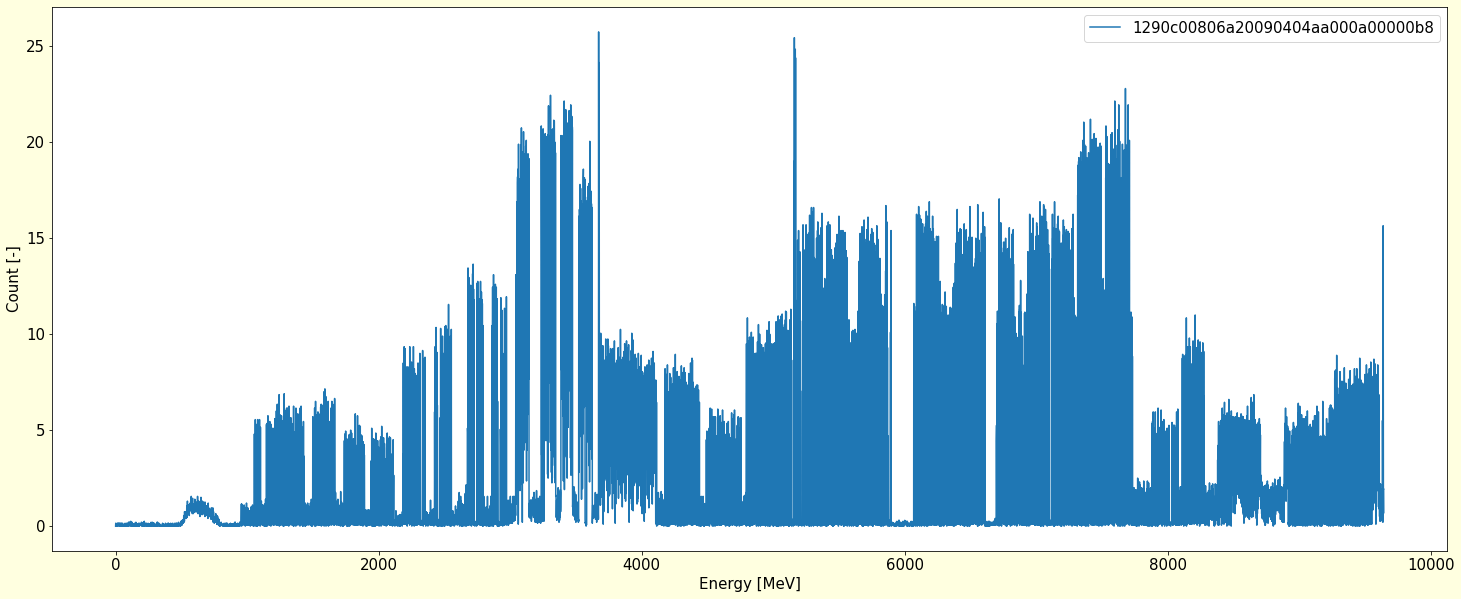

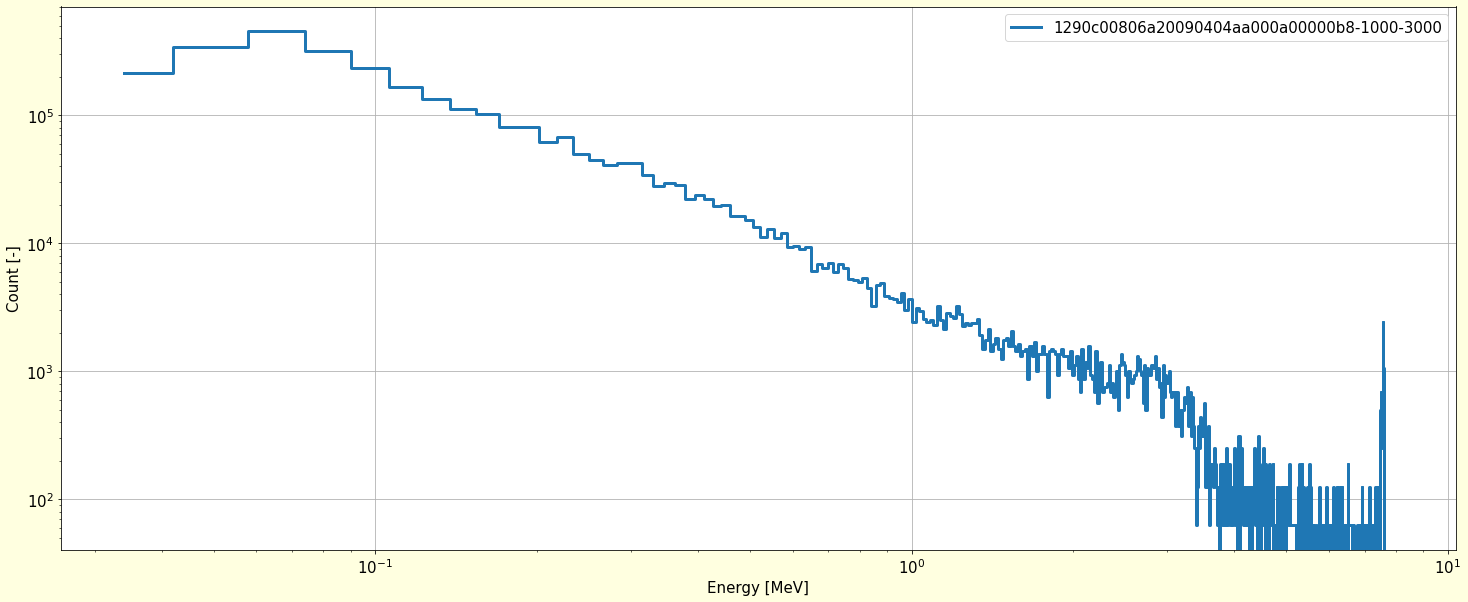

In [23]:
SN = 'B8'

plt.figure(figsize=(25,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})
#plt.yscale('log')
plt.xlabel('Energy [MeV]')
plt.ylabel('Count [-]')
plt.grid()
flux('/storage/experiments/2023/05_CERF/15052023/LABDOS/'+SN+'/0.TXT', 0, 20000)
plt.legend()

plt.figure(figsize=(25,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Energy [MeV]')
plt.ylabel('Count [-]')
plt.grid()
spectrum('/storage/experiments/2023/05_CERF/15052023/LABDOS/'+SN+'/0.TXT', 1000, 3000)
plt.legend()


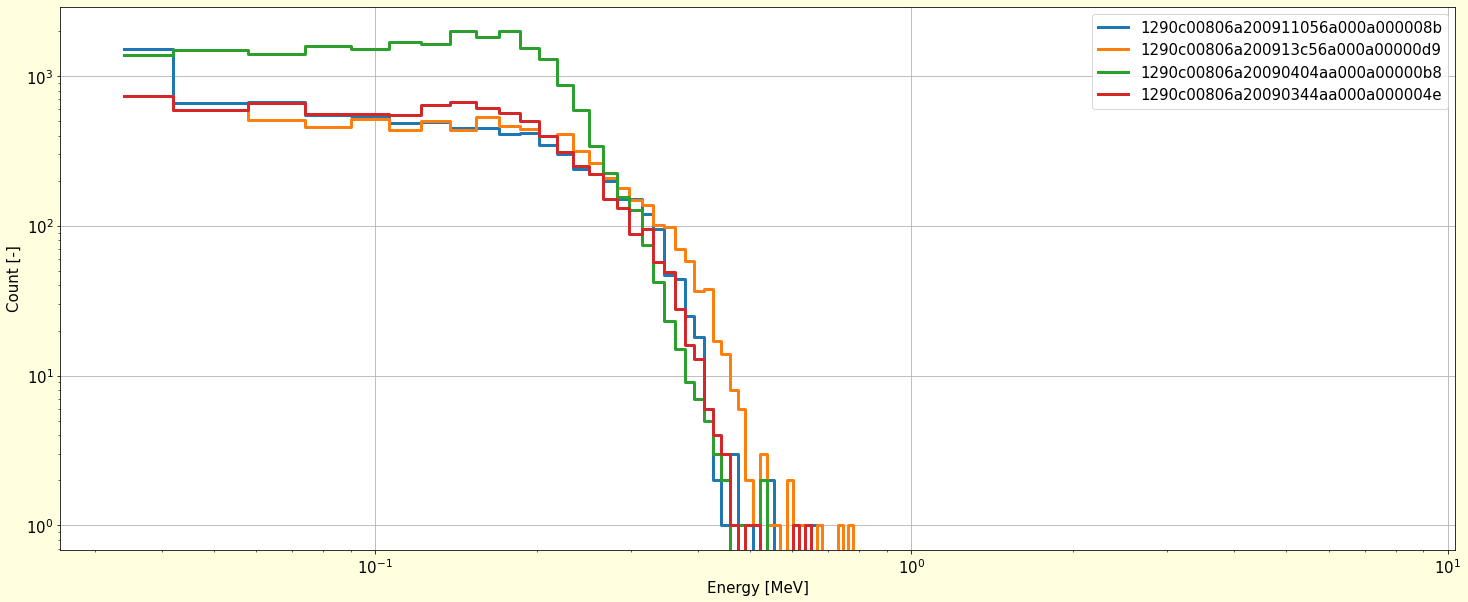

In [27]:
def spectrum(file, start):
    end = start+100
    l=[]
    l.extend(range(0,505))
    df = pd.read_csv(file, sep=',', header=None, names=l, comment='*', low_memory=False)

    FIRST_CHANNEL = 9

    ener = df.iloc[start:end].iloc[:,FIRST_CHANNEL:500].sum()

    coef3 = np.array([0.,0.])
    coef3[1] = 0.016
    coef3[0] = 0.034
    #0.034 MeV + ch * 0.016 MeV

    e3 = pd.DataFrame()
    e3['1'] = ener
    e3['i'] = ener.index
    e3['x'] = (e3['i'].astype(float)-FIRST_CHANNEL) * coef3[1] + coef3[0]

    plt.plot(e3['x'], e3['1'] , label=str(df.loc[df[0]=='$DOS'][[6]].iloc[0,0]), drawstyle='steps-mid', lw=3)

plt.figure(figsize=(25,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Energy [MeV]')
plt.ylabel('Count [-]')
plt.grid()

spectrum('/storage/experiments/2023/04_labdos_BaCs/2nd/LABDOS_8B.TXT',590) # 420, 590
spectrum('/storage/experiments/2023/04_labdos_BaCs/2nd/LABDOS_D9.TXT',510) # 300, 510
spectrum('/storage/experiments/2023/04_labdos_BaCs/2nd/LABDOS_B8.TXT',300) # 300, 510
spectrum('/storage/experiments/2023/04_labdos_BaCs/2nd/LABDOS_4E.TXT',410) # 410, 570

plt.legend()



/storage/experiments/2023/05_CERF/16052023/LABDOS/4E/0.TXT
0.034 0.016
/storage/experiments/2023/05_CERF/16052023/LABDOS/B8/0.TXT
0.034 0.016
/storage/experiments/2023/05_CERF/16052023/LABDOS/20/0.TXT
0.034 0.016
/storage/experiments/2023/05_CERF/16052023/LABDOS/D9/0.TXT
0.034 0.016
/storage/experiments/2023/05_CERF/16052023/LABDOS/7E/0.TXT
0.034 0.016
/storage/experiments/2023/05_CERF/16052023/LABDOS/EF/0.TXT
0.034 0.016


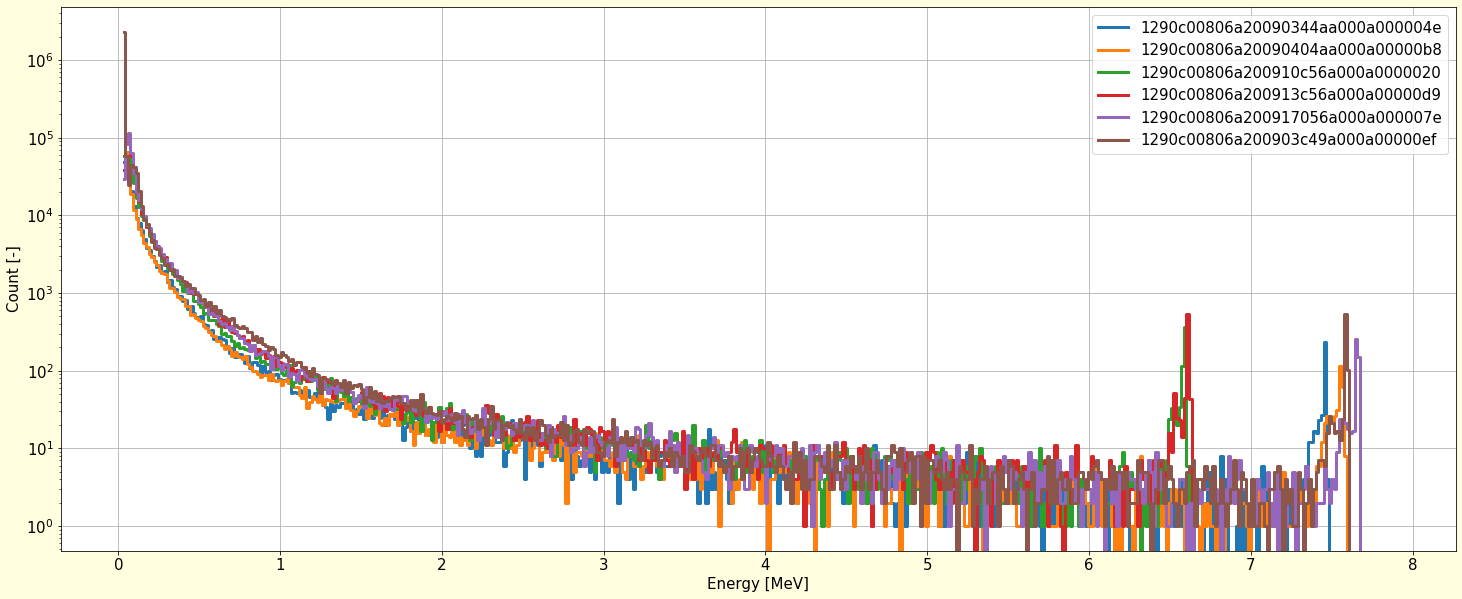

In [26]:
ftt = glob.iglob(fto+"/**/*.TXT") # generator, search immediate subdirectories 
#ftt = glob.iglob(fto+"/*.TXT") # generator, search immediate subdirectories 

plt.figure(figsize=(25,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

for f in ftt:
    l=[]
    l.extend(range(0,505))

    df = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False)
    #df = df.reset_index(drop=True)
    print(f)
    
    df[2] = df[2].apply(pd.to_numeric, errors='coerce')

    rc = df.copy()
    
    
    FIRST_CHANNEL = 9

    ener = rc.iloc[:,FIRST_CHANNEL:500].sum()
    #ener = rc.iloc[300:400].iloc[:,FIRST_CHANNEL:500].sum()

    coef3 = np.array([0.,0.])
    coef3[1] = 0.016
    coef3[0] = 0.034
    #0.034 MeV + ch * 0.016 MeV

    print (coef3[0], coef3[1])

    e3 = pd.DataFrame()
    e3['1'] = ener
    e3['i'] = ener.index
    e3['x'] = (e3['i'].astype(float)-FIRST_CHANNEL) * coef3[1] + coef3[0]

    plt.yscale('log')
    #plt.xscale('log')

    plt.plot(e3['x'], e3['1'] , label=str(rc.loc[rc[0]=='$DOS'][[6]].iloc[0,0]), drawstyle='steps-mid', lw=3)

plt.xlabel('Energy [MeV]')
plt.ylabel('Count [-]')
plt.grid()
plt.legend()


#plt.xticks(np.arange(0, 10, 1))
#plt.xlim(0,2)
#plt.vlines(0.511,1,1e4, color='red')

None

/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run1-3/B8/0.TXT
0.034 0.016
/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run1-3/20/0.TXT
0.034 0.016
/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run1-3/7E/0.TXT
0.034 0.016
/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run1-3/EF/0.TXT
0.034 0.016


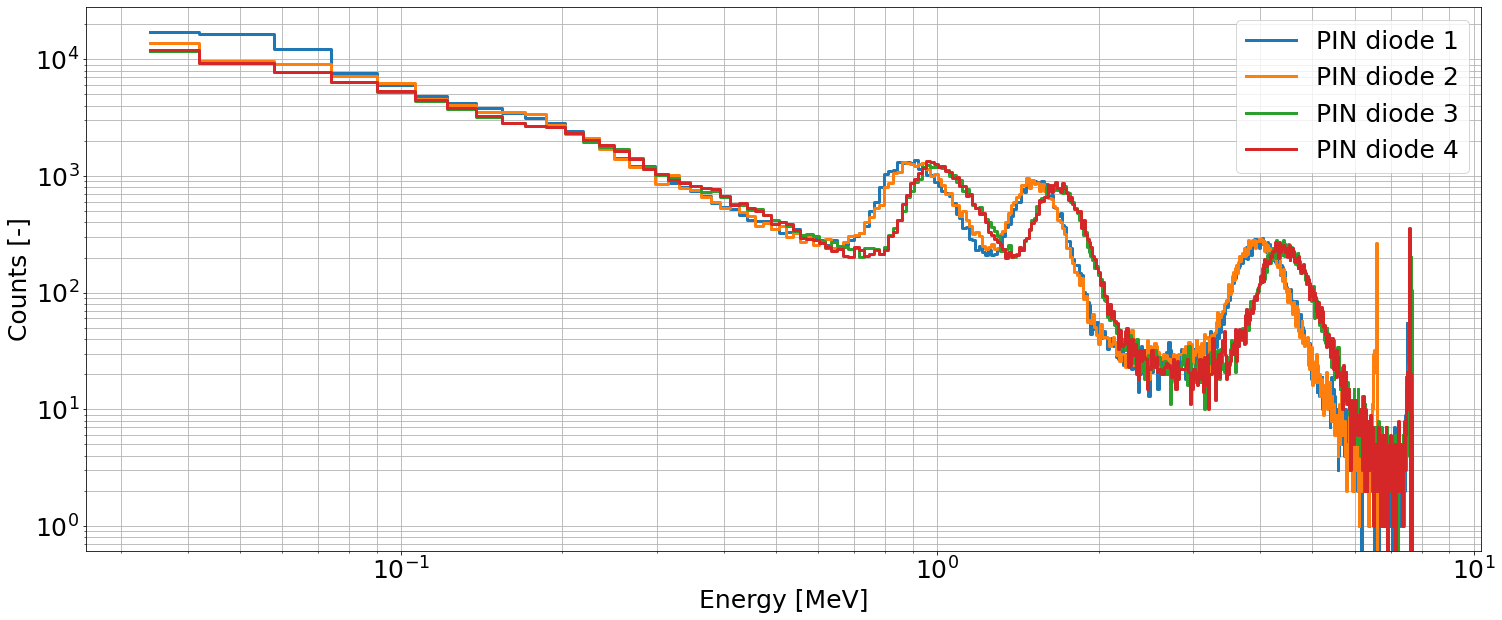

In [89]:
# 4
fto = '/storage/experiments/2023/04_HIMAC/BIO/LABDOS/run1-3'
ftt = glob.iglob(fto+"/**/*.TXT") # generator, search immediate subdirectories 
SWITCH_ON_TIMES = ['2023-04-24 0:0','2023-04-24 00:30','2023-04-25 0:0']

plt.figure(figsize=(25,10))#, facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 25})

for f in ftt:
    l=[]
    l.extend(range(0,505))

    df = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False)
    df = df.reset_index(drop=True)
    print(f)
    
    df[2] = df[2].apply(pd.to_numeric, errors='coerce')

    df['runtime'] = np.nan
    df.loc[df[0]=='$HIST','seconds'] = df.loc[df[0]=='$HIST',2]
    df.loc[df[0]=='$DOS','seconds'] = 0
    df['runtime'] = df['seconds'].diff() * -1
    rc = df

    run = 0
    rc['run'] = np.nan

    try:
        for x in rc.loc[rc[0]=='$DOS'].index:
            rc.loc[x,'run'] = SWITCH_ON_TIMES[run]
            run += 1
    except:
        pass
    rc['run'].fillna(method="ffill", inplace=True)

    rc[2] = pd.to_numeric(rc[2])
    rc['time'] = pd.to_datetime(rc.run) + pd.to_timedelta(rc[2], unit='s')
    rc.set_index(rc['time'], drop=False, inplace=True)
    #rc = rc.loc['2023-04-24 00:15:00':'2023-04-24 02:00:00']
    
    FIRST_CHANNEL = 9

    ener = rc.iloc[:,FIRST_CHANNEL:500].sum()

    sn = str(df.loc[df[0]=='$DOS'][[6]].iloc[0,0])[-2:]
    if sn=='8b': # 0.0164*x + 0.0547
        coef3[1] = 0.0164
        coef3[0] = 0.0547
    if sn=='d9': # 0.0143*x + 0.0513
        coef3[1] = 0.0143
        coef3[0] = 0.0513
    if sn=='7e': # 0.0157*x + 0.0377
        coef3[1] = 0.0157
        coef3[0] = 0.0377
        name='4'
    if sn=='20': # 0.0172*x + 0.0347
        coef3[1] = 0.0172
        coef3[0] = 0.0347
        name='2'
    if sn=='ef': # 0.0157*x + 0.0377
        coef3[1] = 0.0157
        coef3[0] = 0.0377
        name='3'
    if sn=='b8': # 0.0164*x + 0.0547
        coef3[1] = 0.0164
        coef3[0] = 0.0547
        name='1'
    if sn=='4e': # 0.0164*x + 0.0547
        coef3[1] = 0.0164
        coef3[0] = 0.0547

    coef3 = np.array([0.,0.])
    coef3[1] = 0.016
    coef3[0] = 0.034
    #0.034 MeV + ch * 0.016 MeV

    print (coef3[0], coef3[1])

    e3 = pd.DataFrame()
    e3['1'] = ener
    e3['i'] = ener.index
    e3['x'] = (e3['i'].astype(float)-FIRST_CHANNEL) * coef3[1] + coef3[0]

    plt.plot(e3['x'], e3['1'] , label='PIN diode '+name, drawstyle='steps-mid', lw=3)



plt.grid(which='minor')
plt.yscale('log')
plt.xscale('log')
#plt.xlim(3e-1,10)
plt.grid(which='minor')
plt.xlabel('Energy [MeV]')
plt.ylabel('Counts [-]')
plt.legend()
plt.grid(which='both')


In [21]:
plt.figure(figsize=(15,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

rcc = rc.loc['2023-04-22 16:00':'2023-04-23 2:30'] # WAW-NRT

ener = rcc.iloc[:,FIRST_CHANNEL:500].sum()

coef3 = np.array([0.,0.])
coef3[1] = 0.0164
coef3[0] = 0.0547
coef3[0] = 0.1

print (coef3[0], coef3[1])

e3 = pd.DataFrame()
e3['1'] = ener
e3['i'] = ener.index
e3['x'] = (e3['i'].astype(float)-FIRST_CHANNEL) * coef3[1] + coef3[0]

plt.yscale('log')
#plt.xscale('log')

plt.plot(e3['x'], e3['1'] * 1.1 / coef3[1], label='LABDOS', drawstyle='steps-mid')


#liulin_data = liulin_data.loc['2023-04-22 16:00':'2023-04-23 2:30'] # WAW-NRT

ener = liulin_data.iloc[:,0:250].sum()

coef3 = np.array([0.,0.])
coef3[1] = 0.05
coef3[0] = 0.1
#coef3[0] = 0.600

print (coef3[0], coef3[1])

e3 = pd.DataFrame()
e3['1'] = ener
e3['i'] = ener.index
e3['x'] = (e3['i'].astype(float)) * coef3[1] + coef3[0]

plt.yscale('log')
plt.xscale('log')

plt.plot(e3['x'], e3['1'] / coef3[1], label='Liulin', drawstyle='steps-mid')

plt.xlabel('Energy [MeV]')
plt.ylabel(r'Counts scaled [MeV$^{-1}$]')
#plt.grid()
plt.legend()


None

NameError: name 'rc' is not defined

<Figure size 1080x720 with 0 Axes>

# CERF
## Liulin

In [404]:
filename = '/storage/experiments/2023/05_CERF/15052023/LIULIN/2305150921_01.y10' # nic +20 minut
#filename = '/storage/experiments/2023/05_CERF/15052023/LIULIN/2305151327_00.y14' # hrb (pozice u zdi)
filename = '/storage/experiments/2023/05_CERF/15052023/LIULIN/2305151326_00.y15' # hrb (pozice u zdi)
#filename = '/storage/experiments/2023/05_CERF/15052023/LIULIN/2305150929_01.y16' # placka +15 minut


# extract time
path = filename.split('/')
time = path[-1].split('_')
print (time)
date_object = datetime.datetime.strptime(time[0], '%y%m%d%H%M')
print (date_object)

# read data
liulin = pd.read_csv(filename, header = None, sep = ' ', skiprows = 1) # read Liulin data Y
liulin = liulin.drop(256, axis=1) # delete last empty column
infile = open(filename, 'r')
header = infile.readline()
print (header) # print data header
exposition = header.split(' ')[4].split('[')[0] # extract exposition time  
exposition_val = float(exposition)
exposition += 'S'
print (exposition)

# compute time series
#dates = pd.date_range(date_object, freq='5T', periods=len(liulin)).tolist()


['2305151326', '00.y15']
2023-05-15 13:26:00
MDU-15  EXPOSITION = 10[sec]

10S


In [405]:
time_offset = 0
liulin['time'] = date_object + pd.to_timedelta(liulin.index * exposition_val, unit='s') + pd.to_timedelta(time_offset, unit='min')
#rc['time'] = pd.to_datetime(rc.run) + pd.to_timedelta(rc[2], unit='s')
liulin_data = liulin
liulin.set_index('time', drop=False, inplace=True)

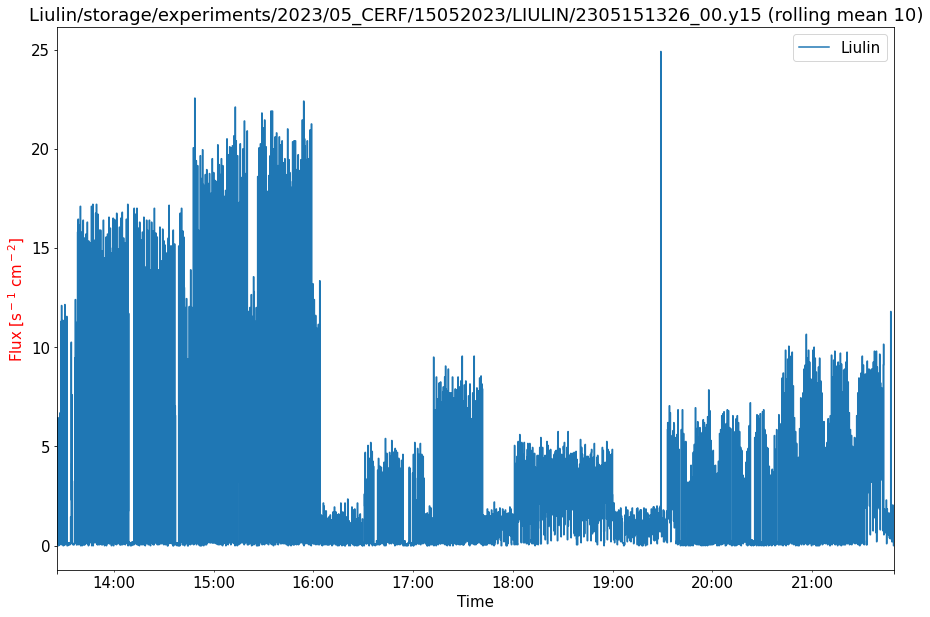

In [406]:
liulin_data['flux'] = liulin_data.iloc[:,0:255].sum(axis=1)/exposition_val/2

WINDOW = 10
#liulin_data['flux'] = liulin_data['flux'].rolling(WINDOW).mean()

#liulin_data
plt.figure(figsize=(15, 10))
matplotlib.rcParams.update({'font.size': 15})
liulin_data['flux'].plot(drawstyle='steps', label='Liulin')
plt.title('Liulin' + filename + ' (rolling mean ' + str(WINDOW) + ')')
plt.ylabel('Flux [s$^-$$^1$ cm$^-$$^2$]', color='red')
plt.xlabel('Time')
#plt.ylim(0, 20)
plt.legend()


0.1 0.05


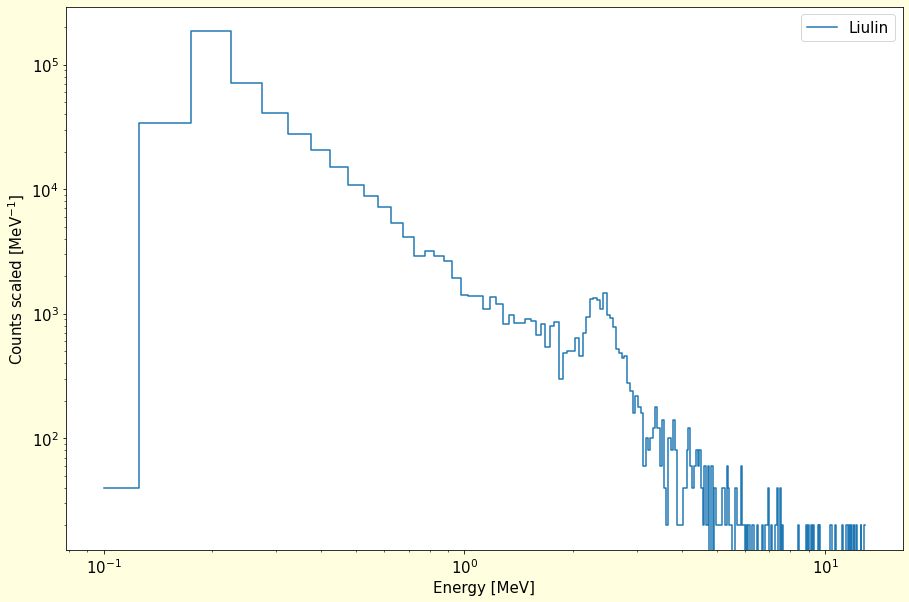

In [407]:
plt.figure(figsize=(15,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

liulin_data2 = liulin_data.loc['2023-05-15 20:34:00':'2023-05-15 23:00']

ener = liulin_data2.iloc[:,0:256].sum()

coef3 = np.array([0.,0.])
coef3[1] = 0.05
coef3[0] = 0.1
#coef3[0] = 0.600

print (coef3[0], coef3[1])

e3 = pd.DataFrame()
e3['1'] = ener
e3['i'] = ener.index
e3['x'] = (e3['i'].astype(float)) * coef3[1] + coef3[0]

plt.yscale('log')
plt.xscale('log')

plt.plot(e3['x'], e3['1'] / coef3[1], label='Liulin', drawstyle='steps-mid')
#plt.plot(e3['x'], e3['1'], label='Liulin', drawstyle='steps-mid')

plt.xlabel('Energy [MeV]')
plt.ylabel(r'Counts scaled [MeV$^{-1}$]')
#plt.grid()
plt.legend()


None

# LABDOS

In [408]:
f = '/storage/experiments/2023/05_CERF/15052023/LABDOS/4E/0.TXT'
#f = '/storage/experiments/2023/05_CERF/15052023/LABDOS/7E/0.TXT'
#f = '/storage/experiments/2023/05_CERF/15052023/LABDOS/B8/0.TXT'
#f = '/storage/experiments/2023/05_CERF/15052023/LABDOS/EF/0.TXT'

SWITCH_ON_TIMES = ['2023-05-12 0:0','2023-05-12 0:0','2023-05-12 0:0','2023-05-12 0:0','2023-05-12 0:0','2023-05-12 0:0','2023-05-12 0:0','2023-05-12 0:0','2023-05-12 0:0','2023-05-13 0:0','2023-05-14 10:20','2023-05-15 7:10']
SWITCH_ON_TIMES = ['2023-05-12 0:0','2023-05-13 0:0','2023-05-14 10:20','2023-05-15 7:10']

l=[]
l.extend(range(0,505))
df = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False)

df[2] = df[2].apply(pd.to_numeric, errors='coerce')

df['runtime'] = np.nan
df.loc[df[0]=='$HIST','seconds'] = df.loc[df[0]=='$HIST',2]
df.loc[df[0]=='$DOS','seconds'] = 0
df['runtime'] = df['seconds'].diff() * -1
rc = df.copy()

run = 0
rc['run'] = np.nan

try:
    for x in rc.loc[rc[0]=='$DOS'].index:
        rc.loc[x,'run'] = SWITCH_ON_TIMES[run]
        run += 1
except:
    pass
rc['run'].fillna(method="ffill", inplace=True)

pd.set_option('display.max_rows', rc.shape[0]+1)
print(rc.loc[rc[0]=='$DOS'][[0,1,2,3,4,5,6, 'run', 'runtime']])
#print(rc.loc[rc[0]=='$AIRDOS'][[0,1, 'runtime']])
pd.set_option('display.max_rows', 10)

rc[2] = pd.to_numeric(rc[2])
rc['time'] = pd.to_datetime(rc.run) + pd.to_timedelta(rc[2], unit='s')
rc.set_index(rc['time'], drop=False, inplace=True)

#!!!!!!!!!!!!!!!
#rc = rc.iloc[1:4745]

         0          1   2    3                                         4  \
0     $DOS  LABDOS01A NaN  517  71cdf196883fa3ab648ae47327ef2137eb69420f   
6     $DOS  LABDOS01A NaN  517  71cdf196883fa3ab648ae47327ef2137eb69420f   
947   $DOS  LABDOS01A NaN  517  71cdf196883fa3ab648ae47327ef2137eb69420f   
4831  $DOS  LABDOS01A NaN  517  71cdf196883fa3ab648ae47327ef2137eb69420f   

            5                                 6               run   runtime  
0     CIBuild  1290c00806a20090344aa000a000004e    2023-05-12 0:0       NaN  
6     CIBuild  1290c00806a20090344aa000a000004e    2023-05-13 0:0     55.39  
947   CIBuild  1290c00806a20090344aa000a000004e  2023-05-14 10:20  10309.30  
4831  CIBuild  1290c00806a20090344aa000a000004e   2023-05-15 7:10  42029.52  


/tmp/ipykernel_14893/1063629337.py:7: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  rc = rc.loc['2023-05-15 00:00':'2023-05-16 23:29'].copy()


Text(0.5, 0, 'UTC')

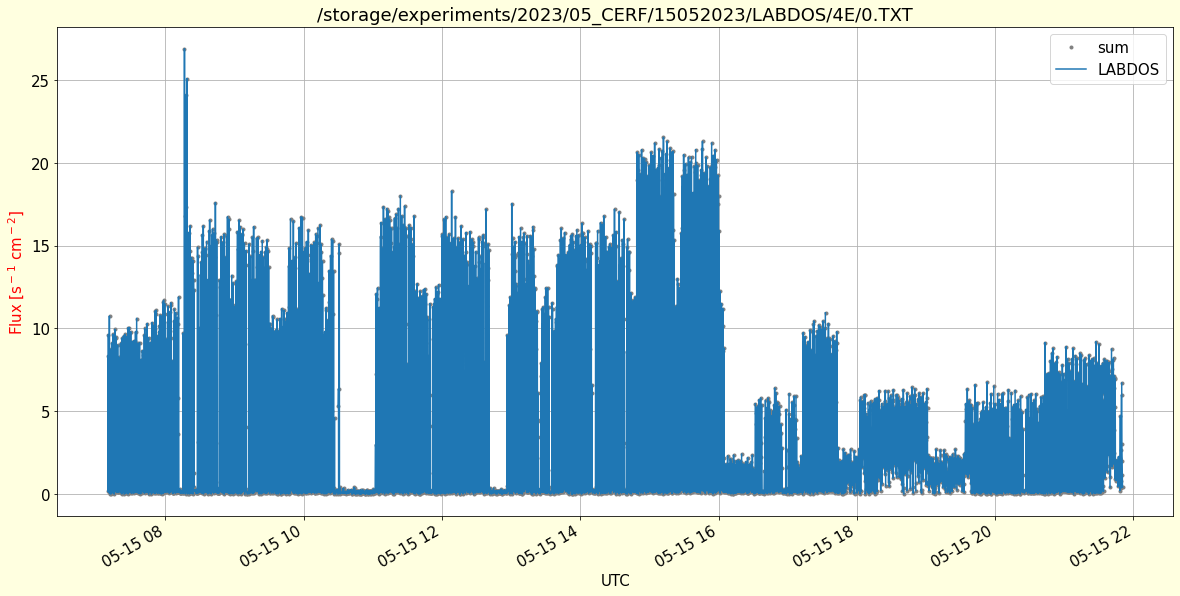

In [409]:

plt.figure(figsize=(20,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

FIRST_CHANNEL = 8

#rc = rc.loc['2023-05-15 00:00':'2023-05-15 23:29']
rc = rc.loc['2023-05-15 00:00':'2023-05-16 23:29'].copy()

rc['sum'] = rc[range(FIRST_CHANNEL,500)].sum(axis=1)/10/2

rc['sum'].plot(marker='.', linestyle='', color='gray')
rcc = rc.resample('10s').mean()
rcc['sum'].plot(label='LABDOS')

#plt.ylim([0,1.6]) 

plt.ylabel('Flux [s$^-$$^1$ cm$^-$$^2$]', color='red')
plt.title(f)
plt.legend()
plt.grid()
plt.xlabel('UTC')


# Liulin + LABDOS 

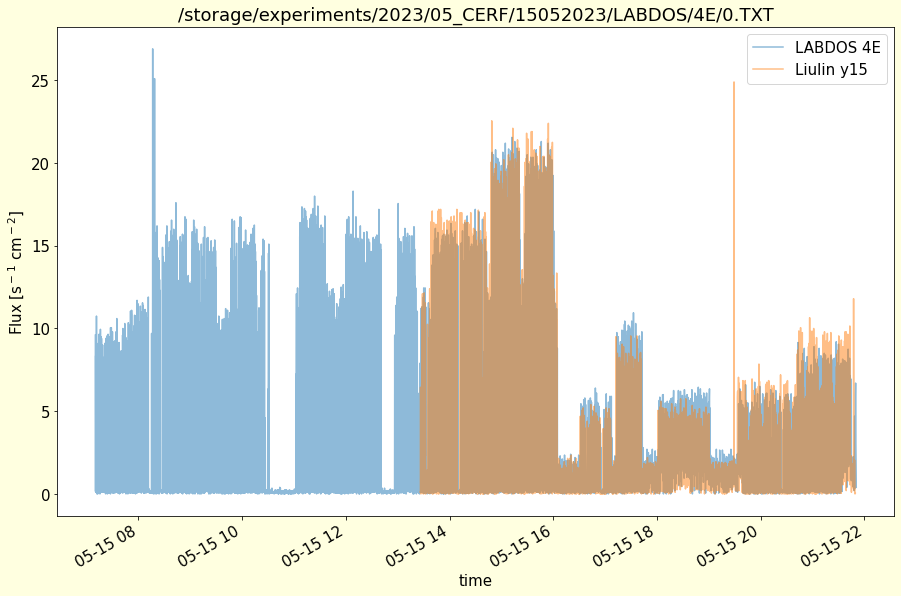

In [410]:
FIRST_CHANNEL = 8

plt.figure(figsize=(15,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})


(rc['sum']).plot(label='LABDOS '+f.split('/')[-2], alpha=0.5)

#liulin_data2 = liulin_data.resample('10s').mean()

(liulin_data['flux']+0).plot(label='Liulin '+filename.split('.')[-1], alpha=0.5)


plt.ylabel('Flux [s$^-$$^1$ cm$^-$$^2$]')
plt.title(f)

#plt.ylim([0,2])
#plt.xlim('2023-05-15 14:25','2023-04-23 2:30')

plt.legend()





0.0 0.015
0.158 0.061


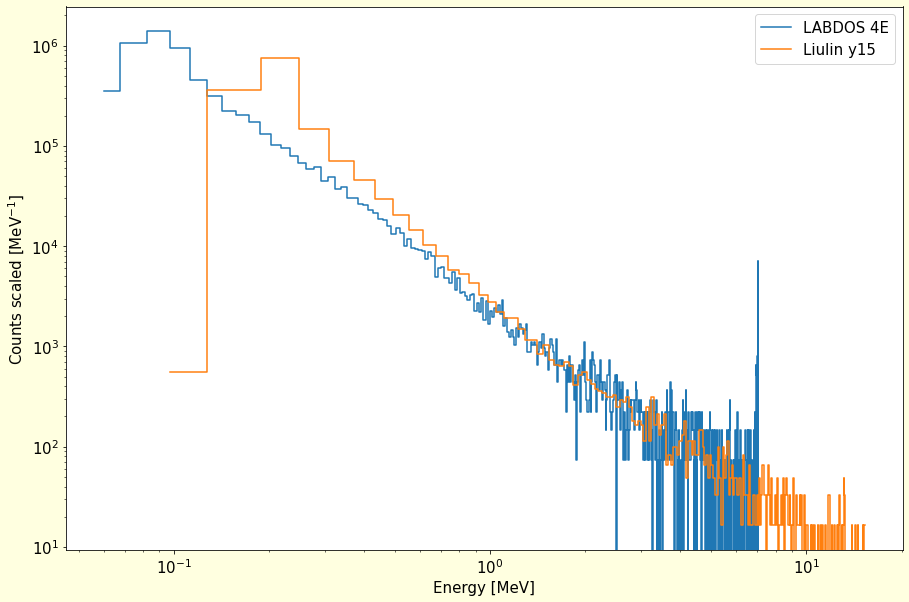

In [413]:
plt.figure(figsize=(15,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

#rcc = rc.loc['2023-05-15 16:00':'2023-05-15 19:00'] # hrby
rcc = rc.loc['2023-05-15 14:00':'2023-05-15 16:00'] 

ener = rcc.iloc[:,FIRST_CHANNEL:500].sum()

coef2 = np.array([0.,0.])
coef2[1] = 0.015
coef2[0] = 0

print (coef2[0], coef2[1])

e2 = pd.DataFrame()
e2['1'] = ener
e2['i'] = ener.index
e2['x'] = (e2['i'].astype(float)-FIRST_CHANNEL+4) * coef2[1] + coef2[0]

plt.yscale('log')
#plt.xscale('log')

plt.plot(e2['x'], e2['1'] * 1.1/ coef2[1], label='LABDOS '+f.split('/')[-2], drawstyle='steps-mid')


#liulin_data2 = liulin_data.loc['2023-05-15 18:00':'2023-05-15 19:00']
#liulin_data2 = liulin_data.loc['2023-05-15 16:00':'2023-05-15 19:00'] #hrby
liulin_data2 = liulin_data.loc['2023-05-15 14:00':'2023-05-15 16:00']

ener = liulin_data2.iloc[:,0:250].sum()

coef3 = np.array([0.,0.])
coef3[1] = 0.047 # MDU10
coef3[0] = 0.131
coef3[1] = 0.061 # MDU15
coef3[0] = 0.158

print (coef3[0], coef3[1])

e3 = pd.DataFrame()
e3['1'] = ener
e3['i'] = ener.index
e3['x'] = (e3['i'].astype(float)-1) * coef3[1] + coef3[0]

plt.yscale('log')
plt.xscale('log')

plt.plot(e3['x'], e3['1'] / coef3[1], label='Liulin '+filename.split('.')[-1], drawstyle='steps-mid')

plt.xlabel('Energy [MeV]')
plt.ylabel(r'Counts scaled [MeV$^{-1}$]')
#plt.grid()
plt.legend()


None

In [332]:
e2

1    i      x
8     4772.0    8  0.135
9    14622.0    9  0.150
10   19011.0   10  0.165
11   13036.0   11  0.180
12    6145.0   12  0.195
..       ...  ...    ...
495      0.0  495  7.440
496      0.0  496  7.455
497      0.0  497  7.470
498      0.0  498  7.485
499      0.0  499  7.500

[492 rows x 3 columns]